<H1> <div style="color:#D0E8F5"; align="center">Proyecto 3</div></H1>
<div align="center">
<img src="https://i.ytimg.com/vi/1lg-5wzypoE/maxresdefault.jpg" alt="drawing" style="width:1000px;height: 400px"/>
    




# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

### Antes de abordar el tema de los peajes, entiendo que el estudio inicial se pidió, para tomarlos solo con los datos de la autopista Illia, pago en Efectivo, 
    ¿por qué?


### Bueno la idea es dejar que los datos nos lo respondan. También se puede deducir que se espera un análisis inicial de este punto para poder tomar decisiones y escalar, podría ser, 
    ¿o no? 

    ¿Cuáles son los días que tiene mayor flujo vehicular?
    ¿Cuáles son los trimestres que más aumenta el flujo vehicular?
    ¿Cuál es la variación máxima, mínima diaria?
    ¿Cuál es el promedio que puede variar el ingreso de un día a otro?
    ¿Las 10 horas más concurridas?
    ¿Cuál es la forma de pago preferida? 
    ¿Cuál es las 10 horas donde pasan más vehículos Pesado?
    ¿Cuál es las 10 horas donde pasan más vehículos Liviano?


<H1> <div style="color:#D0E8F5"; align="center">Librerias</div></H1>
<div align="center">
<img src="https://media.istockphoto.com/photos/database-archive-data-storage-concept-binders-on-cpu-processor-and-picture-id1005290828?b=1&k=6&m=1005290828&s=170667a&w=0&h=vlrbrXxzxoiHVPEVYYEgiK_LLdyrhdOk8yczbK5OSS4=" alt="drawing" style="width:800px;height: 400px"/></div>

In [1]:
import datetime

import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
from matplotlib.axes._axes import _log as matplotlib_axes_logger

import missingno as msno

import numpy as np
from numpy import NaN, isnan

import pandas as pd
from pandas import read_csv
from pandas.plotting import autocorrelation_plot, lag_plot

from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs

from scipy import stats
from scipy.stats import skew

import seaborn as sns


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox as ljbox
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss,  acf, pacf


from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


# Configuración warning
# ==============================================================================
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option("float_format", '{:.1f}'.format)

sns.set()

In [2]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')

In [3]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [5]:
data_2017.info()
data_2017.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.sample(5)

fecha  hora_fin        dia    sentido tipo_vehiculo  \
302142   2018-03-21         6  Miércoles     Centro       Liviano   
1001092  2017-09-24        11    Domingo  Provincia       Liviano   
357963   2017-04-05        14  Miércoles     Centro        Pesado   
1244568  2017-11-27        14      Lunes     Centro        Pesado   
661377   2018-06-26         7     Martes     Centro       Liviano   

         cantidad_pasos  
302142              308  
1001092              34  
357963               50  
1244568               3  
661377               72

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos      fecha
0  Domingo  Provincia        Pesado               1 2017-01-01
1  Domingo  Provincia       Liviano               9 2017-01-01
2  Domingo  Provincia       Liviano             644 2017-01-01
3  Domingo  Provincia        Pesado               6 2017-01-01
4  Domingo  Provincia        Pesado               1 2017-01-01

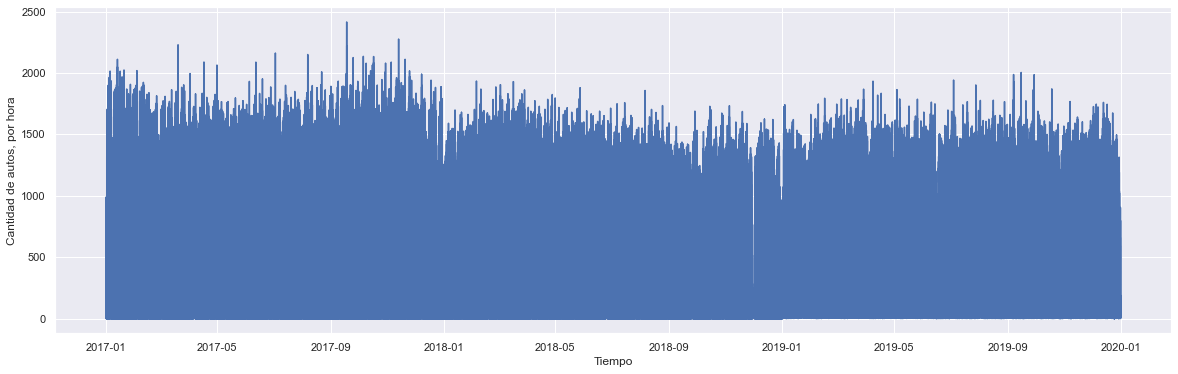

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (20,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por día, y así tal vez lograr una visualización más amigable
#====================================================================================================

diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.sample(3)

(1095, 1)


cantidad_pasos
fecha                     
2019-12-19           45241
2019-12-17           43597
2017-02-22           50722

## ¿La serie de tiempo es estacionarias?
#### Una serie de tiempo se dice que es estrictamente estacionaria si sus propiedades no son afectadas por los cambios a lo largo del tiempo. Es decir, que se deberían cumplir tres criterios básicos para poder considerar a una serie de tiempo como estacionaria:
    1. La media de la serie no debe ser una función de tiempo; sino que debe ser constante.
    2. La varianza de la serie no debe ser una función del tiempo.
    3. La covarianza de la serie no debe ser una función del tiempo. 
## ¿Por qué son importantes las series de tiempo estacionarias?
A razón por la que estas series son importantes es que la mayoría de los modelos de series de tiempo funcionan bajo el supuesto de que la serie es estacionaria. Intuitivamente, podemos suponer que, si una serie tiene un comportamiento particular en el tiempo, hay una probabilidad muy alta de que se comportamiento continúe en el futuro.




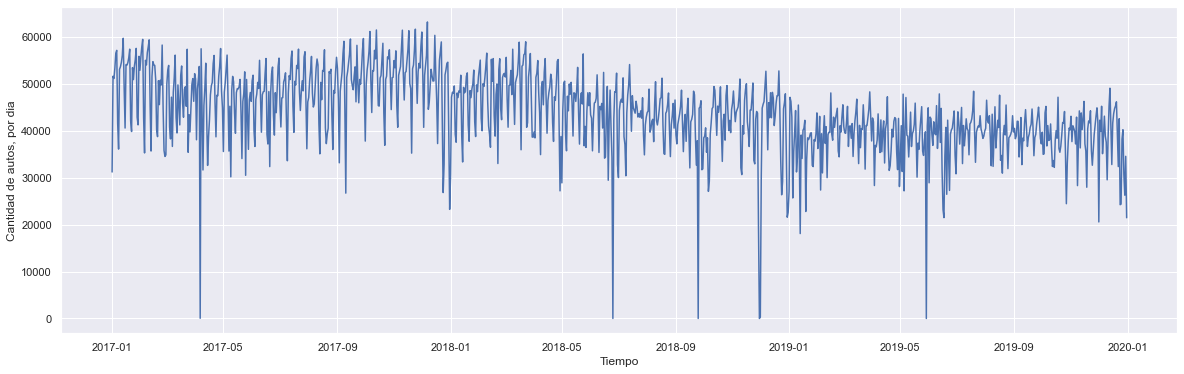

In [16]:
# plot de los datos VS el tiempo
#==================================================================================

plt.figure(figsize = (20,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

#### Si observamos el grafico anterior, podríamos decir que ninguna de las 3 condiciones necesarias para concluir que el set de datos es estacionario, se cumplen. Por tal motivo decimos que la serie de tiempo no es estacionaria. Para corroborar  lo anterior  le haremos una serie de pruebas e hipótesis que nos den una respuesta basada no solo en las observaciones sino en las matemáticas.

<H2> <div style="color:#D0E8F5"; align="center">¿Podríamos hablar de Estacionalidad, Ciclicidad o ver el residuo?</div></H2>
<div align="center">
<img src="https://as1.ftcdn.net/v2/jpg/01/66/52/24/1000_F_166522416_6Wafikq75YcHZEE0CxnssBYyo5qd7MD3.jpg" alt="drawing" style="width:800px;height: 400px"/></div>

### Analizando nuestro set de datos y así como lo sugieren vamos a comenzar analizando los datos de la autopista Illia, con pago en Efectivo. observamos inicialmente:

    •	Datos atípicos que tienden a 0 en varias épocas del año, no se logra identificar por que fenómeno.
    •	En el año 2019 las entradas cayeron y su varianza fue menor.
    •	La madia a simple vista se ve que varía.  
 



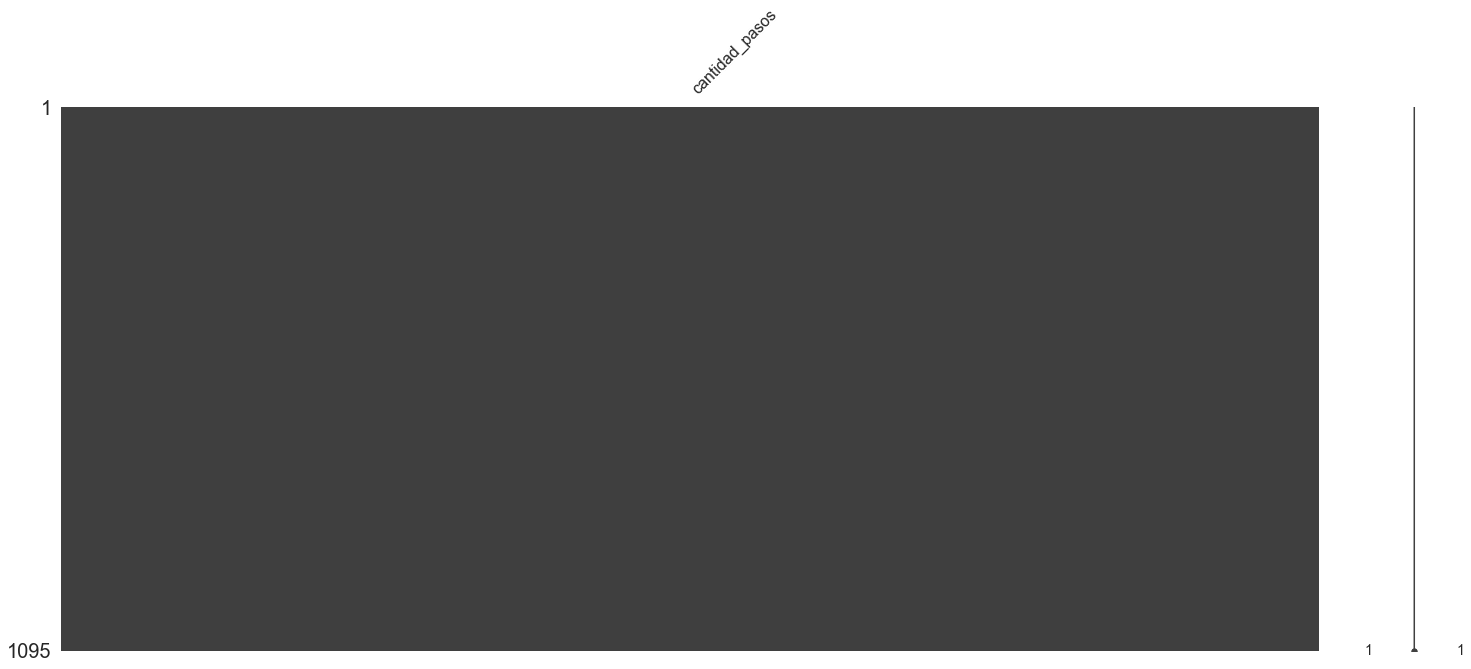

In [17]:
# Estado de datos detectar “missing values”
#==========================================================================================================

msno.matrix(diario)
plt.show()

### Revisando los datos encontramos que nuestro set de datos no tiene datos perdidos, ¿será cierto? 
#### Continuaremos explorando nuestros datos para ver que encontramos y si pregunta planteada anteriormente es verdadera.


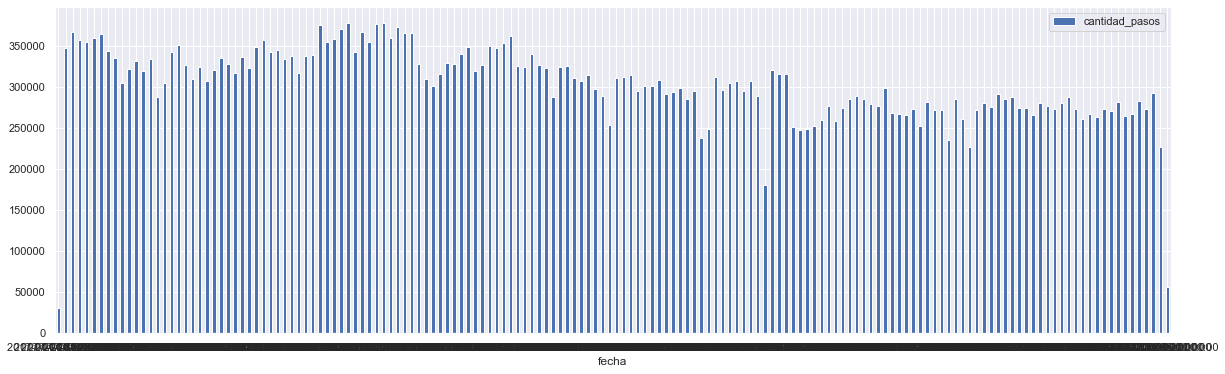

In [18]:
# Resampleo semanal
#====================================================================================================================
week = dataset.resample('W', on = 'fecha').sum()

week.plot.bar(figsize = (20,6), rot=0)
plt.show()

### Observando los datos con resampleo, pasándolos a semanales, podemos decir que puede cambiar un poco nuestra percepción, pero todavía no nos dicen mucho los datos:
    •	la cantidad de entradas en la autopista Illia, pago en Efectivo se puede decir que la semana 
            con el dato máximo fue de 377.832 entradas y el mínimo fue de 31.183 entradas.
    •	La media es 302.946 y la mediana 307.094 lo cual nos dice que los datos son simétricos.


## Valores Medios

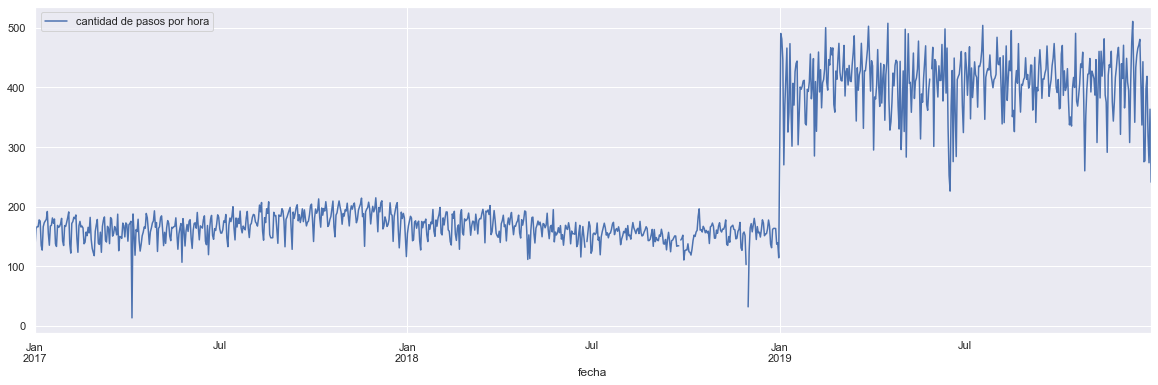

In [19]:
# Valores medios del día medidos cada hora
# ========================================================

hora = dataset.resample('D', on = 'fecha').mean()
hora.plot(figsize = (20,6))

plt.legend(['cantidad de pasos por hora'])
plt.show()


### podemos decir que hay al menos 2 ciclos en los datos y ocurrieron así:
    •	Entre enero 2017 y enero 2019 Los ingresos medios en el peaje oscilaron aprox. entre 220 y 120 cada hora.
    •	Julio es un mes de ingresos medios en el peaje que oscilaron aprox. entre 520 y 250 cada hora.


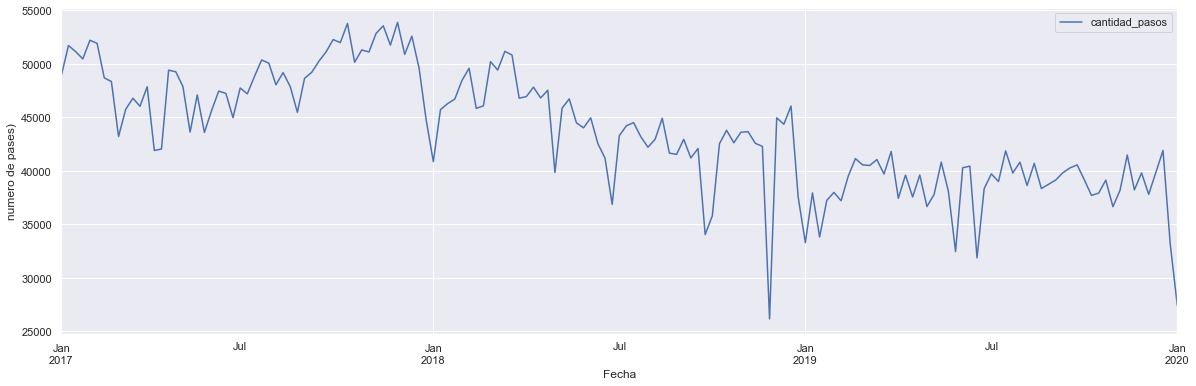

In [20]:
# Valores medios de cada día empezando la semana desde los días lunes
##=============================================

semana = diario.resample('W-SAT').mean()

semana.plot(figsize = (20,6))
plt.xlabel('Fecha')
plt.ylabel('numero de pases)')

plt.legend()
plt.show()

### Variaciones de ciclo estacional semanal.
Podríamos hablar de este tipo de variaciones, porque el comportamiento de la variable en el tiempo está relacionado con la época, sacar un espacio cronológico del comportamiento de las entradas, y decir que cierra o abre un ciclo muy parecido cada semana, pero también se puede ver que puede estar afectado por la estacionalidad cada año.
En el resampleo se observa que mejora si empezamos con el sábado, podemos ver mejor el ciclo estacional de los datos.



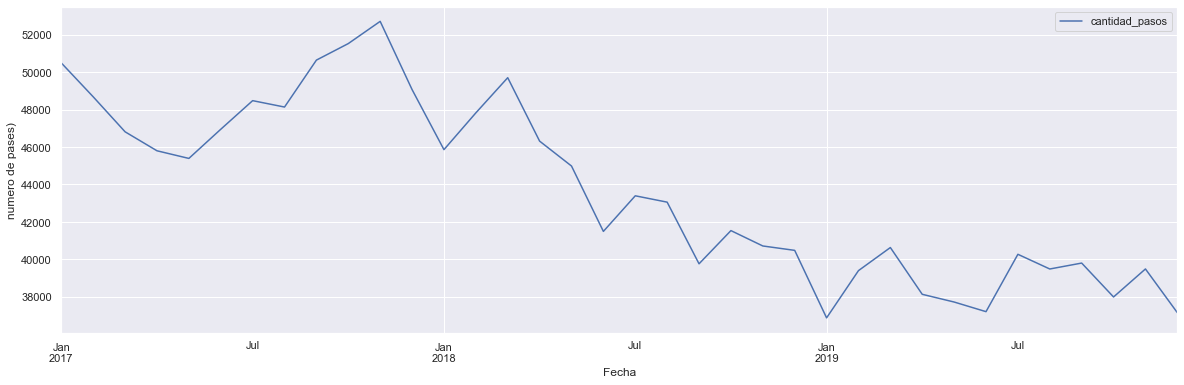

In [21]:
# Valores medios Mensuales 
#==================================================
mensual = diario.resample('M').mean()

mensual.plot(figsize = (20,6))
plt.xlabel('Fecha')
plt.ylabel('numero de pases)')

plt.legend()
plt.show()

### Un resampleo mensual, ¿Cómo se ven los datos?
Observamos una tendencia decreciente en ellos, aunque muestran cierta ciclicidad y tendencia. También podríamos decir que en los meses de octubre hay más demanda del peaje, mientras que los meses de enero y junio, siempre al parecer reciben menos vehículos que pagan en efectivo.


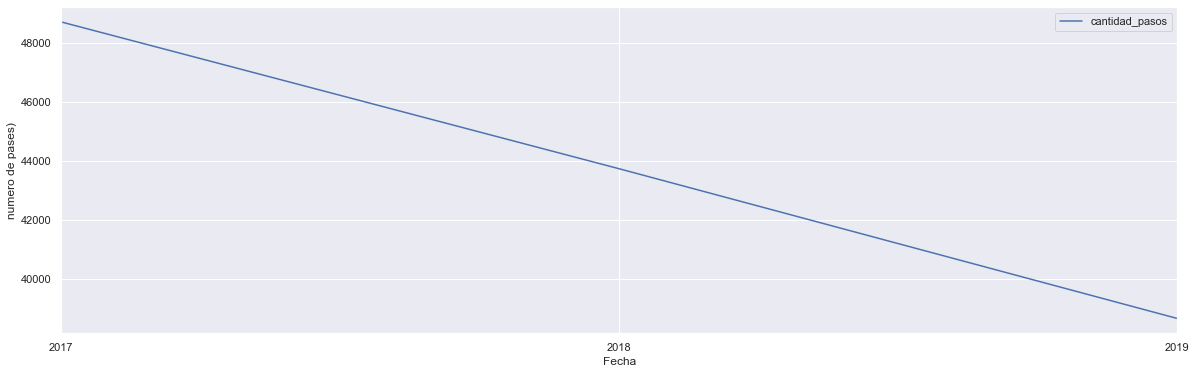

In [22]:
# Valores medios Anuales
# =======================================================
anual = diario.resample('Y').mean()
anual.plot(figsize = (20,6))
plt.xlabel('Fecha')
plt.ylabel('numero de pases)')

plt.legend()
plt.show()

### Submuestreo: disminuyendo la frecuencia de las muestras, de horas a años.

Aunque hay que tener mucho cuidado para calcular las estadísticas de resumen ya que hay que tener en cuenta la nueva forma de este resampleo. podemos decir que basados en la nueva forma con este resampleo a años. Que nuestros datos son decrecientes que en el 2017 tenía más de 48.000 entradas en promedio y en el 2019 paso a menos de 40.000 en promedio.




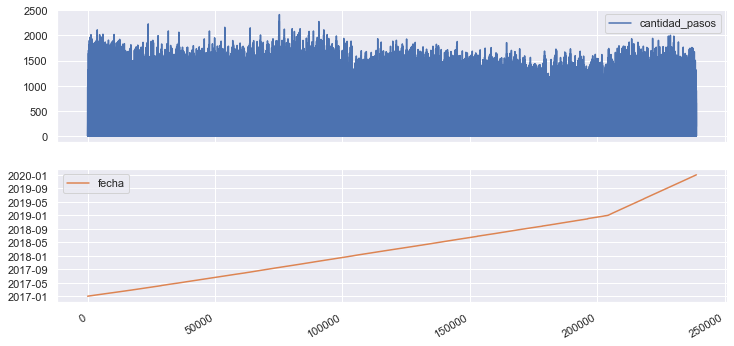

In [23]:
# este es para sacar los subplot necesarios de cada columna 
#==================================================================

gr1 = dataset.plot(figsize=(12,6), subplots=True)




### Análisis de autocorrelación y convergencia

Puedo calcular la autocorrelación con la función autocorr () que devuelve el valor del coeficiente de correlación de Pearson.  El coeficiente de correlación de Pearson es una medida de la correlación lineal entre dos variables. El coeficiente de correlación de Pearson tiene un valor entre -1 y 1, donde:
 
    1.	0 es una correlación no lineal.
    2.	> 0 es una correlación positiva.
    3.	< 0 es una correlación negativa. 
La correlación positiva es cuando dos variables cambian en conjunto, mientras que un coeficiente de correlación negativo significa que las variables cambian o son inversas.



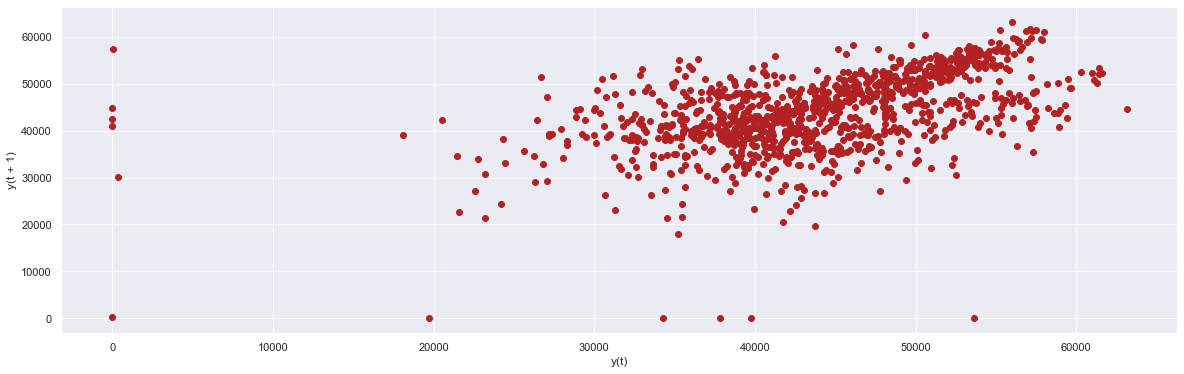

In [24]:

matplotlib_axes_logger.setLevel('ERROR')

plt.figure(figsize=(20, 6))

lag_plot(diario['cantidad_pasos'], c='firebrick')
pyplot.show()

### Gráfico de retardo

Un gráfico de retardo comprueba si un conjunto de datos o una serie de tiempo es aleatorio o no. Los datos aleatorios no deben exhibir ninguna estructura identificable en el gráfico de desfase. La estructura no aleatoria en el gráfico de retardo indica que los datos subyacentes no son aleatorios.

correlación original retardo -1 igual   a: 0.497
correlación original retardo 1 igual   a: 0.263
correlación original retardo 3 igual   a: 0.21
correlación original retardo 4 igual   a: 0.195
correlación original retardo 5 igual   a: 0.259
correlación original retardo 6 igual   a: 0.42
correlación original retardo 7 igual   a: 0.568
correlación original retardo 8 igual   a: 0.399
correlación original retardo 9 igual   a: 0.251
correlación original retardo 10 igual  a: 0.208
correlación original retardo 30 igual  a: 0.243
correlación original retardo 90 igual  a: 0.335
correlación original retardo 180 igual a: 0.15
correlación original retardo 360 igual a: -0.03


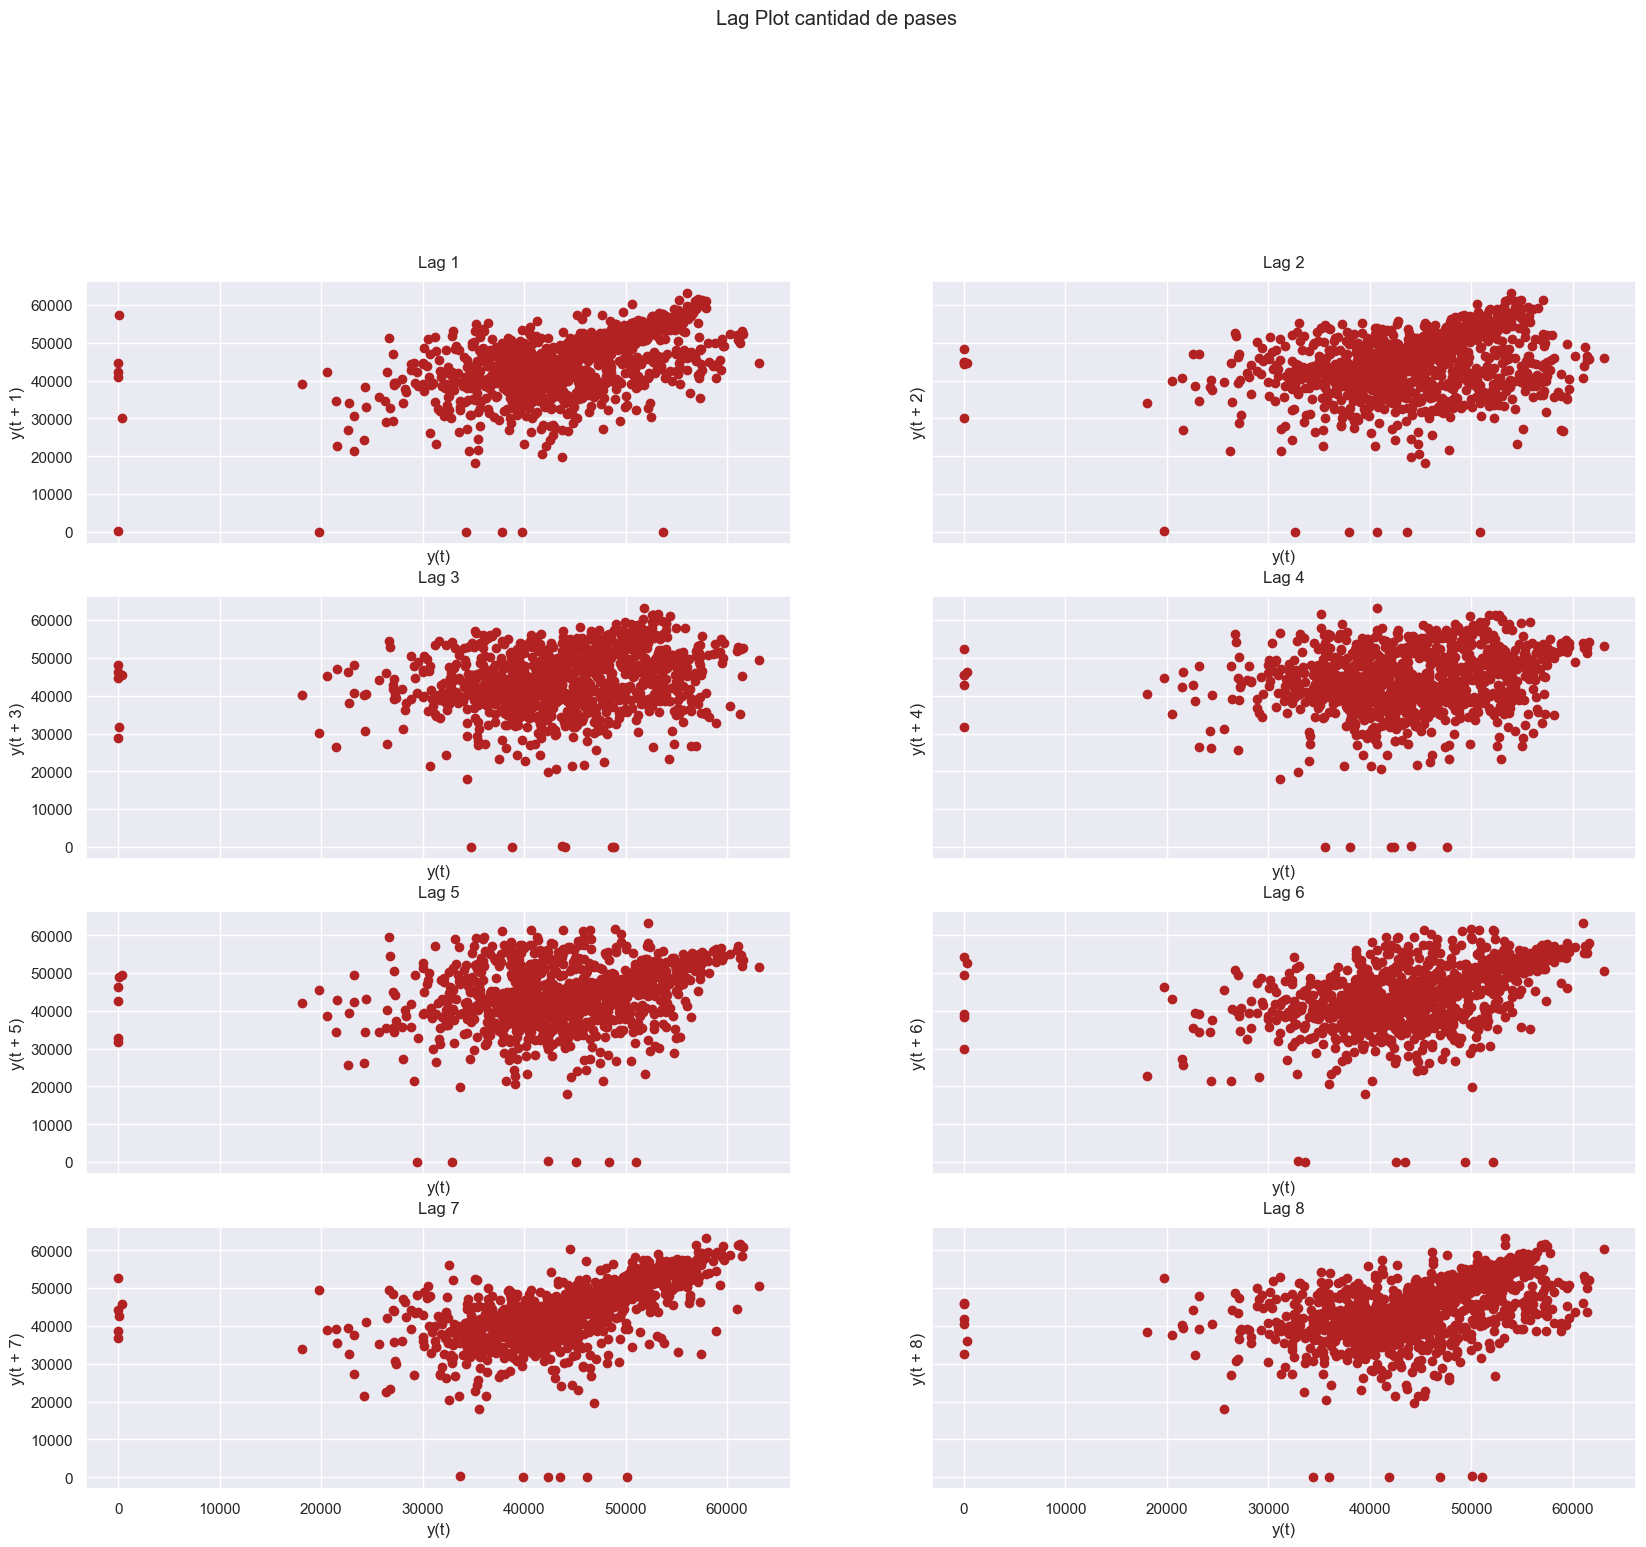

In [25]:
# Calculo de la correlacción
#================================================================

print('correlación original retardo -1 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=1),3) )
print('correlación original retardo 1 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=2),3 ))
print('correlación original retardo 3 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=3),3 ))
print('correlación original retardo 4 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=4),3 ))
print('correlación original retardo 5 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=5),3 ))
print('correlación original retardo 6 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=6),3 ))
print("\033[1;32m"+'correlación original retardo 7 igual   a:'+'\033[0;m', round(diario['cantidad_pasos'].autocorr(lag=7),3 ))
print('correlación original retardo 8 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=8),3 ))
print('correlación original retardo 9 igual   a:', round(diario['cantidad_pasos'].autocorr(lag=9),3 ))
print('correlación original retardo 10 igual  a:', round(diario['cantidad_pasos'].autocorr(lag=10),3 ))
print('correlación original retardo 30 igual  a:', round(diario['cantidad_pasos'].autocorr(lag=30),3))
print('correlación original retardo 90 igual  a:', round(diario['cantidad_pasos'].autocorr(lag=90 ),3))
print('correlación original retardo 180 igual a:', round(diario['cantidad_pasos'].autocorr(lag=180 ),3))
print('correlación original retardo 360 igual a:', round(diario['cantidad_pasos'].autocorr(lag=360 ),3))

plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(4, 2, figsize=(20,16), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(diario['cantidad_pasos'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plot cantidad de pases', y=1.05)    
plt.show()

#### Si observamos las correlaciones, los datos mejoran y se vuelven con correlación positiva 0.57 con un retardo de 7 (días).  
#### Existen varios datos en 0 (outliers), por lo que se recomienda excluirlos antes de realizar el cálculo. Lo cual lo realizaremos más adelante.

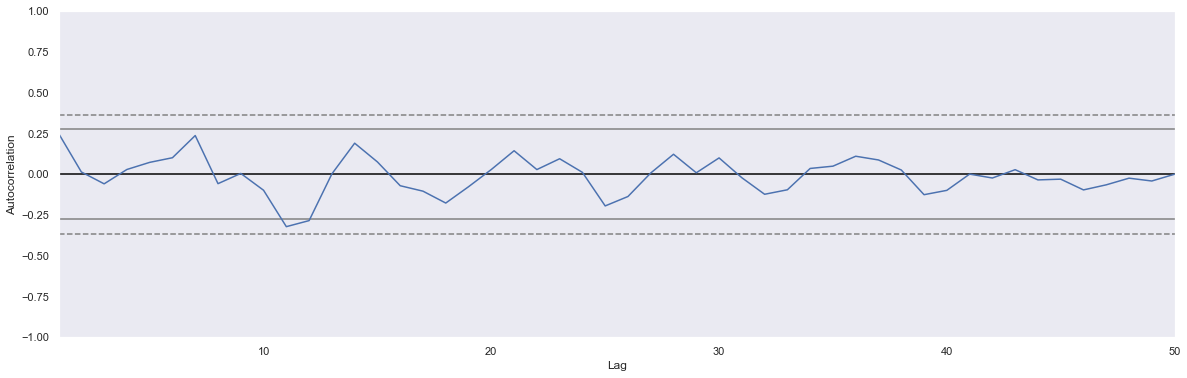

In [26]:
# para Grafico de autocorrelación
# ==================================================================================================================
 
plt.figure(figsize=(20, 6))
autocorrelation_plot(diario['cantidad_pasos'][-50:])
plt.show()

#### se examina la serie de tiempo sin procesar para determinar si existe una tendencia que se repite, es decir, si el valor medio de la serie está cambiando sistemáticamente en función del tiempo. Si es así, se diferencia la serie una vez (se reste cada valor del siguiente valor, o para la estacionalidad de un valor una cierta cantidad de retrasos). Luego, se va a examina la serie resultante para ver si se mantiene una tendencia secular (lo que provocaría una diferenciación adicional) o si puede continuar con el siguiente paso. El siguiente paso es examinar las autocorrelaciones y autocorrelaciones parciales de la serie diferenciada (si corresponde) para ver si tiene ruido blanco o si tiene sentido ajustar un modelo a la serie.

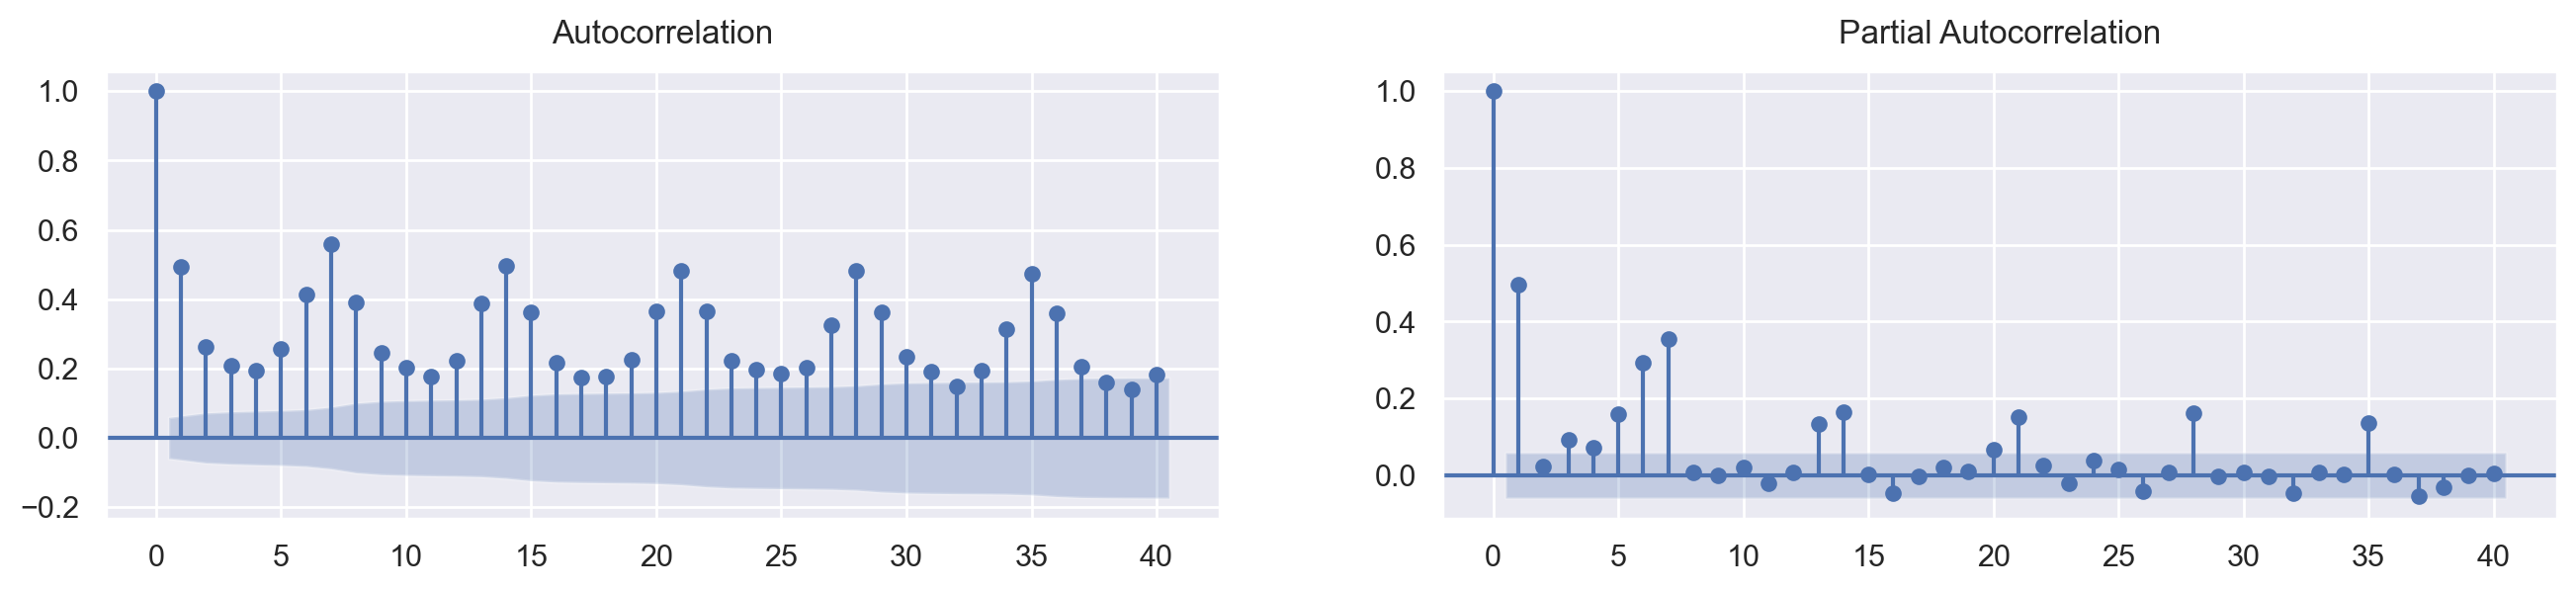

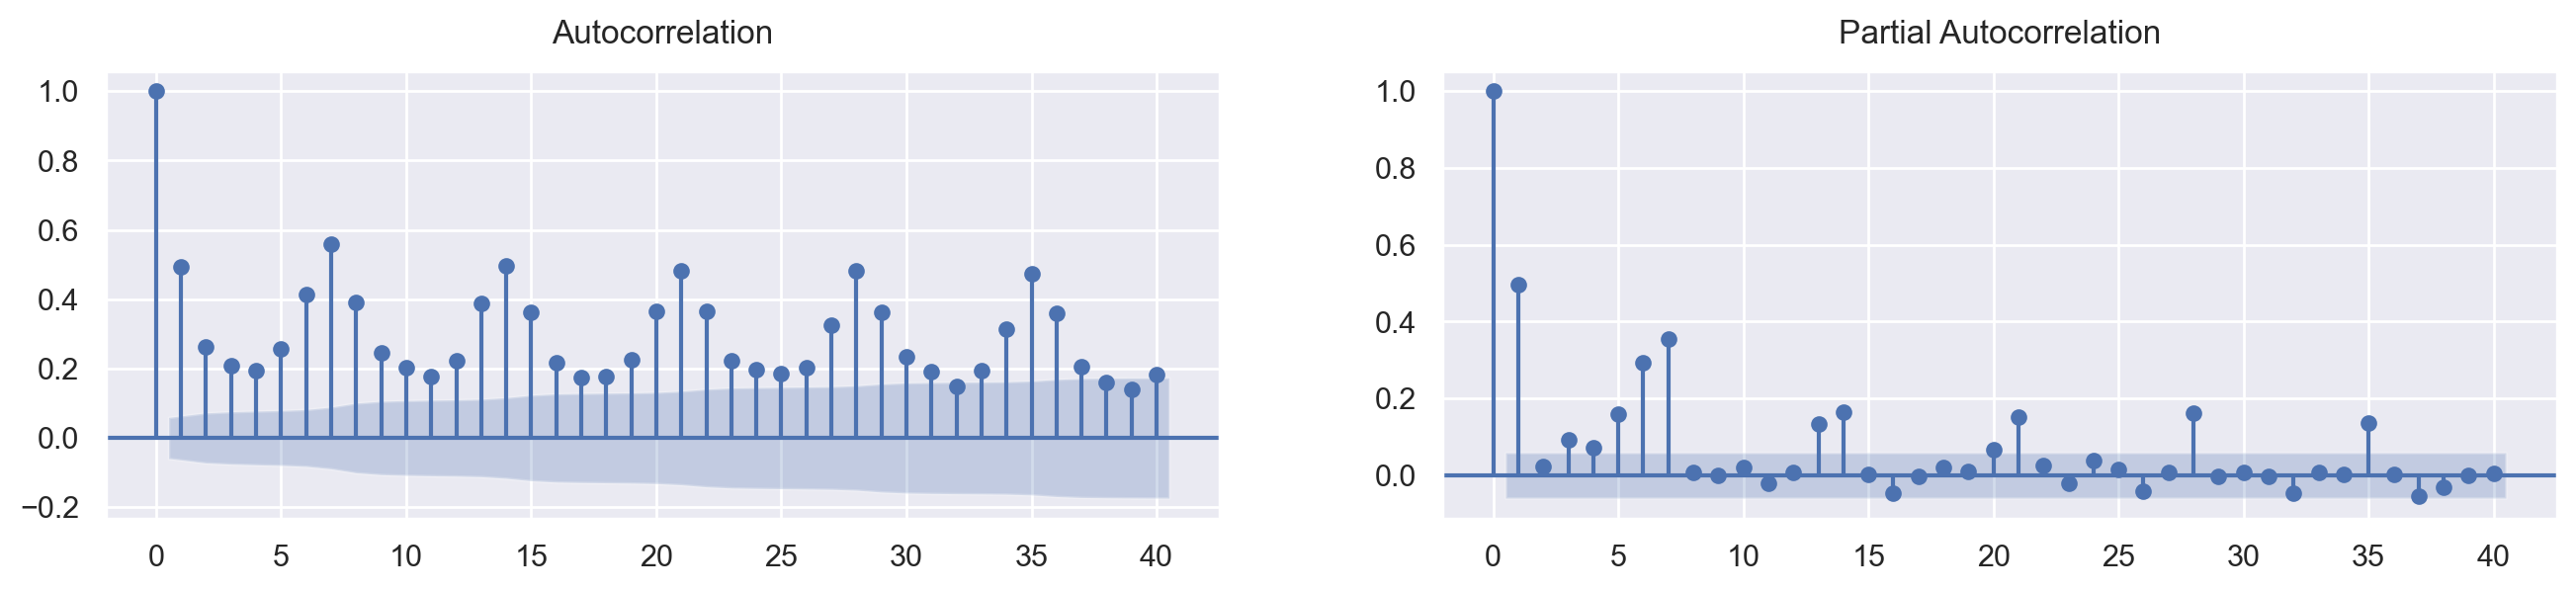

In [27]:
# Gráficos ACF y PACF
#================================================================================================================

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 200)
plot_acf(diario['cantidad_pasos'].tolist(), lags=40, ax=axes[0])
plot_pacf(diario['cantidad_pasos'].tolist(), lags=40, ax=axes[1])

### Identificar el número de términos AR o MA en un modelo ARIMA, con las funciones de autocorrelación ACF y PACF

-   Función Autocorrelación completa (ACF)   : La función de autocorrelación es una medida de la correlación entre las observaciones de una serie de tiempo que están separadas por k unidades de tiempo (y t y 'y' t – k). 
    
-   Función de autocorrelación parcial (PACF): Gráficos de la serie diferenciada, puede identificar provisionalmente el número de términos AR y / o MA que se necesitan. 

Supongamos que este dataset si es estacionario, entonces diríamos.
Correlaciones significativas en el primer o segundo rezago, incluso al séptimo rezago, seguidas de correlaciones que no son significativas.






### ¿	El peaje en mención, ¿se ve afectado por las estaciones del año?

Aunque los rezagos que caen dentro de la región sombreada en azul no se consideran significativos, ya que entran en intervalos de confianza, pero ellos nos dicen cuántos rezagos necesitaría nuestro modelo para que sea correlacionado.

Al trazar el ACF retrasado, podemos decir que el modelo es correlacionado cada 32 rezagos (días) y que la serie de tiempo es dependiente.

    •	¿Se podría confirmar que existe estacionalidad? 
    •	¿es un patrón predecible?

Aunque podemos ver un patrón, con altibajos que consta de un número fijo de marca en el tiempo. Cada punto(rezago) de datos parece estar correlacionado con otro punto de datos en el futuro.

    •	¿podría significar una fuerte estacionalidad? 
    •   Es decir ¿una repetición de determinadas variaciones en alguna variable cada cierto período de tiempo?

Pero la serie de tiempo, que muestra con la correlación una estacionalidad definitivamente no es estacionaria. ya que no es estable a lo largo del tiempo.




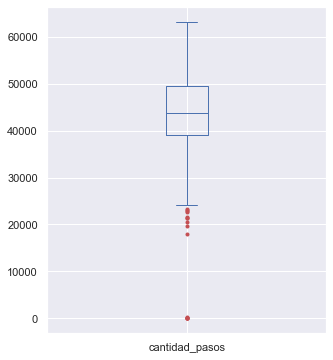

In [28]:
# boxplot para ver Outliers de nuestros datos
#===========================================================================================================
plt.figure(figsize=(5, 6))

diario.boxplot(color='b', sym='r.')
plt.show()

#### Anteriormente ya sabíamos que nuestro set de datos tiene datos Outliers, pero nada mejor que un bloxplot para que nos muestre como están distribuidos los datos, como también cuáles datos son atípicos.


In [29]:
# Revisamos que nuestro set de datos no contenga datos al infinito
#===================================================================================

infinite = np.isfinite(diario, where=True)
infinite.cantidad_pasos.value_counts()

True    1095
Name: cantidad_pasos, dtype: int64

In [30]:
# Dataset sin Datos que tiendan al infinito
#===================================================================================================================

sinoutliers = diario.replace([np.inf, -np.inf], np.nan)

In [31]:
# Dataset sin Datos que tiendan al infinito
#==================================================================================================================

sinoutliers.cantidad_pasos[sinoutliers.cantidad_pasos > 64000] = np.nan
sinoutliers.cantidad_pasos[sinoutliers.cantidad_pasos < 24000] = np.nan


In [32]:
# Contamos nuestros datos nan u outliers
#==================================================================================================================

sinoutliers.isna().sum()

cantidad_pasos    16
dtype: int64

In [33]:
# Completamos nuestros valores NA con metodo "Time" para trabajar con series de tiempo
#==================================================================================================================

sinoutliers['cantidad_pasos'].interpolate(method='time', inplace=True)

In [34]:
#Contamos nuevamente nuestros datos NAN
#==================================================================================================================

sinoutliers.isna().sum()

cantidad_pasos    0
dtype: int64

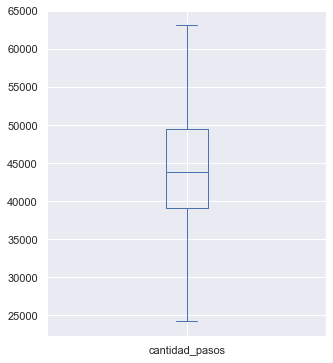

In [35]:
# boxplot para ver como queda nuestro set de datos sin Outliers o datos infinitos ∞ de nuestros datos
#===========================================================================================================

plt.figure(figsize=(5, 6))

sinoutliers.boxplot(color='b', sym='r.')
plt.show()

#### Limpiamos nuestro set de datos, de datos perdidos y de datos que tienden al infinito. Los cuales también fueron tratados y así poder empezar a trabajar con modelos y algoritmos. 
#### Nuevamente visualizamos nuestros datos con un box-plot, en el cual vemos que los datos están sin outliers y bien distribuidos entre 24.000 y 64.000.



In [36]:
# Este para crear una nueva variable 
#============================================================================================================

semanal = sinoutliers.replace([np.inf, -np.inf], np.nan)

### Cálculo de la Media móvil 
#### suavizaremos algunas fluctuaciones a corto plazo para si poder estudiar las tendencias en los datos.

#### El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana al cual se conoce como rolling window. En general, la utilizaremos junto con la media, y aunque también se podría obtener el máximo, mínimo o cualquier otro estadístico. Por ahora solo visualizaremos la media móvil.


In [37]:
# Adicionamos el Calculo de la media de nuestros datos, en una nueva columna del set de datos
# =================================================================================================================


semanal['Tmean'] = semanal['cantidad_pasos'].mean()
semanal.head(3)

cantidad_pasos   Tmean
fecha                             
2017-01-01         31183.0 44066.0
2017-01-02         51568.0 44066.0
2017-01-03         51093.0 44066.0

### Rolling Windows

##### Tomamos un tamaño de ventana de k(ventana) y si queremos realizamos alguna operación matemática deseada en él. Una ventana de tamaño k significa k valores consecutivos a la vez. En un caso muy simple, todos los valores de 'k' están igualmente ponderados.


In [38]:
# Una ventana movil para nuestro modelo de series de tiempo, para evaluar las estabilidad de los datos en el tiempo
#======================================================================================================

ventana = 7
semanal['semanal_promedio_tendencia'] = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal.sample(3)

cantidad_pasos   Tmean  semanal_promedio_tendencia
fecha                                                         
2018-07-28         39138.0 44066.0                     41700.0
2019-12-12         45099.0 44066.0                     38994.3
2019-04-28         31692.0 44066.0                     36748.9

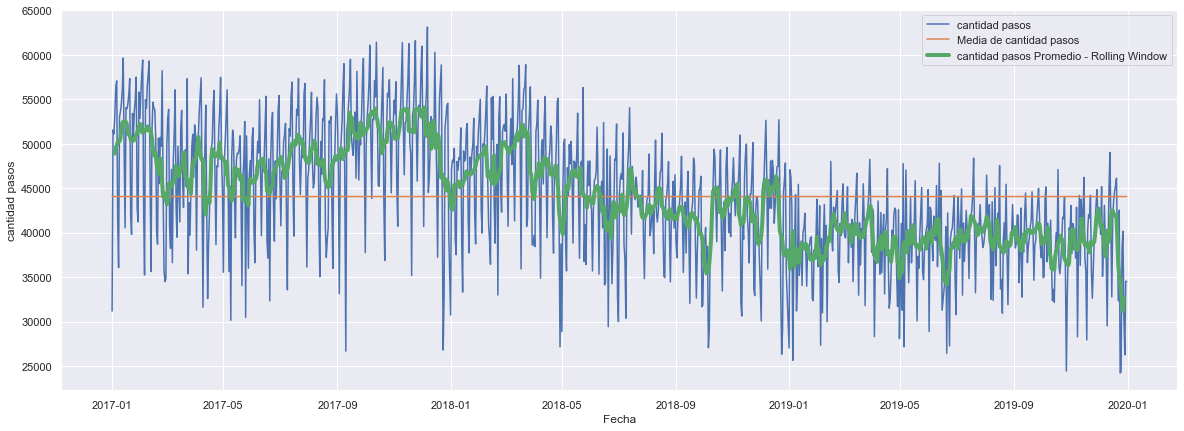

In [39]:
# Un plot() para ver la media movil con la ventana propuesta
#====================================================================================================================

plt.figure(figsize = (20,7))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'cantidad pasos ')
plt.plot(semanal.Tmean, label = 'Media de cantidad pasos ')
plt.plot(semanal.semanal_promedio_tendencia, lw = 4, label = 'cantidad pasos Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('cantidad pasos')
plt.legend()
plt.show()

#### ¿podríamos decir que la media móvil es más útil que la media aritmética? 
##### Digamos que sí, que nos podría servir mucho más la media móvil para la serie tiempo. Ya que como vemos, se establece según una ventana, la cual previamente nos la proporciono la correlación y esta se mueve en proporción por todos los datos.



In [40]:
# realizamos una transformación de nuestro índex y creamos una nueva columna fecha números
#=================================================================================================================

semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
semanal.sample(5)

cantidad_pasos   Tmean  semanal_promedio_tendencia  fecha_numeros
fecha                                                                        
2018-02-07         51323.0 44066.0                     49579.9         736732
2019-10-03         35054.0 44066.0                     38926.1         737335
2018-02-05         49983.0 44066.0                     48855.7         736730
2018-04-08         34885.0 44066.0                     46696.0         736792
2017-10-13         61421.0 44066.0                     52894.3         736615

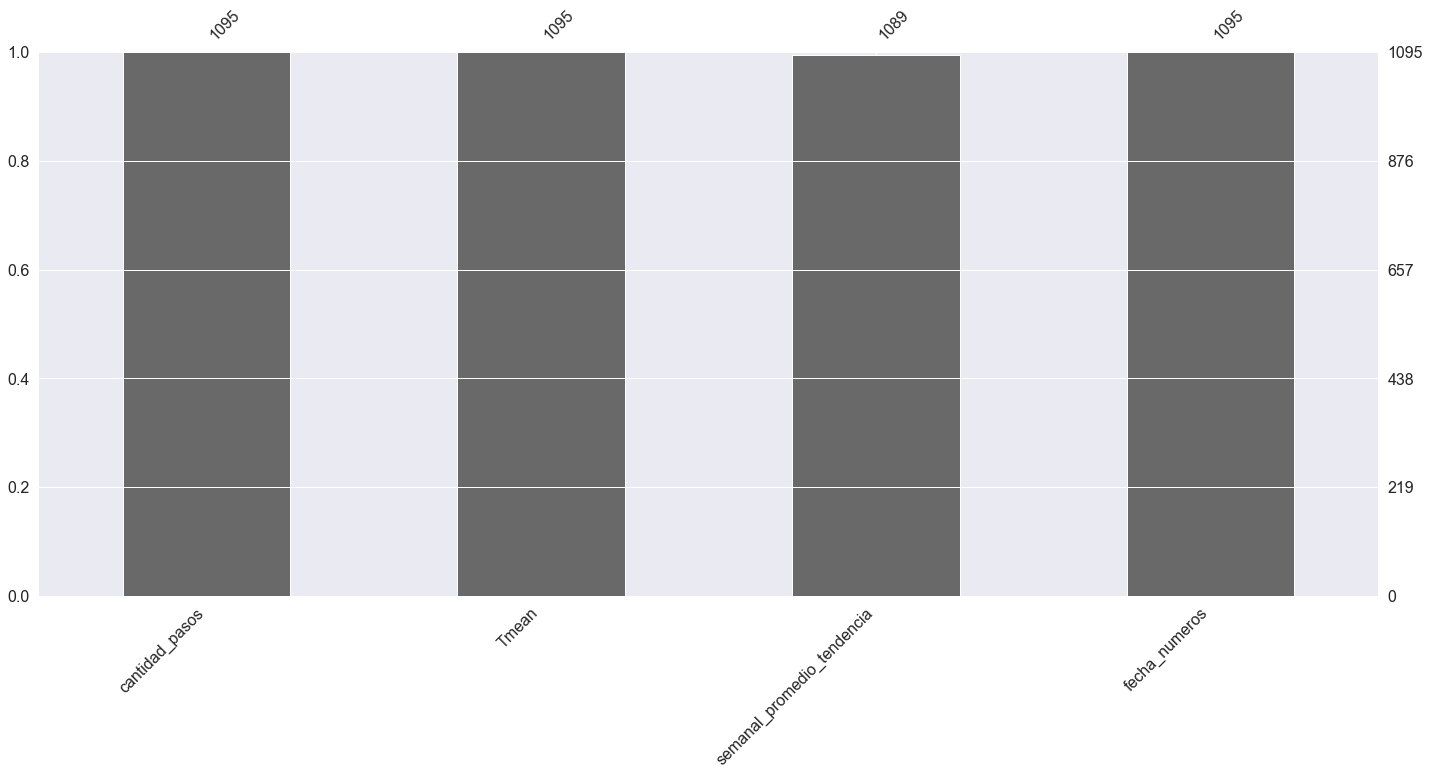

In [41]:
# Estado de datos detectar “missing values”
#==========================================================================================================

msno.bar(semanal)
plt.show()

In [42]:
# Para transformar datos NaN con extrategia
# ===============================================================================================================

imputer = SimpleImputer(missing_values=NaN, strategy='mean')

Semanal_tranform = imputer.fit_transform(semanal)


print('Missing: %d' % isnan(Semanal_tranform).sum())

Missing: 0


In [43]:
# creando un nuevo dataFrame
# ================================================================================================== 

index_values = semanal.index


column_values = ['cantidad_pasos', 'Tmean', 'semanal_promedio_tendencia',               
                 'fecha_numeros']


semanal1 = pd.DataFrame(  Semanal_tranform,
                            index = index_values, 
                            columns = column_values)

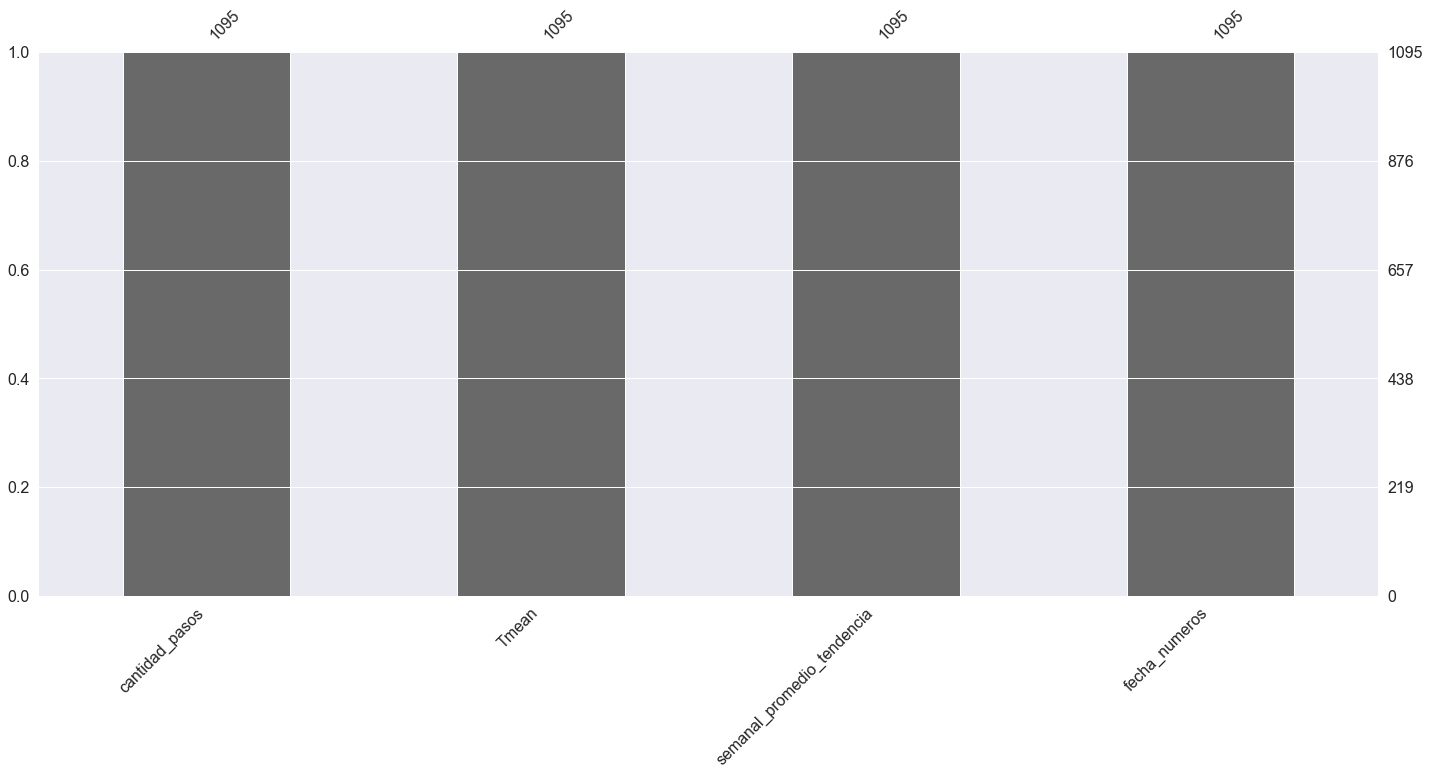

In [44]:
# Estado de datos detectar “missing values”
#==========================================================================================================

msno.bar(semanal1)
plt.show()


<H2> <div style="color:#D0E8F5"; align="center">Modelo Benchmark</div></H2> 
<div align="center">
<img src="https://media.istockphoto.com/photos/mid-adult-businessman-writing-plans-during-presentation-with-his-in-picture-id1188191981?k=6&m=1188191981&s=612x612&w=0&h=RjQGfEciNjPoZTbxivB_ksfTa1XdLyihW14BqE8Xd0M=" alt="drawing" style="width:800px;height: 400px"/></div>

#### Utilizaremos un modelo ARIMA es un acrónimo de AutoRegressive Integrated Moving Average. Es una clase de modelo que captura un conjunto de diferentes estructuras temporales estándar en datos de series de tiempo.

### Media móvil integrado autorregresiva Pronosticando y modelando con ARIMA (Media móvil integrado autorregresiva).

#### Como podemos observar en los gráficos que realizamos anteriormente, el comportamiento de la serie de tiempo con la que estamos trabajando parece ser totalmente aleatorio y las medidas móviles que calculamos tampoco parecen ser de mucha utilidad para acercar la serie a un comportamiento estacionario. De todas formas, podemos intentar aplicar un modelo ARIMA sobre la serie y ver que tan bien nos va con el pronóstico del modelo. El modelo ARIMA es similar a una regresión estadística, pero aplicando los conceptos de las series de tiempo; por tanto, los pronósticos del modelo vienen explicadas por los datos del pasado y no por variables independientes.

#### ARIMA es un acrónimo de AutoRegressive Integrated Moving Average. Es una generalización de la media móvil autorregresiva más simple y agrega la noción de integración.
    * AR : autorregresión . Un modelo que usa la relación dependiente entre una observación y cierto número de observaciones retrasadas.
    
    * I : Integrado . El uso de la diferenciación de observaciones en bruto (por ejemplo, restando una observación de una observación en el paso de tiempo anterior) para hacer estacionaria la serie de tiempo.
            
    * MA : Media móvil . Un modelo que utiliza la dependencia entre una observación y un error residual de un modelo de promedio móvil aplicado a observaciones retrasadas


In [45]:
# este es para un modelo Arima
#===================================================================================================================

Ari_model = ARIMA(semanal1['semanal_promedio_tendencia'],order=(0,0,0))
ari_fit = Ari_model.fit()
ari_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     semanal_promedio_tendencia   No. Observations:                 1095
Model:                                  ARIMA   Log Likelihood              -14123.377
Date:                        Fri, 23 Jul 2021   AIC                          28250.754
Time:                                14:28:02   BIC                          28260.751
Sample:                            01-01-2017   HQIC                         28254.537
                                 - 12-31-2019                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.409e+04   1.59e+05      0.277      0.782   -2.68e+05    3.56e+05
sigma2      2.538e+10   1.54e+09     16.530      0.000    2.24e+10    2.84e+10
===================================================================================
Ljung-Box (L1) (Q):                1059.11   Jarque-Bera (JB):                47.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.16
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# Columna con los datos que predice el modelo
#==============================================================================================================

semanal1['forecast']=ari_fit.predict(start=0,end=1095,dynamic=True)


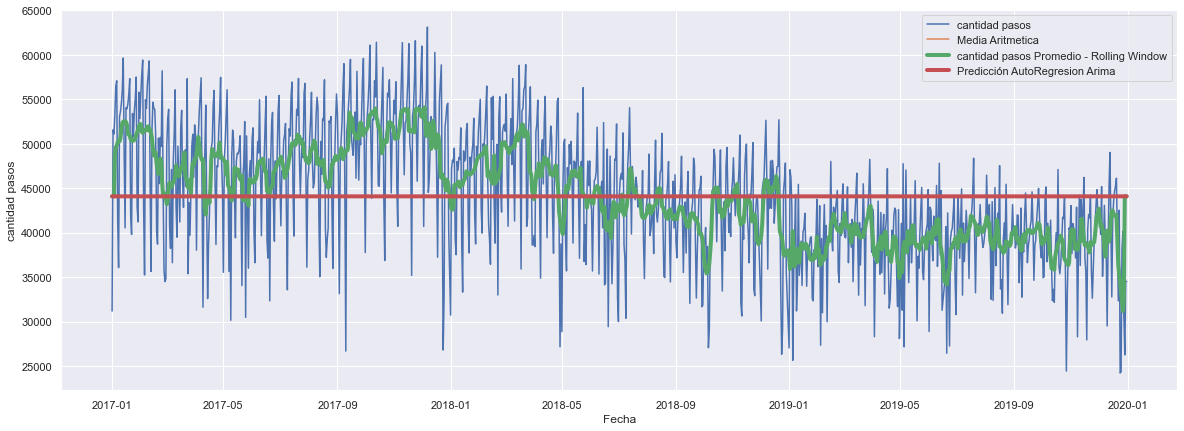

In [47]:
# plot de nuestro modelo, graficaremos como se comporta nuestros datos Vs nuestra media Aritmetica VS Media Movil VS # el model ARIMA AutoRegressive Integrated Moving Average
#===================================================================================================================


plt.figure(figsize = (20,7))
plt.plot(semanal1.index, semanal1.cantidad_pasos, label = 'cantidad pasos ')
plt.plot(semanal1.index, semanal1.Tmean, label = 'Media Aritmetica ')
plt.plot(semanal1.semanal_promedio_tendencia, lw = 4, label = 'cantidad pasos Promedio - Rolling Window')
plt.plot(semanal.index, semanal1.forecast, lw = 4, label = 'Predicción AutoRegresion Arima')
plt.xlabel('Fecha')
plt.ylabel('cantidad pasos')
plt.legend()
plt.show()

## Plot objetivo
        * ¡Perfecto! Nuestra Autoregresión Arima pasa por todos nuestros datos.
        * La muestra de la media móvil nos informa que puede describir muy bien nuestros datos.
        * La media aritmética simplemente muestra lo que ya sabíamos, nos dice cuál es la mitad de los datos y se parece nuestro modelo predictor.



In [48]:
# este es para rms Coeficiente de Pearson y diferencia entre máximo y mínimo
#====================================================================================================================

def forecast_accuracy(forecast, actual):
    rmse = np.sqrt(mean_squared_error(forecast, actual)) # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    AIC =  round(ari_fit.aic)
    BIC =  round(ari_fit.bic)
    return({ 'El error cuadrático medio o RMSE es una medida absoluta de ajuste :':round(rmse) ,
            'coeficientes de correlación producto-momento de Pearson:':round(corr,5) ,
            'diferencia entre el valor máximo y mínimo :':round(minmax,2),
            'Criterio Akaike (AIC) :':AIC,
            'Criterio Bayesiano-Schwarz (BIC) :':BIC
            })
            

In [49]:
semanal1.forecast.shape

(1095,)

In [50]:
X = semanal1.cantidad_pasos
y = semanal1.forecast
forecast_accuracy(X,y)

{'El error cuadrático medio o RMSE es una medida absoluta de ajuste :': 7279,
 'coeficientes de correlación producto-momento de Pearson:': nan,
 'diferencia entre el valor máximo y mínimo :': 0.12,
 'Criterio Akaike (AIC) :': 28251,
 'Criterio Bayesiano-Schwarz (BIC) :': 28261}

### Noticia de nuestro modelo Benchmark, 
#### Que, aunque dice que va a tener un error medio aceptable de 7279 pases al día. Pero recordemos que esto significaría que es valor medio, ya que esta métrica calcula la raíz de la diferencia cuadradas entre total las predicciones y el objetivo; Y, luego promedia esos valores. Fuera de eso su resultado nunca es negativo. Lo que nos puede sesgar la métrica, y podemos subestimar lo malo de este modelo para este caso.
#### para esto soportamos otras métricas más estrictas como el Criterio Bayesiano-Schwarz (BIC), el Criterio Akaike, AIC es mejor en situaciones en las que un resultado falso negativo se consideraría más engañoso que un falso positivo, y BIC es mejor en situaciones en las que un falso positivo es tan engañoso como, o más engañoso, que un falso negativo. (AIC).

#### para este caso podemos interpretar que tanto AIC y BIC son equidistantes, entonces nuestro modelo Benchmark tiene un error AICy BIC de +/- 28.261   



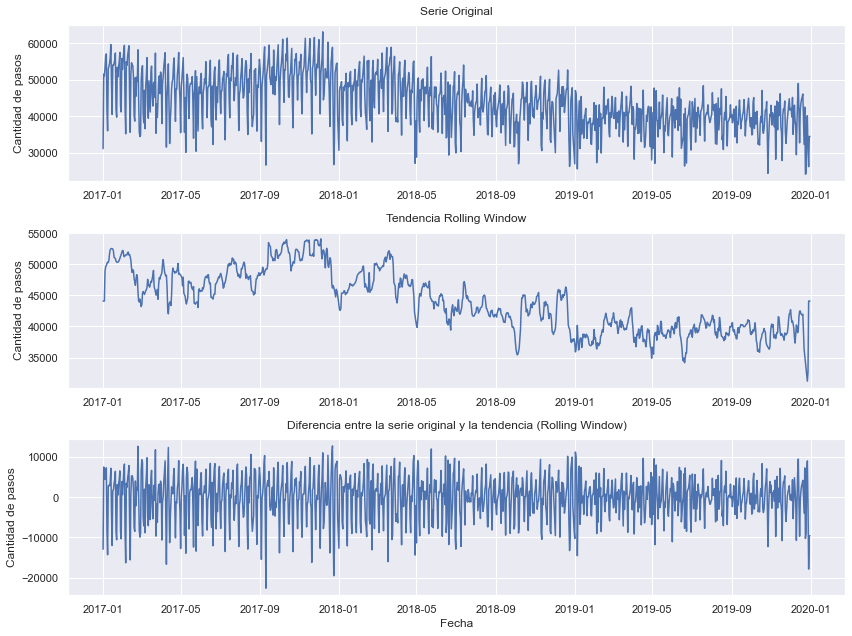

In [51]:
# Un plot para la cantidad de pasos, el promedio de la tendencia y la tendencia de la ventana
#===============================================================================================

plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal1.index, semanal1.cantidad_pasos)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal1.semanal_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia (Rolling Window)')
plt.plot(semanal1.index, semanal1.cantidad_pasos - semanal1.semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.show()


#### En este plot, nos centraremos en la diferencia entre la serie original y la tendencia, así:

    •	Esta serie de la diferencia ya seria una serie estacionaria, pero aunque su media podría ser cercana a 0 sus valores apenas alcanzan una vez los +/- 21.000, lo cual debemos tenerlo presente antes de tomar estos datos para entrenar un nuevo modelo.

    •	La cantidad de pasos en efectivos tienden a la baja, hay posibilidades que estén migrando.
    

### Descomposición automática de series de tiempo.

#### El objetivo del resultado es acceder a cuatro datos de la descomposición.
        * Datos originales (Observerd).
        * Tendencia (Trend).
        * Estacional (Seasonal)
        * Residual (Residual)


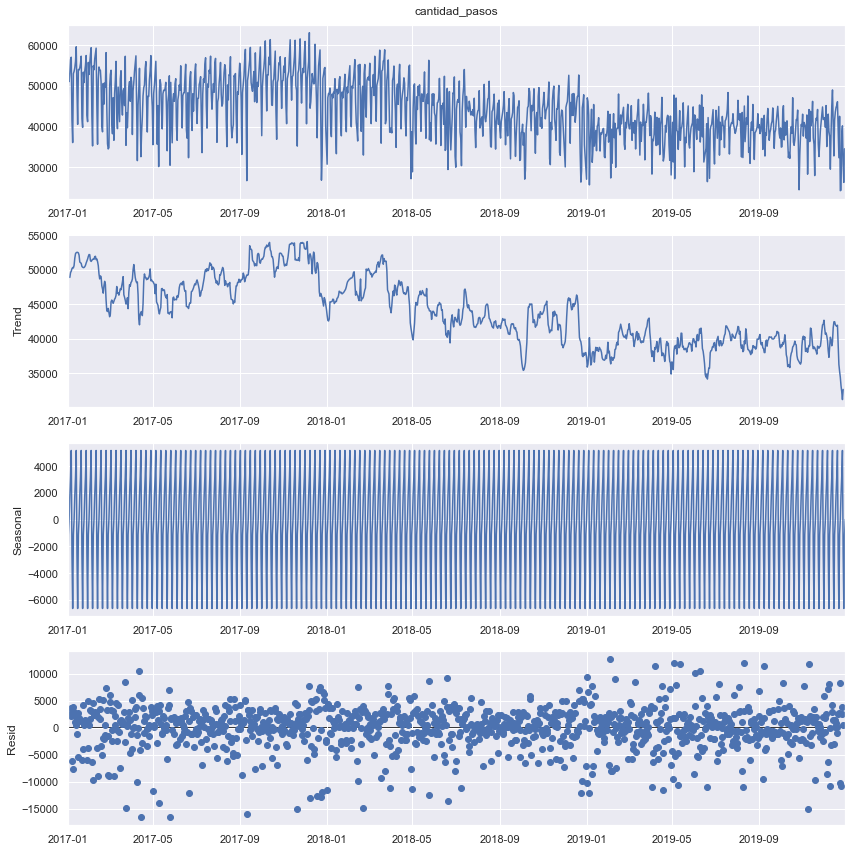

In [52]:
# definiendo varios estilos a los datos visualicemos todas las tendencias 
#=====================================================================================================
result = seasonal_decompose(semanal1.cantidad_pasos, model='additive')

result.seasonal.round()
result.trend

matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

### La imagen de nuestros datos:
    •	01-2017 a 09-2018 y 09-2019 – 12-2019 los pasos por el peaje analizados tuvieron una estacional visual. 
    •	El último trimestre del 2017 el peaje tubo entradas x encima de las 60.000 y por debajo de 30.0000 
            con pago en efectivo.
    •	Desde el mes de enero 2018 los pagos de contado empezaron a caer, hasta enero del 2019 que se empezó a
            estabilizarse.
    •	Los valores residuales están entre +/- 16000, hay algunos eventos por fuera de esta cifra luego
            analizaremos. 
    



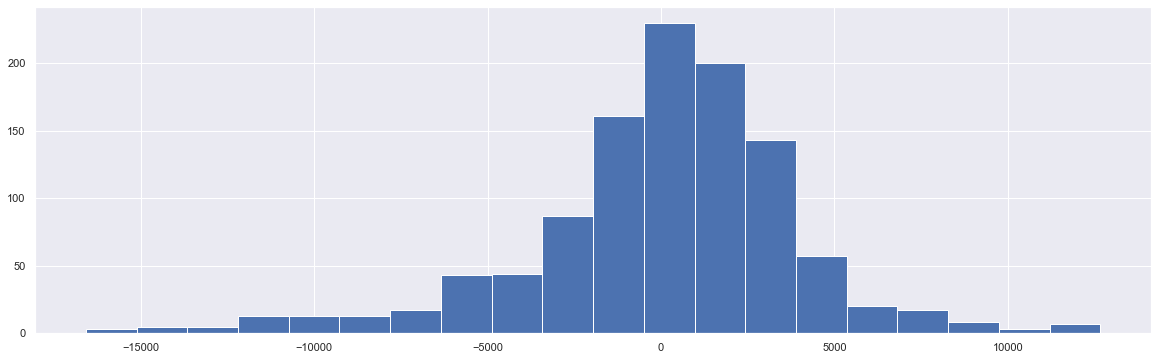

In [53]:
# Realizamos un histograma con los datos residuales
#======================================================================================
plt.figure(figsize = (20,6))
plt.hist(result.resid, bins = 20)
plt.show()

#### Con un Histograma contamos como se esparcen nuestros datos residuales a lo largo del dataset
 * Podemos comprender que la mayoría de los datos están entre +/-10000. 


<H2> <div style="color:#D0E8F5"; align="center">Primeros resultados</div></H2>
<div align="center">
<img src="https://media.istockphoto.com/photos/close-up-shot-red-darts-arrows-in-the-target-center-on-dark-blue-sky-picture-id1215280342?b=1&k=6&m=1215280342&s=170667a&w=0&h=7EbNtGBQbXdEhr1gfYDQdUNKWx71QOqWL1W3Qo_ezpc=" alt="drawing" style="width:800px;height: 400px"/></div>

### podemos decir con el modelo Benchmark, Como primer proyecto para predecir el flujo vehicular en una autopista de la Ciudad de Buenos Aires, Argentina. Autopista Illia, pago en Efectivo. nos da la siguiente información:
    •	Utilizamos todos los datos para entrenar en el modelo Arima en las series de tiempo. 
    •	El modelo tiene un error cuadrático medio de 7279 entradas, posiblemente porque conoce todos los datos, 
    •	AIC y BIC son equidistantes, entonces nuestro modelo Benchmark tiene un error AIC y BIC de +/- 28.261,
        El cual no está penalizando, pero de igual forma nos está dando una aproximación aceptable.     
    •	Vemos que los residuos están distribuidos aceptablemente, aunque vemos algunos residuos outliers.


    



## Modelos Avanzados

### Vamos a seguir las recomendaciones, Empezaremos haciendo todas las pruebas e hipótesis para verificar si nuestra serie de tiempo es o no estacionaria, como lo son las siguientes pruebas:
1. Prueba visual.
2. Diferencia entre la media y la varianza.
3. realiza una hipótesis con los métodos de prueba de estacionariedad más utilizados son la prueba ADF y la prueba KPSS.

### 1. Prueba visual
#### Considere las gráficas que usamos en la sección anterior. Pudimos identificar las series en las que la media y la varianza cambiaban con el tiempo, simplemente mirando cada gráfico. De manera similar, podemos graficar los datos y determinar si las propiedades de la serie están cambiando con el tiempo o no.

In [54]:
 # Creamos un nuevo dataset de trabajo
#====================================================================================================================

avanzados = sinoutliers.replace([np.inf, -np.inf], np.nan)
 

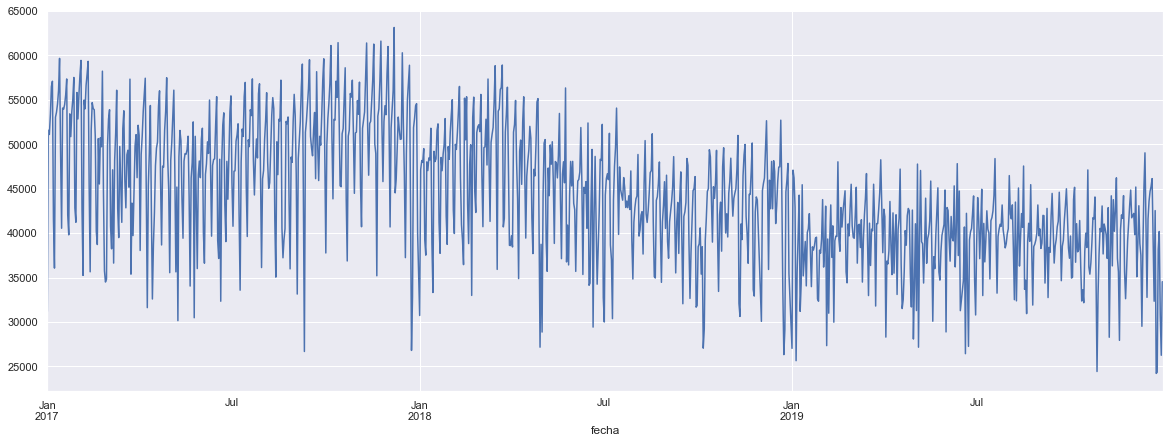

In [55]:
# 1.0 este es para hacer un plot de los datos
#====================================================================================================================

plt.figure(figsize = (20,7))
avanzados['cantidad_pasos'].plot()
plt.show()

#### No son patrones regulares y son puramente aleatorios o irregulares. Son variaciones aleatorias provocadas por influencias impredecibles.

### 2. Diferencia entre la media y la varianza.

#### Realizare una partición de los datos para ver si hay una diferencia significativa entre la media y la varianza en las diferentes particiones, si es así, entonces diríamos que la serie no es estacionaria.

In [56]:
# Este es para hacer partir los datos en 2 dataset, para verificar la media y la varianza
#============================================================================================================================

W = avanzados['cantidad_pasos']
separar = round(len(W) / 2)
W1, W2 = W[0:separar], W[separar:]
mean1, mean2 = W1.mean(), W2.mean()
var1, var2 = W1.var(), W2.var()

diferencia_Mean = round(((mean1/mean2)-1)*100)
diferencia_var = round(((var1/var2)-1)*100)
print('media particiones mean1=%f, mean2=%f' % (round(mean1), round(mean2)))
print('========================================/*\=============================')
print('Varianza particiones varianza1=%f, varianza2=%f' % (round(var1), round(var2)))
print('========================================/*\=============================')
print('porcentaje de diferencia entre medias=%f, porcentaje de diferencia entre varianzas=%f' %(diferencia_Mean,diferencia_var))


media particiones mean1=47982.000000, mean2=40143.000000
========================================/*\=============================
Varianza particiones varianza1=48621666.000000, varianza2=26734193.000000
========================================/*\=============================
porcentaje de diferencia entre medias=20.000000, porcentaje de diferencia entre varianzas=82.000000


#### Puede ver que tanto los valores de las dos medias como las dos variaciones difieren significativamente. Esto nuevamente sugiere que la serie no es estacionaria.

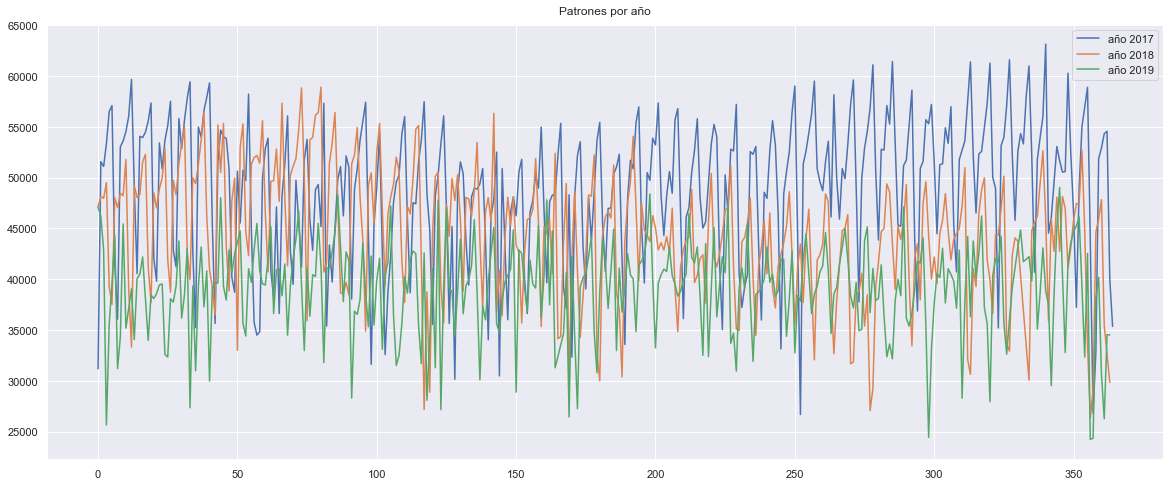

In [57]:
# Patrones de los datos x años 
#====================================================================================================================
plt.figure(figsize=(20,8))
plt.plot(W[0:365].dropna().values, label= 'año 2017')
plt.plot(W[366:730].dropna().values, label= 'año 2018')
plt.plot(W[731:1095].dropna().values, label= 'año 2019')
plt.legend()
plt.title('Patrones por año')
plt.show()

### ¿Podríamos concluir con esta gráfica, que establecer los dataset por año, vuelve  la serie estacionaria?
#### La verdad, es que tendríamos que buscar más pruebas que solo visuales para dar como verdadera esta recomendación, si bien la pregunta nos podría dar una línea a seguir, quisiera seguir explorando y para volver la serie estacionaria.


### 3. realiza una hipótesis con los métodos de prueba de estacionariedad más utilizados son la prueba ADF y la prueba KPSS.

In [58]:
# Adf Test y KPSS test
#====================================================================================

print('test Dickey-Fuller adf nuestro modelo necesitas diferenciacion adicional de                              : ',ndiffs(avanzados['cantidad_pasos'].dropna (), test='adf'))  # 2
 
print('KPSS Test：Kwiatkowski-Phillips-Schmidt-Shin Test de nuestro modelo necesitas diferenciacion adicional de: ', ndiffs(avanzados['cantidad_pasos'].dropna (), test='kpss'))  # 0

## PP test:
#print('PP Test：Phillips-Perron. Test de nuestro modelo necesitas diferenciacion adicional de                   : #',ndiffs(avanzados['cantidad_pasos'].dropna (), test='pp'))  # 2

test Dickey-Fuller adf nuestro modelo necesitas diferenciacion adicional de                              :  0
KPSS Test：Kwiatkowski-Phillips-Schmidt-Shin Test de nuestro modelo necesitas diferenciacion adicional de:  1


    Caso 1 : Ambas pruebas concluyen que la serie no es estacionaria -> la serie no es estacionaria.

    Caso 2 : Ambas pruebas concluyen que la serie es estacionaria -> la serie es estacionaria.

    Caso 3 : KPSS = estacionario y ADF = no estacionario -> tendencia estacionaria, elimine la tendencia 
             para hacer que la serie sea estrictamente estacionaria.

    Caso 4 : KPSS = no estacionario y ADF = estacionario -> diferencia estacionaria, use la diferenciación 
             para hacer la serie estacionaria.

### Prueba ADF (Augmented Dickey Fuller)
#### La prueba de Dickey Fuller es una de las pruebas estadísticas más populares. Puede usarse para determinar la presencia de raíz unitaria en la serie y, por lo tanto, ayudarnos a comprender si la serie es estacionaria o no. Las hipótesis nula y alternativa de esta prueba son:

    Hipótesis nula : la serie tiene una raíz unitaria (valor de a = 1)

    Hipótesis alternativa : La serie no tiene raíz unitaria.

Si no rechazamos la hipótesis nula, podemos decir que la serie es no estacionaria. Esto significa que la serie puede ser lineal o estacionaria en diferencia (entenderemos más sobre estacionaria en diferencia en la siguiente sección).

In [59]:
#define la función para la prueba ADF 
#=================================================================================================================

def adf_test(timeseries):
    #Realice la prueba Dickey-Fuller:
    print ('Resultados de la prueba Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test estadistico','p-value','# de retazos usados(lags)','Numero de observaciones usadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(avanzados['cantidad_pasos'])

Resultados de la prueba Dickey-Fuller:
Test estadistico                   -1.8
p-value                             0.4
# de retazos usados(lags)          22.0
Numero de observaciones usadas   1072.0
Critical Value (1%)                -3.4
Critical Value (5%)                -2.9
Critical Value (10%)               -2.6
dtype: float64


#### Prueba de estacionariedad : si la estadística de prueba es menor que el valor crítico, podemos rechazar la hipótesis nula . Cuando el estadístico de prueba es mayor que el valor crítico, no rechazamos la hipótesis nula (lo que significa que la serie no es estacionaria).

#### El estadístico de prueba mayor que el valor crítico, lo que implica que la serie no es estacionaria. Esto confirma nuestra observación original que vimos inicialmente en la prueba visual.

In [60]:
#define la función para la prueba KPS 
#=================================================================================================================

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Resultado: la serie es {"no " if p_value < 0.05 else ""}estacionaria')

kpss_test(avanzados['cantidad_pasos'])


KPSS Statistic: 3.886939965846103
p-value: 0.01
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: la serie es no estacionaria


Prueba de estacionariedad-Prueba KPSS:
        
     KPSS Test：Kwiatkowski-Phillips-Schmidt-Shin Test

Primero, suponga que la secuencia es estacionaria. Si el valor P obtenido de la hipótesis es menor que el umbral (generalmente 5%), entonces la hipótesis no es válida; de lo contrario, la hipótesis es válida. P

Prueba de estacionariedad
Para una serie de tiempo, ¿cómo lo manejamos?

    1 Compruebe si la serie está estacionaria
    2 Si la serie no es estacionaria, transfórmala en una serie estacionaria mediante las matemáticas
    3 Compruebe si la secuencia es ruido blanco
    4 Siguiente



### Prueba de ruido blanco-Prueba de caja de Ljung
#### Primero, suponga que la secuencia es ruido blanco, si el valor de P obtenido de la hipótesis es menor que el umbral (generalmente 5%), entonces la hipótesis no es válida, de lo contrario, la hipótesis es válida

In [61]:
# Interpretación de ruido blanco
#====================================================================================================================
ss = ljbox(avanzados['cantidad_pasos'], lags=1)
print('Si el valor de P es mayor 5% la hipotesis de ruido blanco es cierta =', ss[1])

Si el valor de P es mayor 5% la hipotesis de ruido blanco es cierta = [6.77152981e-72]


#### Los ruidos blancos es que son piezas fundamentales de la construcción de los modelos arma. Lo que termina significando el concepto es que deseamos que la media de la serie sea constante, que la varianza también y que la covarianza solo dependa de la distancia temporal entre los datos. Estos supuesto son parecidos a los que mencioné de los ruidos blancos.

### Sesgo-Sesgo

#### La asimetría es una medida de la dirección y el grado de asimetría de una distribución estadística y es una característica numérica del grado de asimetría de una distribución estadística.

#### Hay tres tipos de sesgo en el valor numérico:

    Distribución normal (sesgo = 0)
    Distribución sesgada a la izquierda (sesgo <0), el pico está a la izquierda.
    Distribución sesgada a la derecha (sesgo> 0), el pico está a la derecha.


In [62]:
# Este es para revisar la asimetria de los datos
#===================================================================================================================

skew(avanzados['cantidad_pasos'])

-0.015323130205755871

#### La distribución de nuestros datos esta sesgada a la derecha. 

### Hacer una serie temporal estacionaria

#### Para quitar esa tendencia usamos el comando “diff”, que lo que hace es restar a cada observacion el valor anterior, con lo que nos quedara es la perdida de la tendencia de la serie.



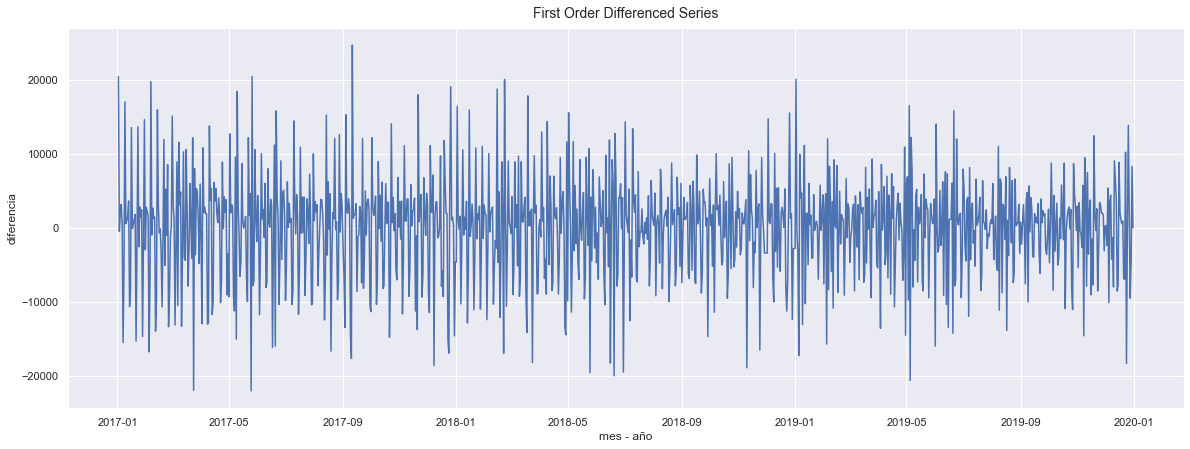

In [63]:
# Este es para graficar el diff del modelo.
#===============================================================================

avanzados['Difference'] = avanzados['cantidad_pasos'].diff(1)

# Plot the Change
plt.figure(figsize=(20, 7))
plt.plot(avanzados['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('mes - año', fontsize=12)
plt.ylabel('diferencia', fontsize=12)
plt.show()

In [64]:
#apply adf test on the series
#===============================================================================

adf_test(avanzados['Difference'].dropna ())
print('=============================================================/*○\========================')
kpss_test(avanzados['Difference'].dropna ())

Resultados de la prueba Dickey-Fuller:
Test estadistico                  -10.5
p-value                             0.0
# de retazos usados(lags)          21.0
Numero de observaciones usadas   1072.0
Critical Value (1%)                -3.4
Critical Value (5%)                -2.9
Critical Value (10%)               -2.6
dtype: float64
=============================================================/*○\========================
KPSS Statistic: 0.045755070153615046
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: la serie es estacionaria


#### Diferenciación regular para la eliminación de la tendencia, podemos observar que la hipótesis nula fue rechazada, con lo cual nuestro argumento de tener un dataset estacionario se logró.



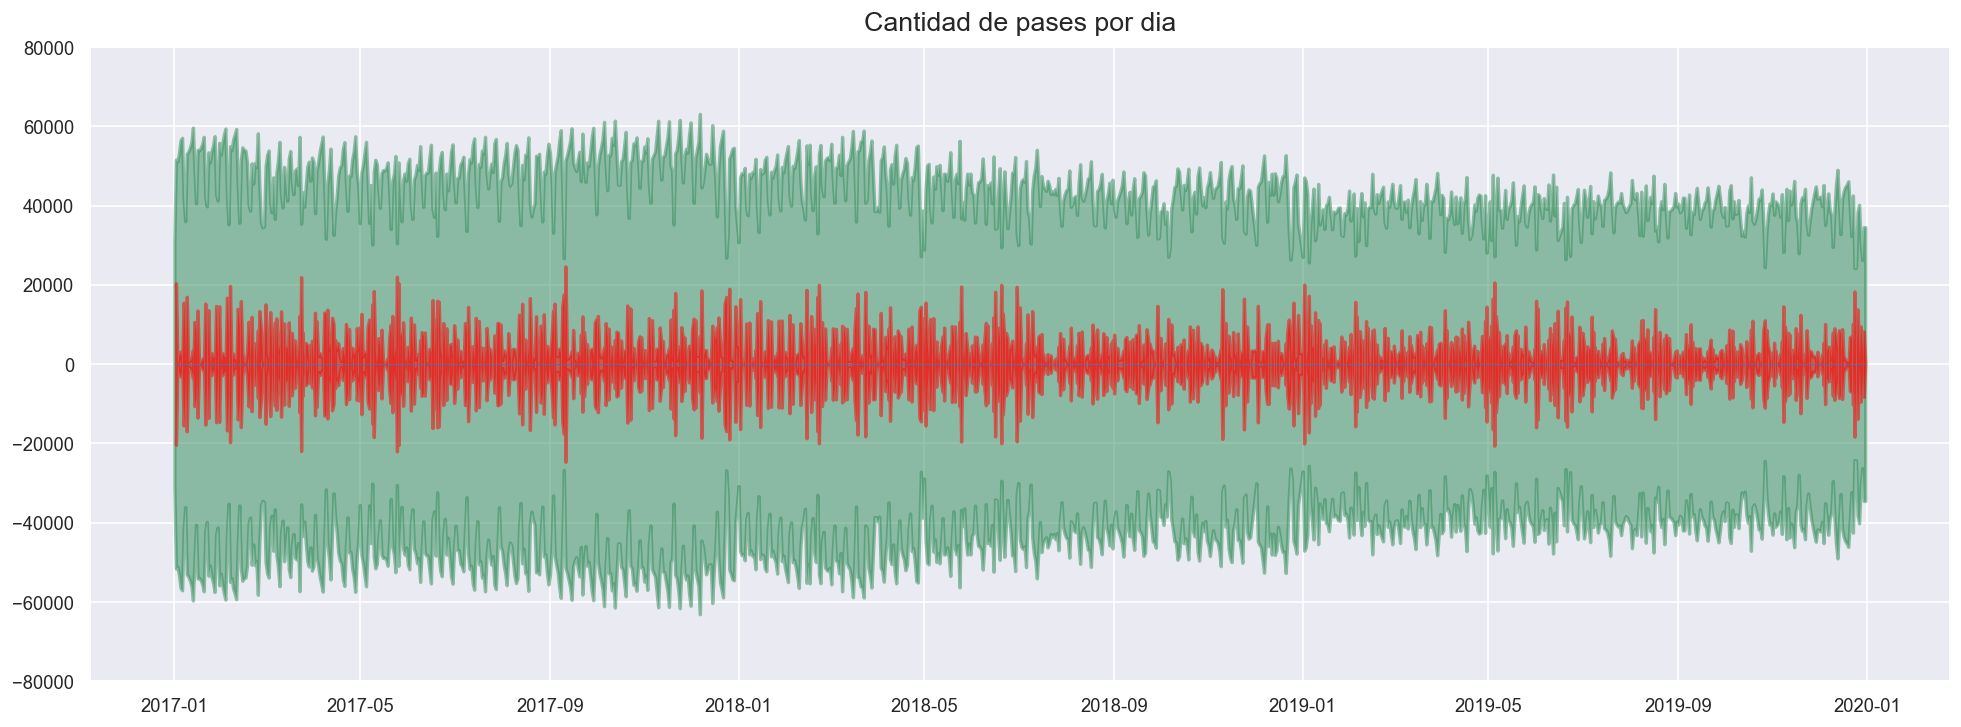

In [65]:
# Este es para realizar un plot de los datos y una diferenciación visual 
#===================================================================================================================

x1 = avanzados.index
y1 = avanzados['cantidad_pasos'].values
y2 = avanzados['Difference'].values
# Plot
fig, ax = plt.subplots(1, 1, figsize=(20,7), dpi= 120)
plt.fill_between(x1, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.fill_between(x1, y1=y2, y2=-y2, alpha=0.5, linewidth=2, color='red')

plt.ylim(-80000, 80000)
plt.title('Cantidad de pases por dia', fontsize=16)
plt.hlines(y=0, xmin=np.min(avanzados.index), xmax=np.max(avanzados.index), linewidth=.5)
plt.show()

#### Pero en la observación de volver los datos estacionarios, nos daría la impresión de que los modelos que realicemos para predecir solo estarían próximos a 20.000 es decir si las entradas en ese caso fueron 60.000 entonces la aproximación máxima del modelo sería de 33%, lo cual de entrada podríamos decir que no mejoría mucho nuestro modelo.

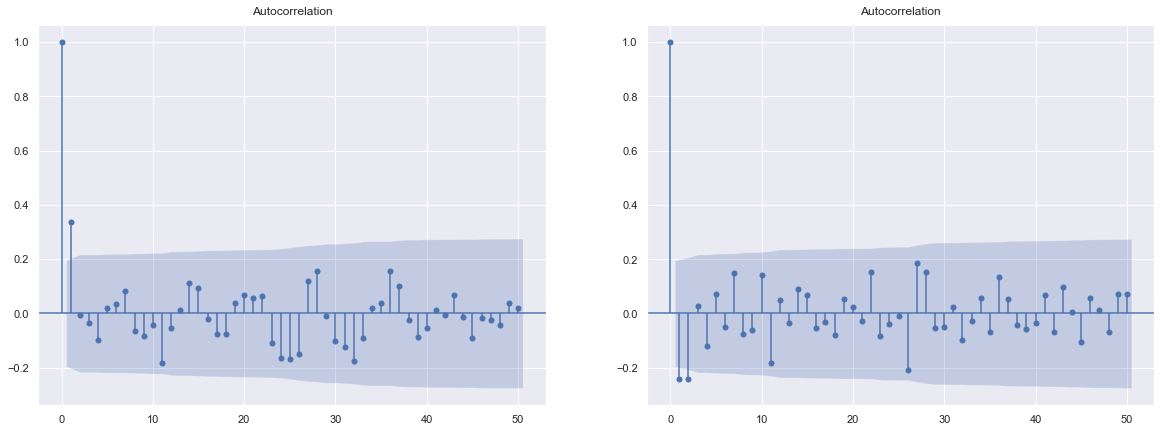

In [66]:
# Este es para función de autocorrelación ( ACF )
#===================================================================================================================

fig, axes = plt.subplots(1, 2, figsize=(20,7))

plot_acf(avanzados['cantidad_pasos'][-100:], lags=50, ax=axes[0])
plot_acf(avanzados['Difference'][-100:], lags=50, ax=axes[1])
plt.show()

### ¿Los 2 gráficos están dentro del límite de confianza?
#### Estaría perfecto con Rezago de 1 para el set de datos original.
#### Con un rezago de 3 para una seria diferenciada
 


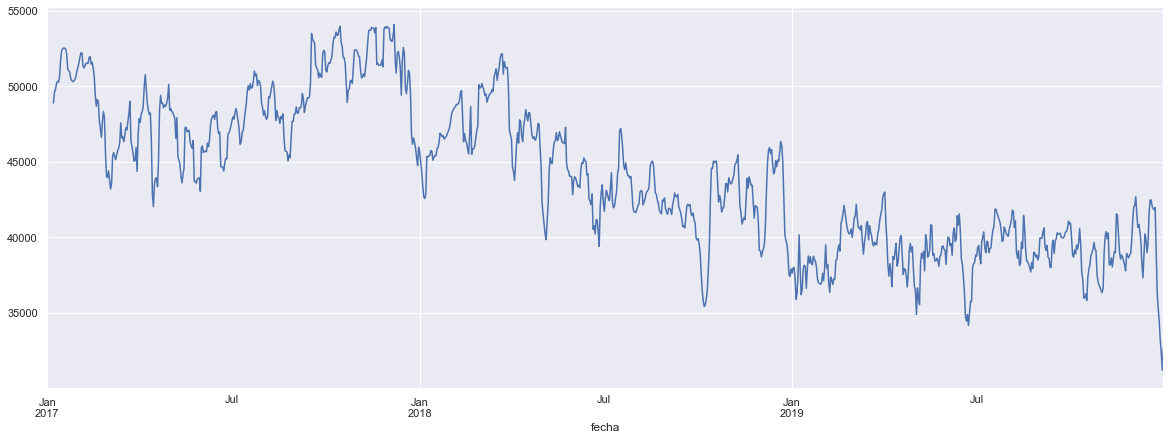

In [67]:
# este es para  realizar una ventana en el set de datos
# ==============================================================================================================

avanzados['Rolling_7'] = avanzados['cantidad_pasos'].rolling(window= 7).mean() 
plt.figure(figsize = (20,7))
avanzados['Rolling_7'].plot()
plt.show()

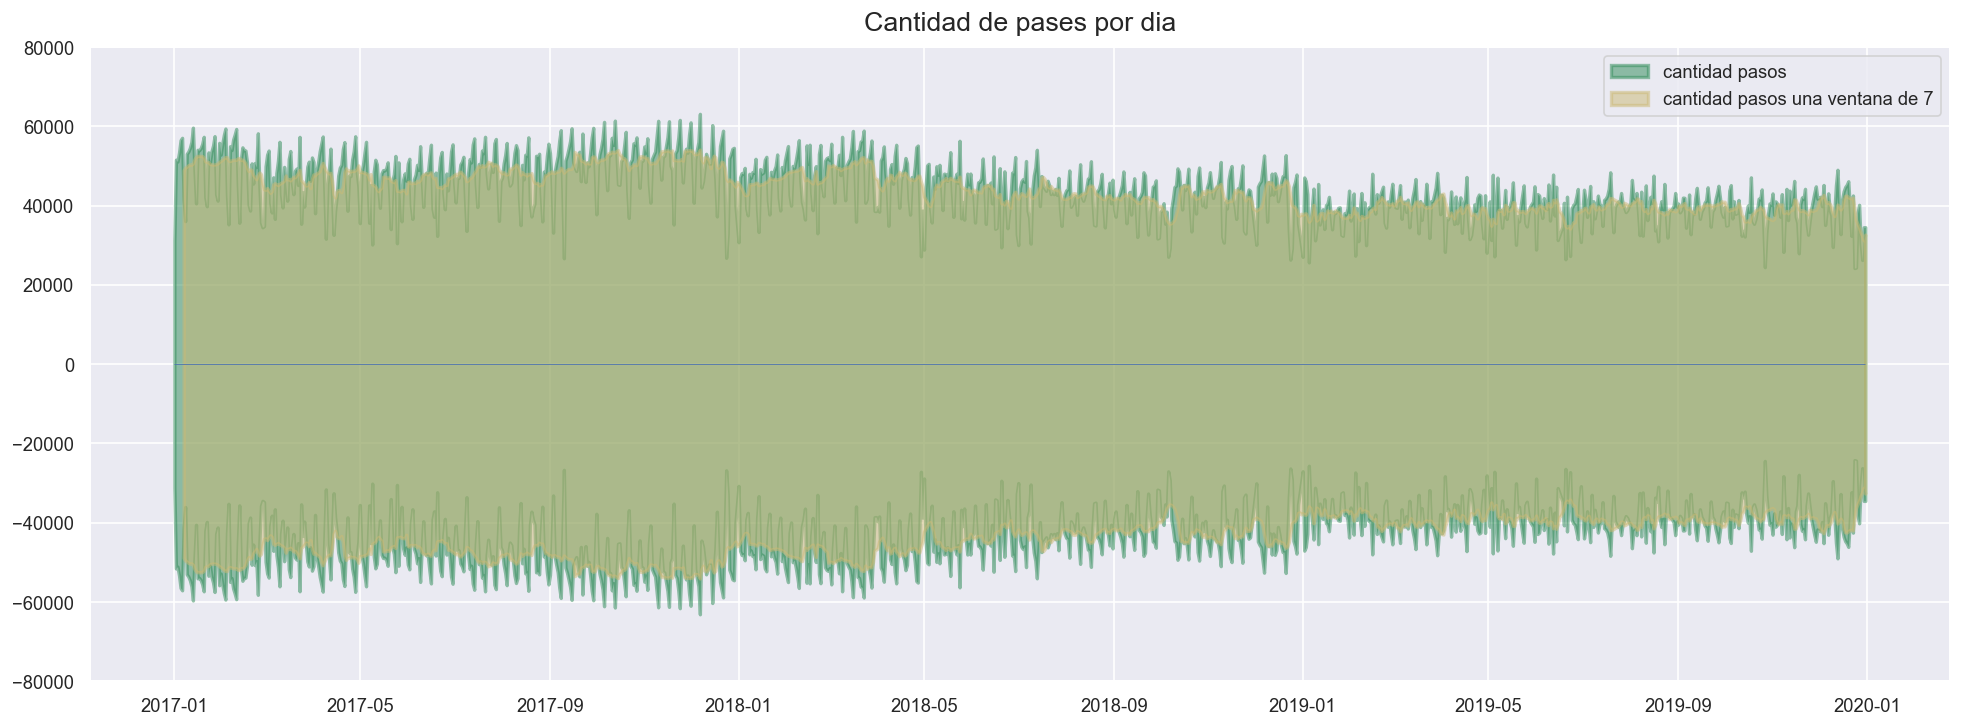

Resultados de la prueba Dickey-Fuller:
Test estadistico                   -1.6
p-value                             0.5
# de retazos usados(lags)          22.0
Numero de observaciones usadas   1066.0
Critical Value (1%)                -3.4
Critical Value (5%)                -2.9
Critical Value (10%)               -2.6
dtype: float64
=============================================================/*○\========================
KPSS Statistic: 3.8991108021771215
p-value: 0.01
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: la serie es no estacionaria


In [68]:
# Ese es para realizar un plot de los datos y una diferenciación visual 
#===========================================================================================================================================

x1 = avanzados.index
y1 = avanzados['cantidad_pasos'].values
y2 = avanzados['Rolling_7'].values
# Plot
fig, ax = plt.subplots(1, 1, figsize=(20,7), dpi= 120)
plt.fill_between(x1, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen', label = 'cantidad pasos')
plt.fill_between(x1, y1=y2, y2=-y2, alpha=0.5, linewidth=2, color='y', label = 'cantidad pasos una ventana de 7')
plt.legend()
plt.ylim(-80000, 80000)
plt.title('Cantidad de pases por dia', fontsize=16)
plt.hlines(y=0, xmin=np.min(avanzados.index), xmax=np.max(avanzados.index), linewidth=.5)
plt.show()
#apply adf test on the series
adf_test(avanzados['Rolling_7'].dropna ())
print('=============================================================/*○\========================')
kpss_test(avanzados['Rolling_7'].dropna ())

### Hacer una ventana de 7 
#### Según la prueba Dickey-Fuller y de KPSS, Hacer esta ventana de 7  no vuelve  estacionarios los datos, pero a simple vista seria excelentes para hacer que un modelo sirviera para predecir.


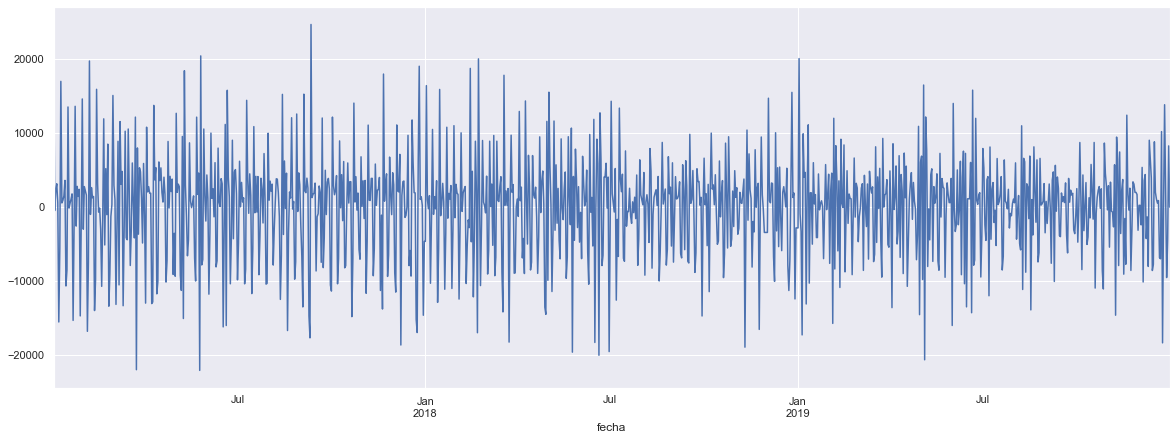

In [69]:
# plot para visualar la serie estacionaria retardo 1
#===========================================================================================================================================

plt.figure(figsize = (20,7))

avanzados['cantidad_pasos_diff_1'] = avanzados['cantidad_pasos']- avanzados['cantidad_pasos'].shift(1) 
avanzados['cantidad_pasos_diff_1'].dropna ().plot()
plt.show()

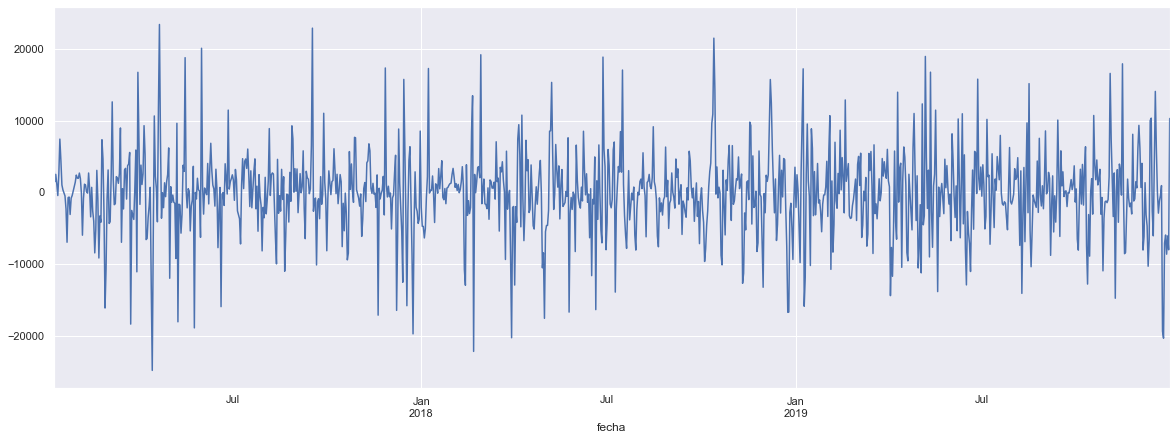

In [70]:
# plot para visualar la serie estacionaria retardo 7
#===========================================================================================================================================

plt.figure(figsize = (20,7))

avanzados['cantidad_pasos_diff_7'] = avanzados['cantidad_pasos']- avanzados['cantidad_pasos'].shift(7) 
avanzados['cantidad_pasos_diff_7'].dropna ().plot()
plt.show()

### Con el anterior grafico podemos decir que nuestros datos son estacionales y que tienen un ciclo completo cada 7 dias y que se repite cada mes.


Resultados de la prueba Dickey-Fuller:
Test estadistico                  -10.5
p-value                             0.0
# de retazos usados(lags)          21.0
Numero de observaciones usadas   1072.0
Critical Value (1%)                -3.4
Critical Value (5%)                -2.9
Critical Value (10%)               -2.6
dtype: float64
=============================================================/*○\========================
KPSS Statistic: 0.045755070153615046
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: la serie es estacionaria


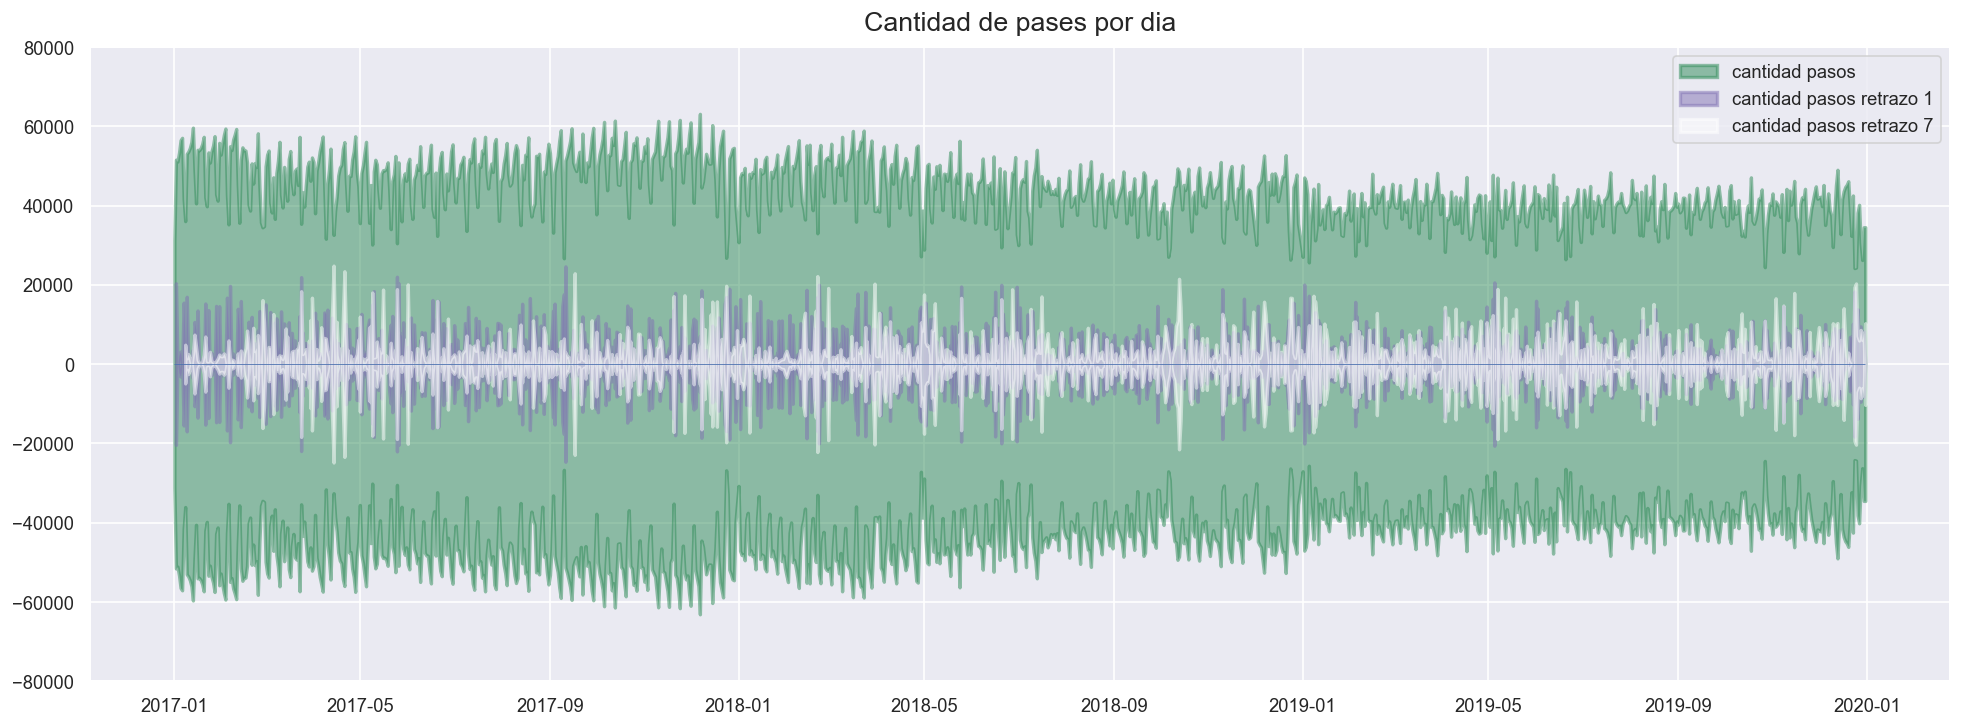

Resultados de la prueba Dickey-Fuller:
Test estadistico                   -9.1
p-value                             0.0
# de retazos usados(lags)          21.0
Numero de observaciones usadas   1066.0
Critical Value (1%)                -3.4
Critical Value (5%)                -2.9
Critical Value (10%)               -2.6
dtype: float64
=============================================================/*○\========================
KPSS Statistic: 0.04078302693586964
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: la serie es estacionaria


In [71]:
# aplicando adf y kpss test dentro de la serie de datos
# Ese es para realizar un plot de los datos y una diferenciación visual 
#===========================================================================================================================================
adf_test(avanzados['cantidad_pasos_diff_1'].dropna ())
print('=============================================================/*○\========================')
kpss_test(avanzados['cantidad_pasos_diff_1'].dropna ())

x1 = avanzados.index
y1 = avanzados['cantidad_pasos'].values
y2 = avanzados['cantidad_pasos_diff_1'].values
y3 = avanzados['cantidad_pasos_diff_7'].values
# Plot
fig, ax = plt.subplots(1, 1, figsize=(20,7), dpi= 120)
plt.fill_between(x1, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen', label = 'cantidad pasos ')
plt.fill_between(x1, y1=y2, y2=-y2, alpha=0.5, linewidth=2, color='m', label = 'cantidad pasos retrazo 1')
plt.fill_between(x1, y1=y3, y2=-y3, alpha=0.5, linewidth=2, color='w', label = 'cantidad pasos retrazo 7')
plt.legend()
plt.ylim(-80000, 80000)
plt.title('Cantidad de pases por dia', fontsize=16)
plt.hlines(y=0, xmin=np.min(avanzados.index), xmax=np.max(avanzados.index), linewidth=.5)
plt.show()
#apply adf test on the series
adf_test(avanzados['cantidad_pasos_diff_7'].dropna ())
print('=============================================================/*○\========================')
kpss_test(avanzados['cantidad_pasos_diff_7'].dropna ())

### Diferencia estacional
#### En la diferenciación estacional, en lugar de calcular la diferencia entre valores consecutivos, calculamos la diferencia entre una observación y una observación anterior de la misma temporada. Por ejemplo, una observación realizada un lunes se restará de una observación realizada el lunes anterior. 


#### Podemos concluir que los datos son estacionarios pero volverlos estacionarios sacrifica el valor y es la tercera parte, lo cual no es muy atractivo.


### Transformación
#### Las transformaciones se utilizan para estabilizar la varianza no constante de una serie. Los métodos de transformación comunes incluyen transformación de potencia, raíz cuadrada y transformación logarítmica. Hagamos una transformación de registro rápida y una diferenciación en nuestro conjunto de datos, para este caso vamos a realizar solo la transformacion logarítmica:

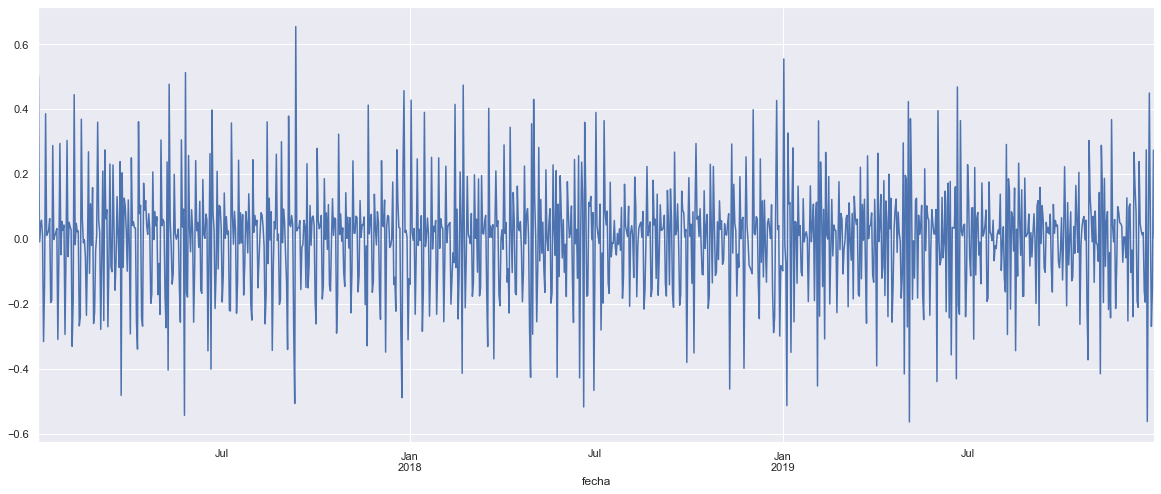

In [72]:
# plot para visualar la serie estacionaria retardo logaritmico
#======================================================================================================================================================

plt.figure(figsize = (20,8))

avanzados['cantidad_pasos_log'] = np.log(sinoutliers['cantidad_pasos'])
avanzados['cantidad_pasos_log_diff'] =    avanzados['cantidad_pasos_log'] - avanzados['cantidad_pasos_log'].shift(1)

avanzados['cantidad_pasos_log_diff'].dropna().plot()
plt.show()

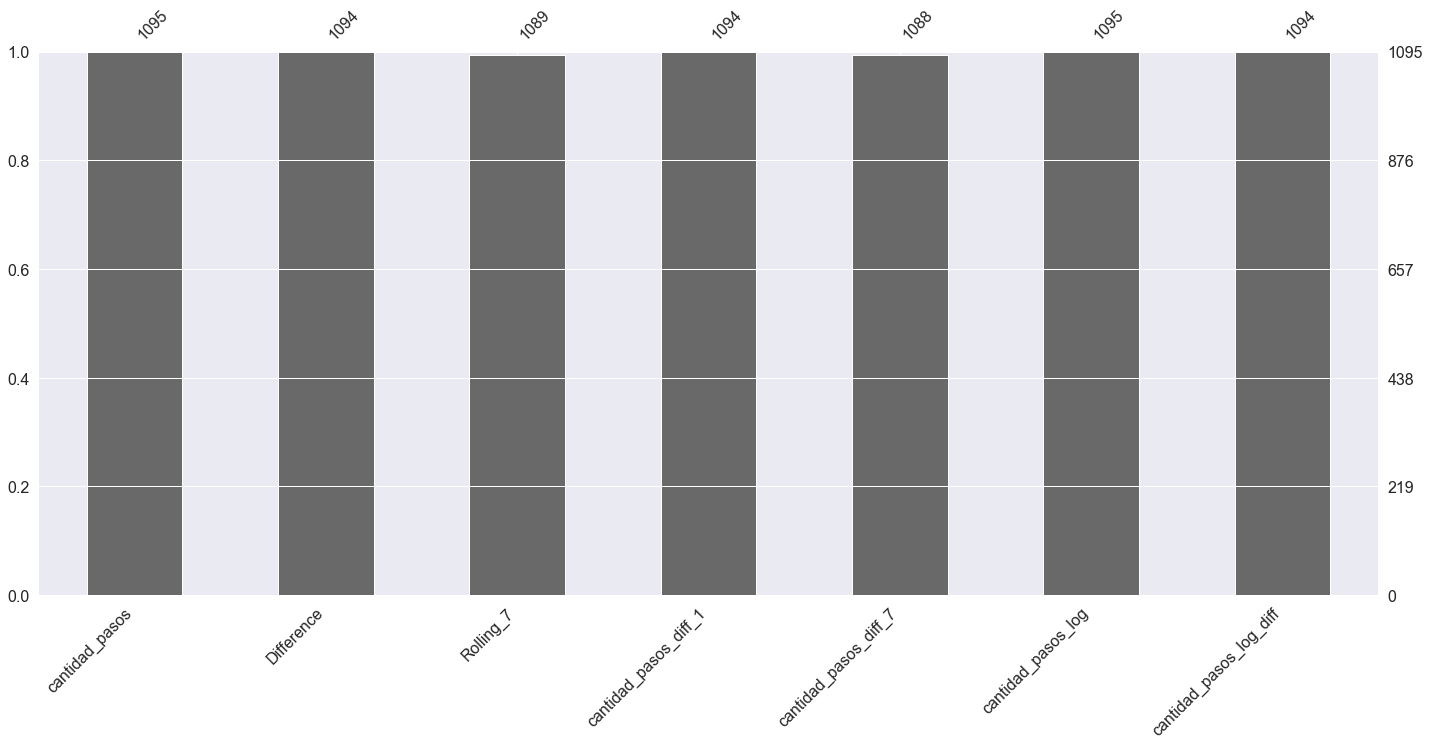

In [73]:
# Estado de datos detectar “missing values”
#==========================================================================================================

msno.bar(avanzados)
plt.show()

Imputar valores perdidos

In [74]:
# Para transformar datos NaN con extrategia mean
# ===============================================================================================================

imputer = SimpleImputer(missing_values=NaN, strategy='mean')


Xtranform = imputer.fit_transform(avanzados)


print('Missing: %d' % isnan(Xtranform).sum())

Missing: 0


In [75]:
# creando un nuevo dataFrame
# ================================================================================================== 

index_values = avanzados.index


column_values = ['cantidad_pasos', 'Difference', 'Rolling_7',
                 'cantidad_pasos_diff_1','cantidad_pasos_diff_7',  
                'cantidad_pasos_log', 'cantidad_pasos_log_diff']

# 'resta', '',
transforma = pd.DataFrame(  Xtranform,
                            index = index_values, 
                            columns = column_values)

impresión de resultados de  los datos originales convertidos en algoritmos
Resultados de la prueba Dickey-Fuller:
Test estadistico                   -1.8
p-value                             0.4
# de retazos usados(lags)          22.0
Numero de observaciones usadas   1072.0
Critical Value (1%)                -3.4
Critical Value (5%)                -2.9
Critical Value (10%)               -2.6
dtype: float64
=============================================================/*○\========================
KPSS Statistic: 3.8934845543177232
p-value: 0.01
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: la serie es no estacionaria
None


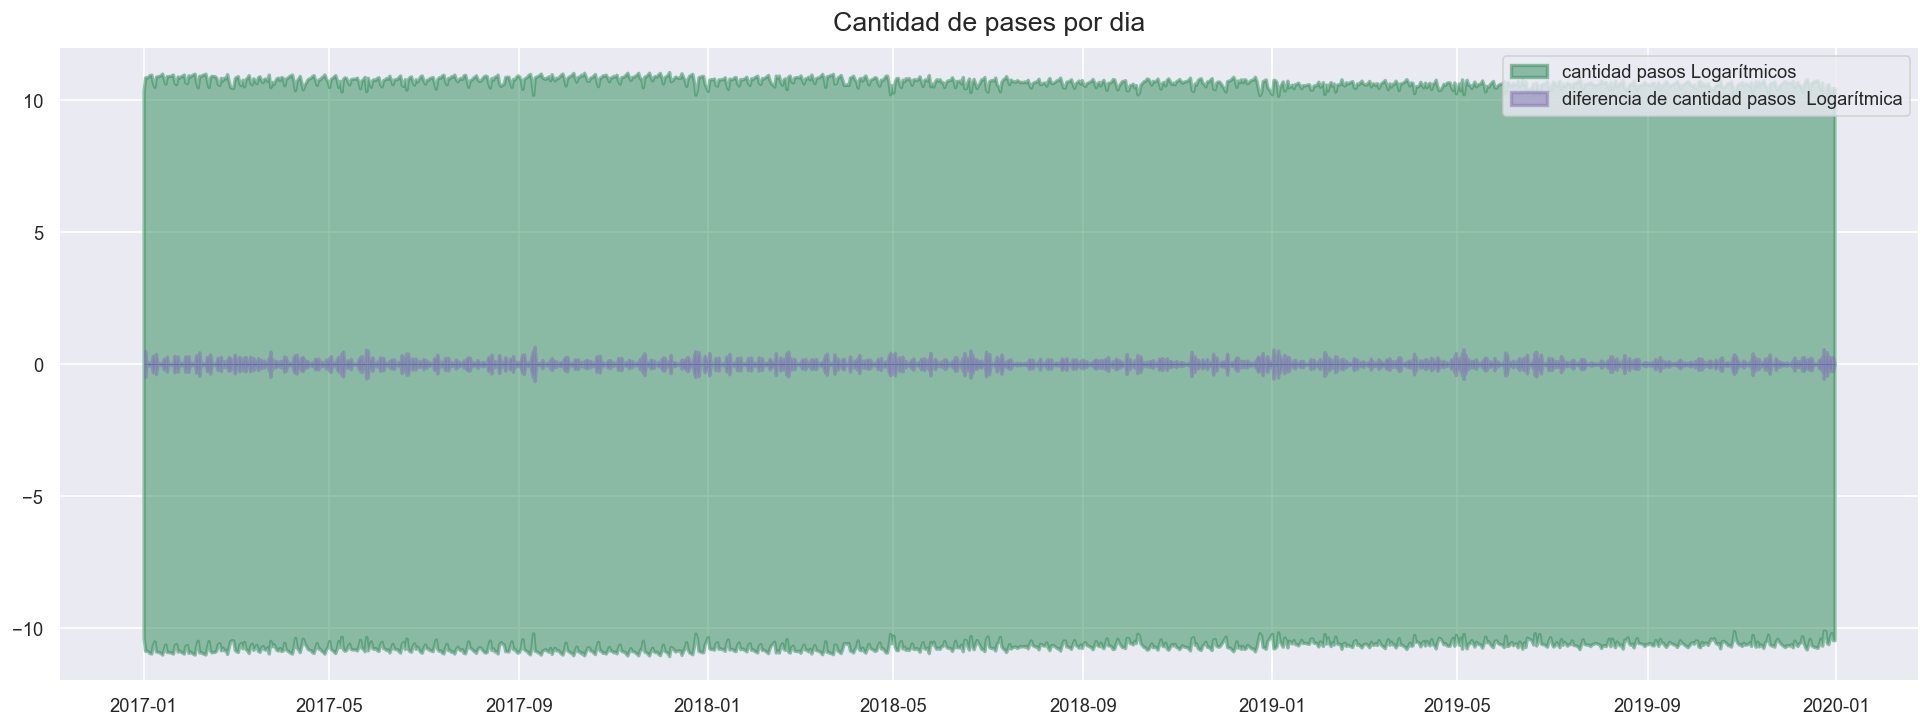

impresión de resultados del diferencial de los datos originales restados y convertidos en algoritmos
Resultados de la prueba Dickey-Fuller:
Test estadistico                  -10.6
p-value                             0.0
# de retazos usados(lags)          21.0
Numero de observaciones usadas   1072.0
Critical Value (1%)                -3.4
Critical Value (5%)                -2.9
Critical Value (10%)               -2.6
dtype: float64
=============================================================/*○\========================
KPSS Statistic: 0.04891513035000671
p-value: 0.1
num lags: 22
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: la serie es estacionaria


In [76]:
#Aplicacion  adf test on the series transformacion logaritmica
# Ese es para realizar un plot de los datos y una diferenciación visual 
# ================================================================================================== 
print ('impresión de resultados de  los datos originales convertidos en algoritmos')
adf_test(transforma['cantidad_pasos_log'])
print('=============================================================/*○\========================')
print(kpss_test(transforma['cantidad_pasos_log']))


W1 = avanzados.index
z1 = avanzados['cantidad_pasos_log'].values
z2 = avanzados['cantidad_pasos_log_diff'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20,7), dpi= 120)
plt.fill_between(W1, y1=z1, y2=-z1, alpha=0.5, linewidth=2, color='seagreen', label = 'cantidad pasos Logarítmicos')
plt.fill_between(x1, y1=z2, y2=-z2, alpha=0.5, linewidth=2, color='m', label = 'diferencia de cantidad pasos  Logarítmica')

plt.legend()
plt.ylim(-12, 12)
plt.title('Cantidad de pases por dia', fontsize=16)
plt.hlines(y=0, xmin=np.min(avanzados.index), xmax=np.max(avanzados.index), linewidth=.5)
plt.show()
print ('impresión de resultados del diferencial de los datos originales restados y convertidos en algoritmos')
#apply adf test on the series
adf_test(avanzados['cantidad_pasos_log_diff'].dropna ())
print('=============================================================/*○\========================')
kpss_test(avanzados['cantidad_pasos_log_diff'].dropna ())

### El objetivo se cumple y se transforman la serie, en series estacionarias, pero tenemos un umbral de información a predecir perdida esto sucede al volver la serie estacionaria, ya que crea una forma ingenua de predecir, ¿Esto será cierto?  Continuemos.

### Resumen 
#### los modelos estacionarios serian:
    1.  Difference
    2. cantidad_pasos_diff_1
    3. cantidad_pasos_diff_7
    4. cantidad_pasos_log_diff

los modelos no estacionarios serian :

    1.  Cantidad de pasos 
    2. cantidad_pasos_log

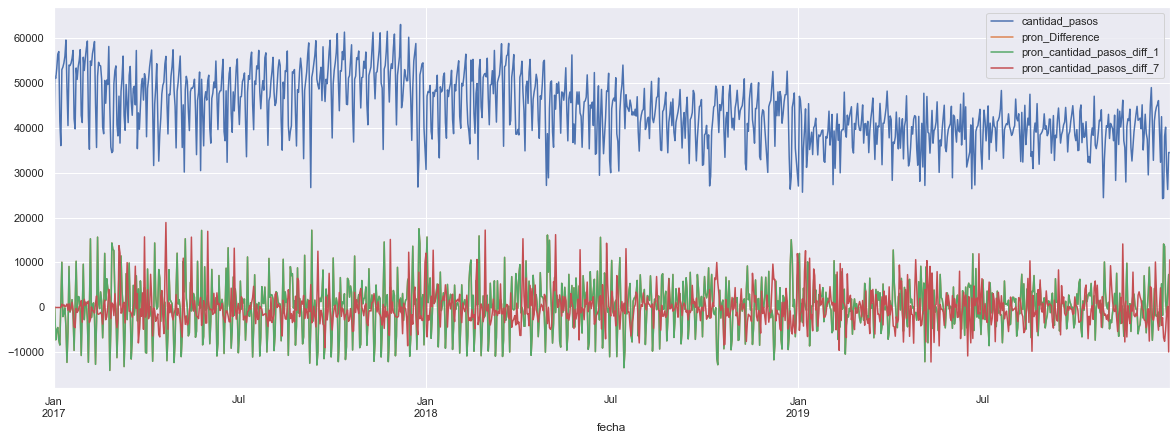

In [77]:
# Modelo ARIMA sobre el valor pases.
#===================================================================================================================

X1 = transforma['cantidad_pasos']
X2 = transforma['cantidad_pasos_log']

E1 = transforma['Difference']
E2 = transforma['cantidad_pasos_diff_1']
E3 = transforma['cantidad_pasos_diff_7']
E4 = transforma['cantidad_pasos_log_diff']




ari1 = ARIMA(E1.iloc[1:], order=(7, 0, 8)).fit()  
ari2 = ARIMA(E2.iloc[1:], order=(7, 0, 8)).fit()  
ari3 = ARIMA(E3.iloc[1:], order=(7, 0, 8)).fit()  
ari4 = ARIMA(E4.iloc[1:], order=(7, 0, 8)).fit()  

#Result = ari.fit()  
transforma['pron_Difference'] = ari1.fittedvalues
transforma['pron_cantidad_pasos_diff_1'] = ari2.fittedvalues
transforma['pron_cantidad_pasos_diff_7'] = ari3.fittedvalues
transforma['pron_cantidad_pasos_log_diff'] = ari4.fittedvalues

 

plot = transforma[['cantidad_pasos', 'pron_Difference','pron_cantidad_pasos_diff_1','pron_cantidad_pasos_diff_7' ]].plot(figsize=(20, 7)) 

In [78]:
# Para transformar datos NaN con extrategia
# ===============================================================================================================

Xtranform1 = imputer.fit_transform(transforma)


print('Missing: %d' % isnan(Xtranform1).sum())

Missing: 0


In [79]:
# creando un nuevo dataFrame
# ================================================================================================== 

index_values = transforma.index


column_values = ['cantidad_pasos', 'Difference', 'Rolling_7',
                 'cantidad_pasos_diff_1','cantidad_pasos_diff_7',  
                'cantidad_pasos_log', 'cantidad_pasos_log_diff',
                'pron_Difference', 'pron_cantidad_pasos_diff_1', 'pron_cantidad_pasos_diff_7',
                'pron_cantidad_pasos_log_diff']


# 'resta', '',
transforma1 = pd.DataFrame(  Xtranform1,
                            index = index_values, 
                            columns = column_values)

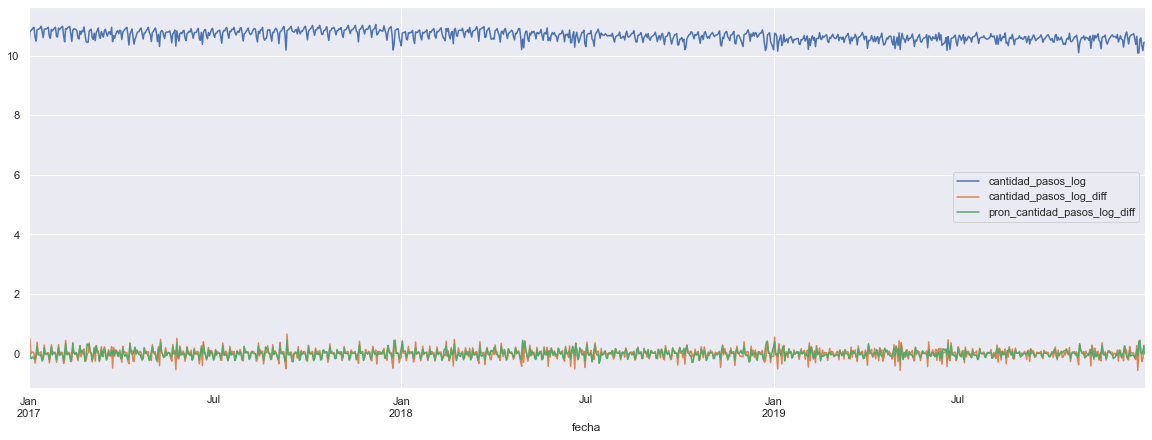

In [80]:
# Ese es para realizar un plot de los datos y una diferenciación visual 
# =================================================================================================

plot = transforma[['cantidad_pasos_log', 'cantidad_pasos_log_diff','pron_cantidad_pasos_log_diff']].plot(figsize=(20, 7)) 

In [81]:
# Este es para las metricas de los modelos Arima con las diferentes trasformaciones
#=================================================================================================================================

rmse1 = np.sqrt(mean_squared_error(transforma1['pron_Difference'], transforma1['Difference'])) 
rmse2 = np.sqrt(mean_squared_error(transforma1['pron_cantidad_pasos_diff_1'], transforma1['cantidad_pasos_diff_1']))
rmse3 = np.sqrt(mean_squared_error(transforma1['pron_cantidad_pasos_diff_7'], transforma1['cantidad_pasos_diff_7']))
rmse4 = np.sqrt(mean_squared_error(transforma1['pron_cantidad_pasos_log_diff'], transforma1['cantidad_pasos_log_diff']))

print('RMSE, AIC y BIC con una diferencia de 1 (pron_Difference)                    =',round(rmse1),',',  round(ari1.aic), 'y', round(ari1.bic))
print('RMSE, AIC y BIC con una diferencia de 1 (pron_cantidad_pasos_diff_1)         =', round(rmse2),',',round(ari2.aic), 'y', round(ari2.bic))
print('RMSE, AIC y BIC con una diferencia de 7 (pron_cantidad_pasos_diff_7)         =',round(rmse3),',', round(ari3.aic), 'y', round(ari3.bic))
print('RMSE, AIC y BIC con una diferencia logaritmica(pron_cantidad_pasos_log_diff) =',round(rmse4,2),',', round(ari4.aic), 'y', round(ari4.bic))

RMSE, AIC y BIC con una diferencia de 1 (pron_Difference)                    = 4460 , 21521 y 21606
RMSE, AIC y BIC con una diferencia de 1 (pron_cantidad_pasos_diff_1)         = 4460 , 21521 y 21606
RMSE, AIC y BIC con una diferencia de 7 (pron_cantidad_pasos_diff_7)         = 4341 , 21490 y 21575
RMSE, AIC y BIC con una diferencia logaritmica(pron_cantidad_pasos_log_diff) = 0.11 , -1613 y -1528


<H2> <div style="color:#D0E8F5"; align="center">Analicemos estos resultados y ¿replanteamos?</div></H2>

<div align="center"> <img src="https://media.istockphoto.com/vectors/stock-down-vector-id1128017494?k=6&m=1128017494&s=612x612&w=0&h=rqxu7IWeeFji-kfYSczx032U9KkBhRcvZBGQRo3OF2k=" alt="drawing" style="width:800px;height: 400px"/></div>

#### Realizamos varias hipótesis donde se plantea que la serie no es estacionaria y para poder mejorar el modelo predictor se debe convertir en una serie estacionaria.Pero para lo cual planteamos varias transformaciones de la serie, estas plantean que, para poder volver la serie estacionaria, se realiza con la diferencia entre la serie original y una tendencia posterior.
#### Observamos que el resultante es un dataframe estacionario, pero al ingresarlo estos datos diferenciados a un modelo como ARIMA, el resultante es modelo que va a predecir máximo la tercera del valor original así mismo como lo visualizamos en las imagenes por ejemplo si tomo solo los valores máximos. 

    Serie original 'cantidad_pasos'                    = 63127.0 		   No estacionaria 
    Diferencia de 1 'Difference'                       = 24646.0 		   estacionaria
    Pronóstico de serie estacionaria 'pron_Difference' = 17534.6

#### Es decir, si esto que se visualiza fuera en números una diferencia constante por todo los datos, pareciera que la serie pierde 2.6 veces menos de su efectividad, lo cual ya se observó en los plot y si esos valores que se pierde resolución hacemos un pronóstico tendríamos una efectividad sobre un modelo:

    Estacionaria    = 71%
    No estacionaria = 27%. 

#### Para lo cual informo que voy a replantear las estrategias y trabajare con la serie original a ver como se comporta, optimizando parámetros.




    * ¿Cuál es el variación máxima diaria?
    * ¿Cuánto puede variar el ingreso de un día a otro?

In [82]:
# Ofrecemos respuesta a estas preguntas 
#==============================================================================================================

print('El día de la variación máxima fue  :',transforma['Difference'].idxmax(),'por un porcentaje de aumento',round(transforma['Difference'].max()))
print('-----------------------------/*\---------------------------------------------')
print('El día de la variación mínima fue  :',transforma['Difference'].idxmin(),'por un porcentaje de ',round(transforma['Difference'].min()))
print('-----------------------------/*\---------------------------------------------')
print('La media de la variación diaria es     :', round(transforma['Difference'].mean(),2))
print('La mediana de la variación diaria es   :',round(transforma['Difference'].median(),2))
print('la desviación estándar de los datos es :',round(transforma['Difference'].std(),2))
print('-----------------------------/*\---------------------------------------------')
print('El ingreso puede variar de un dia a otro con una aproximación del 99,73%, entre :',round((transforma['Difference'].mean()-(transforma['Difference'].std()*3))), ' y + ', round((transforma['Difference'].mean()+(transforma['Difference'].std()*3))),' entradas')

El día de la variación máxima fue  : 2017-09-11 00:00:00 por un porcentaje de aumento 24646
-----------------------------/*\---------------------------------------------
El día de la variación mínima fue  : 2017-05-25 00:00:00 por un porcentaje de  -22027
-----------------------------/*\---------------------------------------------
La media de la variación diaria es     : 3.05
La mediana de la variación diaria es   : 839.0
la desviación estándar de los datos es : 6959.42
-----------------------------/*\---------------------------------------------
El ingreso puede variar de un dia a otro con una aproximación del 99,73%, entre : -20875  y +  20881  entradas


In [83]:
# Aplicaremos g para separar en tendencia y 
# componente ciclico.
#===============================================================================================================

train_ciclo, train_tend = sm.tsa.filters.hpfilter(transforma['cantidad_pasostransformaforma['tendencia'] = train_tend

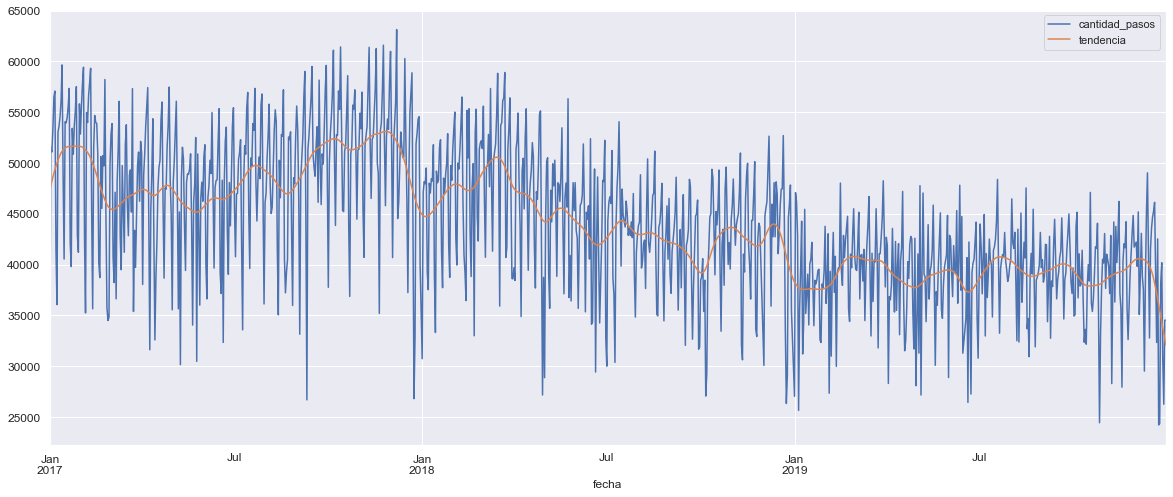

In [84]:
# graficando la variacion de la cantidad de entradas reales con la tendencia.
#==============================================================================================================

transforma[['cantidad_pasos', 'tendencia']].plot(figsize=(20, 8), fontsize=12)
legend = plt.legend()
legend.prop.set_size(14)

### Con este imagen observamos que la tendencia tiene mucho parecido como con la grafica de la media movil de nuestros datos.

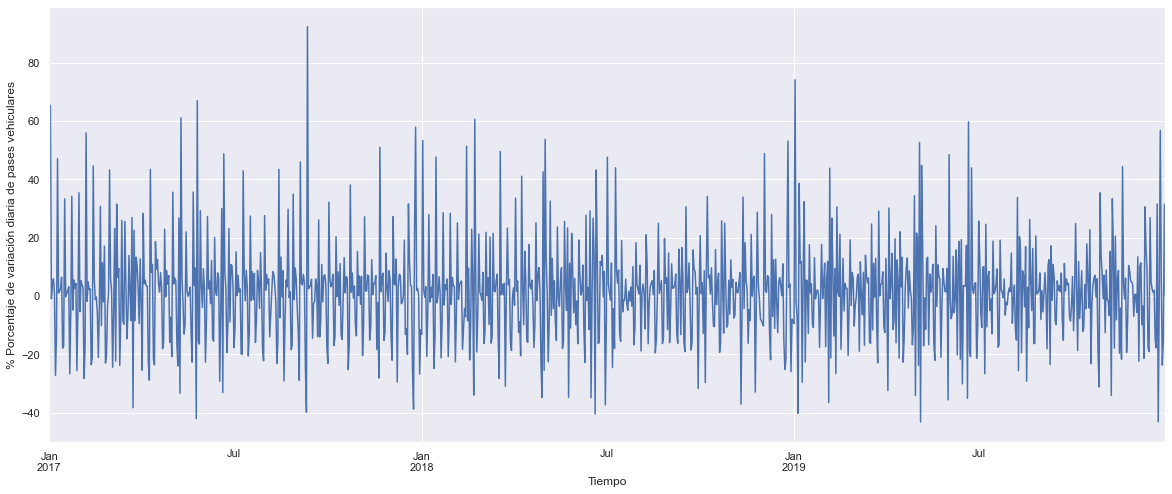

In [85]:
# calculemos el porcentaje de variación por día.
#================================================================================================================

variacion_diaria = (transforma['cantidad_pasos'] / transforma['cantidad_pasos'].shift(1) -1)*100

transforma['Porcen_var_diaria'] = variacion_diaria
transforma['Porcen_var_diaria'][1:4]

# graficando rendimiento diario en porcentaje
#====================================================================================================

plot = transforma['Porcen_var_diaria'].plot(figsize=(20, 8))
plt.xlabel('Tiempo')
plt.ylabel('% Porcentaje de variación diaria de pases vehiculares')
plt.show()

<H2> <div style="color:#D0E8F5"; align="center">Cambiar de rumbo, para ver otra parte del panorama.</div></H2> 

<div align="center"><img src="https://cdn.pixabay.com/photo/2017/08/29/08/32/chance-2692435__340.jpg" alt="drawing" style="width:800px;height: 400px"/></div>

#### Se observa que, aunque la estrategia de volver la serie estacionaria se realiza bajo las bases y pruebas matemáticas pertinentes. No son satisfactorios los resultados obtenidos, para lanzar modelos al azar, por tal motivo vamos a explorar modelos con los datos así como están, solo haciendo eliminación de datos outliers, a ver que sucede, y luego analizaremos cómo se comportan los algoritmos....


In [86]:
# partimos nuestros datos
#===================================================================================================================

entrene=sinoutliers['2017/01/01': '2019/09/30']
testeo= sinoutliers['2019/10/01': '2019/12/31']

In [87]:
# Este es para ver cual es el mejor dato para p,q de un modelo arima
#===============================================================================

resDiff = sm.tsa.arma_order_select_ic(sinoutliers, max_ar=8, max_ma=8, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (7, 8) is the best.


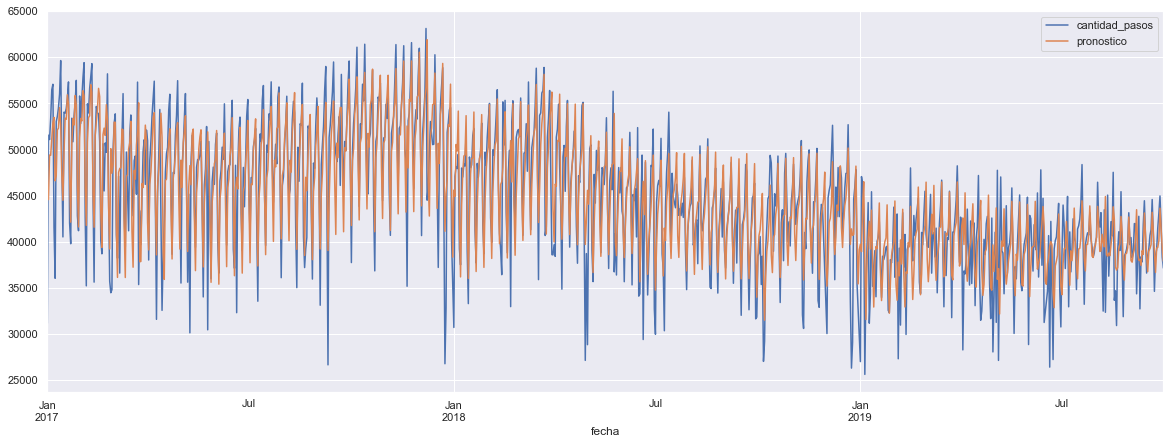

In [88]:
# Modelo ARIMA sobre el valor pases.
#===================================================================================================================

modelo_Arima = sm.tsa.ARIMA(entrene['cantidad_pasos'].iloc[1:], order=(7, 0, 8))  

resultados = modelo_Arima.fit(disp=-1)  
entrene['pronostico'] = resultados.fittedvalues  
plot = entrene[['cantidad_pasos', 'pronostico']].plot(figsize=(20, 7))  

#### Aquí el modelo parece ser bastante efectivo, las líneas en el gráfico son muy similares entre sí. 
#### Pero para armar el modelo predictor perfecto, hemos utilizado el valor de cantidad de pasos, y la variación de cantidad de pasos en el día a día es muy pequeña en comparación a la cantidad de pasos absoluto. 
#### Lo que realmente nos interesa predecir la cantidad de vehículos que ingresan por día y pagan en efectivo, por lo tanto, este modelo se ve mucho más efectivo que el modelo realizado en la transformación estacionaria.


In [89]:
# Para transformar datos NaN con extrategia
# ===============================================================================================================

Xtranform2 = imputer.fit_transform(entrene)


print('Missing: %d' % isnan(Xtranform2).sum())

Missing: 0


In [90]:
# transformacion de datos missing en el mismo  dataFrame
# ================================================================================================== 

Xtranform2 = imputer.fit_transform(entrene)


print('Missing: %d' % isnan(Xtranform2).sum())

index_values = entrene.index


column_values = ['cantidad_pasos', 'pronostico'
                 ]



entrene = pd.DataFrame(  Xtranform2,
                            index = index_values, 
                            columns = column_values)

Missing: 0


In [91]:
# Este es para las metricas de los modelos Arima en entranamiento
#=================================================================================================================================

rmse5 = np.sqrt(mean_squared_error(entrene['pronostico'], entrene['cantidad_pasos'])) 

print('RMSE, AIC y BIC del modelo  =',round(rmse5,2),',', round(resultados.aic), 'y', round(resultados.bic))

RMSE, AIC y BIC del modelo  = 4399.42 , 19678 y 19762


#### Para dar una respuesta no tan ingenua como la que puede brindar el RMSE = 4398, podríamos decir que el Criterio Bayesiano-Schwarz (BIC), el Criterio Akaike (AIC). observamos que nuestro nuevo modelo se está comportando mejor cualquiera de los modelos anteriores, hay que recordar que en este modelo conoce los datos, por lo que habría que verificar cómo se comporta en test. 


#### Primero, obtenemos una gráfica lineal de los errores residuales, lo que sugiere que aún puede haber alguna información de tendencia no capturada por el modelo.

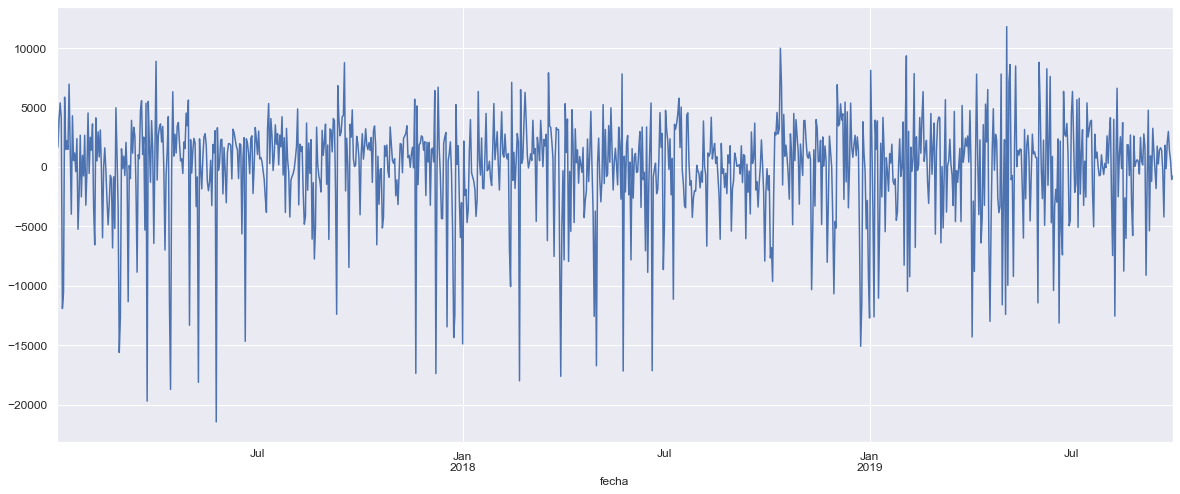

In [92]:
# Grafiquemos los residuos que obtenemos del modelo ARIMA
#===================================================================================================================

residual = resultados.resid
residual.plot(figsize=(20, 8), fontsize=12)
pyplot.show()

### Entendiendo el error

#### Observamos que el error del modelo es satisfactorio y mucho mas para las cifras positivas, ya que si bien hay diferencias positivas con valores por encima de 9000 que los podemos considerar como altos son menos 10. el problema que veo es para cuando la diferencia es negativa ya que se equivoca más, porque los valores del error se trasladan a -15.000 y son 13 valores. creo que por el momento no nos debe preocupar estos datos, pero es importante tenerlos identificados para saber que pudo haber sucedido ese dia. 

In [93]:
# Este es para crear una nueva columna con el porcentaje de aproximación de los datos
#=========================================================================================================================================

porcentaje = ((entrene['pronostico']/entrene['cantidad_pasos'])*100)

entrene['porcentaje'] = porcentaje


#### A continuación, obtenemos una gráfica de densidad de los valores de error residual, 

#### Lo que sugiere que los errores son gaussianos, pero que pueden no estar centrados en cero.

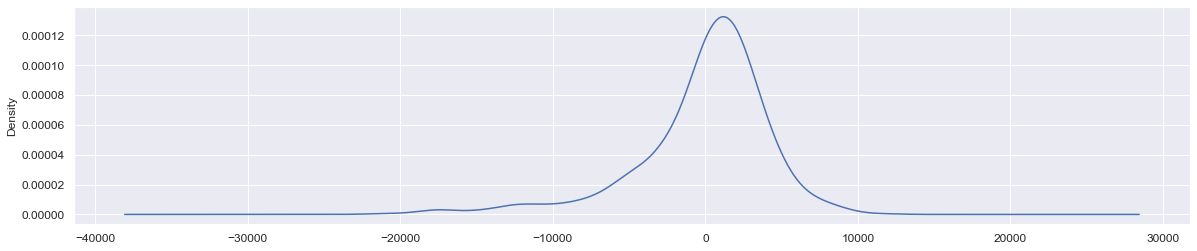

count     1002.0
mean      -109.8
std       4381.7
min     -21446.1
25%      -1719.4
50%        699.3
75%       2457.6
max      11811.4
dtype: float64


In [94]:
# gráfico de densidad de residuos
#====================================================================================================================

residual.plot(kind='kde', figsize=(20, 4), fontsize=12)
pyplot.show()
# summary stats of residuals
print(residual.describe())

#### Se muestra la distribución de los errores residuales. Los resultados muestran que efectivamente existe un sesgo en la predicción (una media distinta de cero en los residuos).

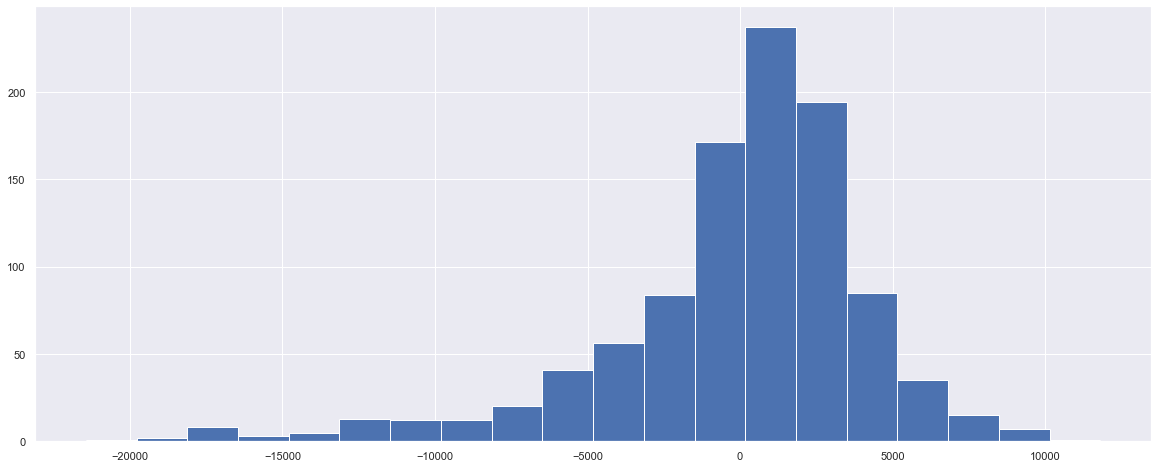

In [95]:
# Con un histogramas revisamos mejor como se comporta los errores
#===================================================================================================================

plt.figure(figsize = (20,8))
plt.hist(resultados.resid, bins = 20)
plt.show()

In [96]:
# este es para hacer un ejemplo con el nuevo data set en entrenamiento
#==========================================================================================================================

entrene.sample(10)

cantidad_pasos  pronostico  porcentaje
fecha                                             
2019-09-30         37170.0     37926.0       102.0
2018-09-29         31670.0     39583.7       125.0
2019-03-31         37797.0     37387.0        98.9
2018-03-21         56138.0     52812.7        94.1
2017-05-13         43826.0     42923.0        97.9
2018-07-28         39138.0     41127.4       105.1
2017-09-14         56249.0     53335.6        94.8
2017-11-24         61594.0     59604.1        96.8
2017-02-07         53979.0     53472.7        99.1
2018-10-27         44304.0     40317.7        91.0

In [97]:
entrene['porcentaje'].describe()


count   1003.0
mean     101.4
std       12.2
min       75.3
25%       94.9
50%       98.5
75%      103.8
max      170.4
Name: porcentaje, dtype: float64

#### Esto es muy bueno ya que el 75% de los datos tiene una aproximación de prediccion al valor real de más del 94%

In [98]:
# Error de porcentaje absoluto medio  (MAPE) en entrenamiento
#===================================================================================

mape = np.mean(np.abs(entrene['cantidad_pasos'] - entrene['pronostico'])/np.abs(entrene['cantidad_pasos']))

print('El error absoluto de nuestro modelo es :', round(mape*100), '%')
print('precision del modelo es: ', round((mape-1)*-100),'%')


El error absoluto de nuestro modelo es : 8 %
precision del modelo es:  92 %


<H2> <div style="color:#D0E8F5"; align="center">Test en el ultimo trimestre del 2019 -> datos que no conoce.</div></H2>
<div align="center">
<img src="https://cdn.pixabay.com/photo/2014/06/03/19/38/board-361516_960_720.jpg" alt="drawing" style="width:800px;height: 400px"/></div>


#### En nuestro modelo Benchmarck utilizamos el conjunto de datos completo para el primer análisis de series de tiempo, ya para este caso se realizara el análisis solo en el conjunto de datos de entrenamiento, y luego testear para poder desarrollar un modelo predictivo.

#### A continuación, veamos cómo podemos usar el modelo ARIMA para hacer test(predicción) calculamos el RMSE también


In [99]:
# Este es para verificar los datos en test
################################################################################################################################
print(testeo.shape)

testeo.head(3)

(92, 1)


cantidad_pasos
fecha                     
2019-10-01         39669.0
2019-10-02         34943.0
2019-10-03         35054.0

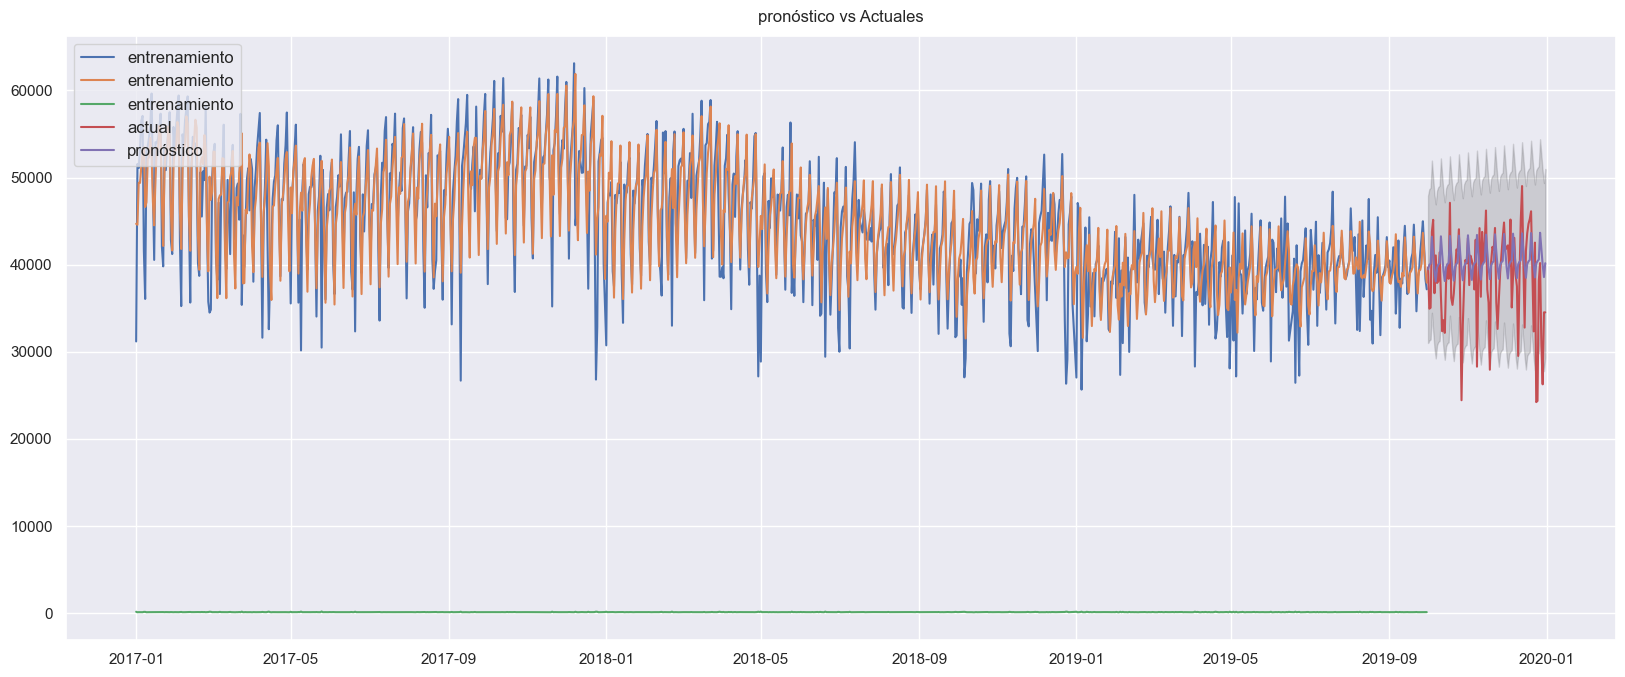

In [100]:
# Testeo y plot de 
#=============================================================================================================================================

# Pronóstico
fc, se, conf = resultados.forecast(92, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=testeo.index)
lower_series = pd.Series(conf[:, 0], index=testeo.index)
upper_series = pd.Series(conf[:, 1], index=testeo.index)

# Plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(entrene, label='entrenamiento')
plt.plot(testeo, label='actual')
plt.plot(fc_series, label='pronóstico')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('pronóstico vs Actuales')

plt.legend(loc='upper left', fontsize=12)
plt.show()

### Grafico Cuando no se conocen los datos

#### Se observa en el grafico, que el modelo busca la mejor predicción, sacando varias imagenes y establece una, la cual podríamos decir que el modelo se va a equivocar cuando los datos varían mucho por algún motivo, hay que examinar que hace variar tanto los datos.


In [101]:
# Se incluyen  un par de columnas adicionales en nuestro dataset de test
###################################################################################################################

testeo['pronostico'] = fc_series
testeo['porcentaje'] = (testeo['cantidad_pasos']/testeo['pronostico'])*100


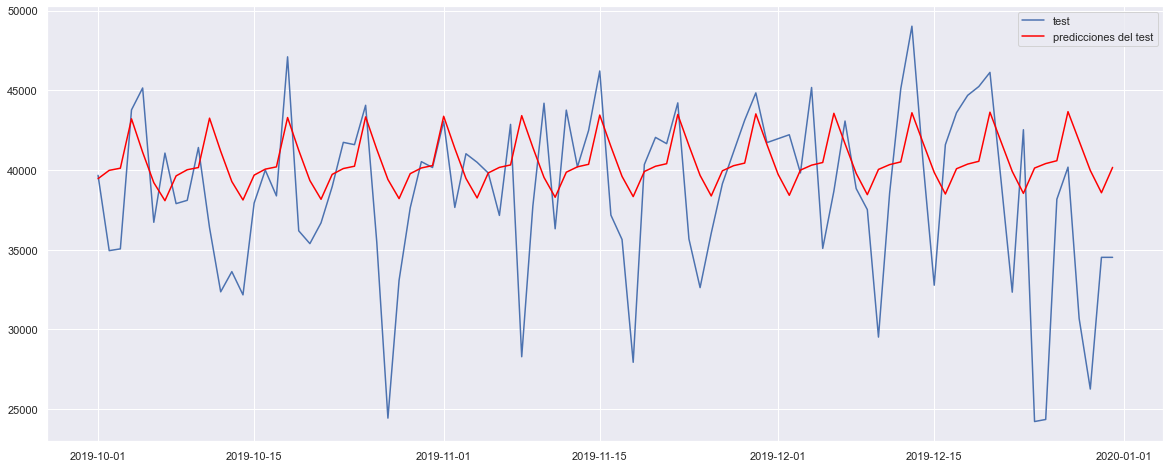

In [102]:
# Este plot solo es para graficar la muestra de test
###################################################################################################################################

plt.figure(figsize=(20,8))
pyplot.plot(testeo['cantidad_pasos'], label='test')
pyplot.plot(testeo['pronostico'], color='red', label='predicciones del test' )
plt.legend()
pyplot.show()


In [103]:
# este es para verificar los datos del dataset testeo
###################################################################################################################################

testeo['porcentaje'].describe()

count    92.0
mean     95.3
std      12.3
min      60.3
25%      88.5
50%      97.6
75%     104.0
max     112.5
Name: porcentaje, dtype: float64

#### Esto es muy bueno ya que el 75% de los datos tiene una aproximación de predicción al valor real de más del 105% la media de los datos es 96% lo cual es muy buena noticia para nuestro modelo ARIMA.

In [104]:
# Este para sacar ejemplo de como fueron los datos en TEST
###################################################################################################################################

testeo.sample(10)

cantidad_pasos  pronostico  porcentaje
fecha                                             
2019-10-13         33626.0     39276.5        85.6
2019-12-31         34523.0     40166.5        85.9
2019-11-28         43130.0     40436.7       106.7
2019-12-24         24220.0     40124.7        60.4
2019-11-29         44841.0     43524.5       103.0
2019-11-24         32623.0     39665.1        82.2
2019-11-11         36314.0     38292.7        94.8
2019-12-30         34523.0     38575.8        89.5
2019-11-14         42486.0     40359.6       105.3
2019-10-23         41737.0     40094.1       104.1

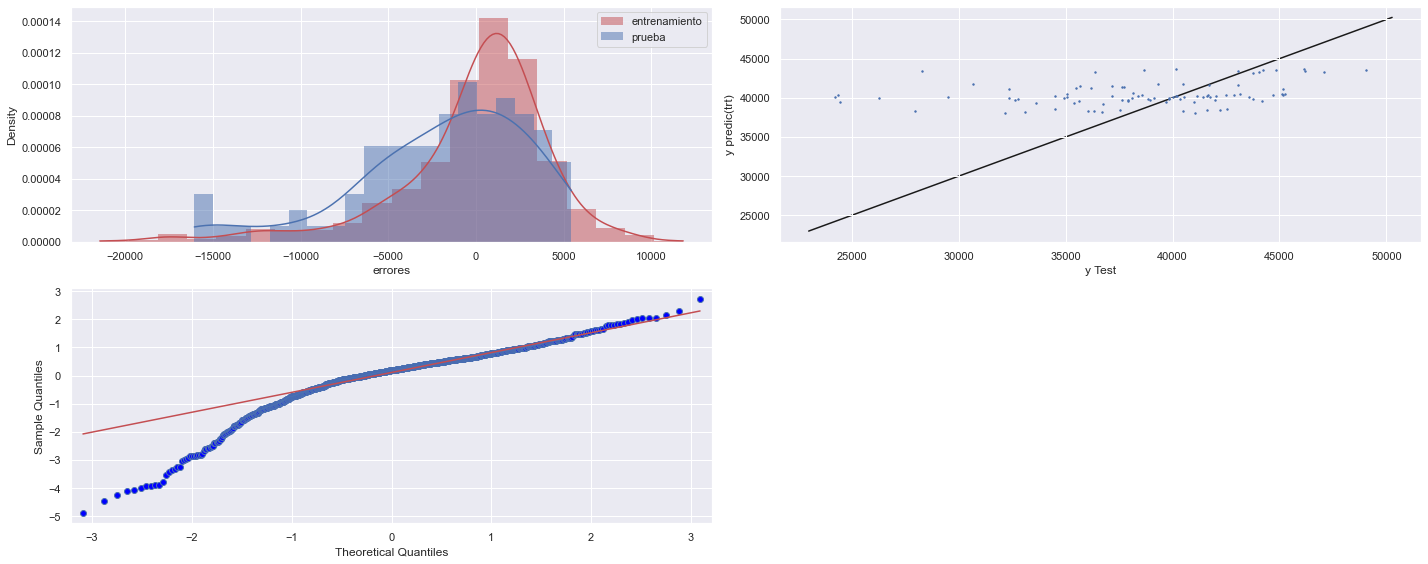

In [105]:
# hacemos un Histograma para graficar nuestro modelos en Test y train 
###################################################################################################################################
resi = resultados.resid

plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot( entrene['cantidad_pasos'] - entrene['pronostico'] ,  bins = 20, label = 'entrenamiento', kde=True, stat="density", linewidth=0, color = "r")
sns.histplot(testeo['cantidad_pasos'] - fc_series, bins = 20,label = 'prueba',  kde=True, stat="density", linewidth=0, color = "b" )
plt.xlabel('errores')
plt.legend()

# hacemos un .plot  para graficar nuestro modelo como es su aproximacion de prediccion 
ax = plt.subplot(2,2,2)
ax.scatter(testeo['cantidad_pasos'], fc_series, s = 2)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.plot(lims, lims, 'k-', alpha=1, zorder= 0)
plt.xlabel('y Test')
plt.ylabel('y predic(trt)')

ax = plt.subplot(2,2,3)
fig = qqplot(resi, line='q', ax=ax, fit=True)

plt.tight_layout()
plt.show()


## Independencia de los residuos: Contraste de Durbin-Watson

In [106]:
print('independiecia del residuo estadistico (valor debe estar entre 1,5- 2,4) =', round(sm.stats.durbin_watson(resultados.resid.values),2))

independiecia del residuo estadistico (valor debe estar entre 1,5- 2,4) = 1.98


#### El estadístico de Durbin-Watson mide el grado de autocorrelación entre el residuo correspondiente a cada observación y la anterior. Si su valor está próximo a 2, entonces los residuos no están correlacionados. Eso significa que existe una fuerte evidencia de que los residuos de este modelo están dentro el dato estadístico Durbin-Watson entre 1,5 -2,4 y no tienen ninguna correlación.

In [107]:
# Este es para las metricas de los modelos Arima en testeo
#=================================================================================================================================

rmse6 = np.sqrt(mean_squared_error(testeo['pronostico'], testeo['cantidad_pasos'])) 

print('RMSE, AIC y BIC del modelo en test =',round(rmse6,2),',', round(resultados.aic), 'y', round(resultados.bic))

RMSE, AIC y BIC del modelo en test = 5291.4 , 19678 y 19762


In [108]:
# Error de porcentaje absoluto medio  (MAPE) en testeo 
#===================================================================================

mapetesteo = np.mean(np.abs(testeo['cantidad_pasos'] - testeo['pronostico'])/np.abs(testeo['cantidad_pasos']))

print('El error absoluto de nuestro modelo es :', round(mapetesteo*100), '%')
print('precision del modelo es: ', round((mapetesteo-1)*-100),'%')

El error absoluto de nuestro modelo es : 11 %
precision del modelo es:  89 %


### podemos decir que nuestro modelo es aceptable para predictor y mejoro mucho comparado con respecto al modelo Benchmark

#### Bueno sabemos que el AIC y el BIC van a ser los mismos tanto en entrenamiento como en prueba ya que se toma el mismo modelo, pero como observamos la métrica del  RMSE, si nos muestra que el modelo se equivoca un 15% mas ya que este valor subió a 5166.




## Ahora vamos a utilizar este modelo para  predecir las entradas en el 2020


In [109]:
# este es para pronóstico un año con el modelo
#=================================================================================================================================

start_index = '2019-10-01'
end_index = '2020-12-31'
forecast = resultados.predict(start=start_index, end=end_index)

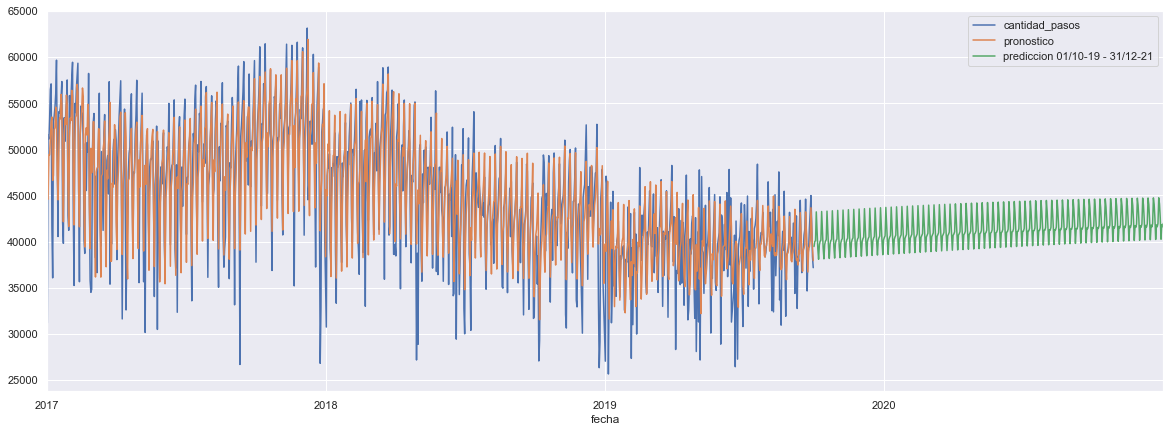

In [110]:
# Este plot solo es para graficar el modelo prediciones
###################################################################################################################################

plot = entrene[['cantidad_pasos', 'pronostico']].plot(figsize=(20, 7))  
forecast.plot(label = 'prediccion 01/10-19 - 31/12-21')
plt.legend()
plt.show()

#### En términos generales nuestro modelo se comporta muy bien, con los resultados obtenidos, creemos que no va a ser necesario la transformación de los datos a datos Cíclicos y estacionales.
#### Este modelo ARIMA al utilizar la media promedio Y la autorregresión. Pero como informamos anteriormente, estamos tomando para la media móvil una abertura de 7 días, ya que los datos así nos lo mostraron, y el cálculo nos los corroboró, y en efecto resultados es ep esperado, ya que observamos que los valores cumplen su ciclicidad. Pero habría que analizar si es necesario seguir prediciendo los valores en efectivo, o más bien volver a preguntar la necesidad de este objetivo, o un su efecto sugerir cómo se puede promocionar para aumentar el manejo de otros medios de pago.

#### Tendríamos que preguntar para que se necesita saber o predecir los valores de efectivo, como afecta el modelo de negocio y se es necesario realizar otras predicciones o incluso tomar otras métricas


<H2> <div style="color:#D0E8F5"; align="center">Hyperparametros</div></H2>

<div align="center">
<img src="https://cdn.pixabay.com/photo/2016/10/11/09/10/ford-1730889__340.jpg", alt="drawing" style="width:800px;height: 400px"/></div>
Descripción general Una de las formas más populares como lo hemos analizado es de representar y pronosticar datos de series de tiempo es a través de modelos de media móvil integrada autorregresiva (ARIMA). recordemos que estos modelos están definidos por tres parámetros:

    p : el orden de retraso (número de observaciones de retraso incluidas).
    
    d : el grado de diferenciación necesario para la estacionariedad (número de veces que se diferencian los datos)
        El valor de d, por lo tanto, es el número mínimo de diferenciaciones necesarias para que la serie sea 
        estacionaria. Y si la serie de tiempo ya es estacionaria, entonces d = 0.
        
    q : el orden de la media móvil
    

Vamos a revisar hiperparámetro y para eso vamos a realizar un auto_arima para observar si podemos mejorar nuestro modelo con Hiperparámetro

In [111]:
# Realizamos un nuevo dataset para probar el modelo con hyperparametros
#=============================================================================================================
Hyper = sinoutliers.replace([np.inf, -np.inf], np.nan)

In [112]:

# Pronóstico de series de tiempo usando Auto ARIMA en Python
#===========================================================================


stepwise_model = auto_arima(Hyper, start_p=0, start_q=0,
                            test='adf',         # use adftest to find optimal 'd'
                            max_p=10, max_q=10, # maximum p and q
                            m=52,               # frequency of series
                            d=None,             # let model determine 'd'                            
                            seasonal=False,     # No Seasonality
                            start_P=0, 
                            D=0, 
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=False, 
                            stepwise=True)

print('score AIC', round(stepwise_model.aic()), 'score BIC',round(stepwise_model.bic()))

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26557.592, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=22484.865, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=25792.705, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22139.277, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=22082.542, Time=0.80 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=22008.489, Time=0.92 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=22029.514, Time=0.92 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=22036.130, Time=0.98 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=1.64 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22199.477, Time=0.51 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
To

In [113]:
# Este crea una serie con los datos generados con el mejor modelo
#=======================================================================================================

forecast = stepwise_model.predict(n_periods=len(Hyper))

In [114]:
# Se incluyen  un par de columnas adicionales en nuestro dataset de test
###################################################################################################################

Hyper['pronostico'] = forecast
Hyper['porcentaje'] = (Hyper['cantidad_pasos']/Hyper['pronostico'])*100

In [115]:
# este es para una muestra de los datos
#======================================================================================

Hyper.sample(10)

cantidad_pasos  pronostico  porcentaje
fecha                                             
2018-03-10         48079.0     37491.8       128.2
2017-05-21         34043.0     37499.5        90.8
2018-07-08         37028.0     37488.6        98.8
2017-01-03         51093.0     37761.4       135.3
2018-09-18         42395.0     37486.7       113.1
2018-04-29         27169.0     37490.4        72.5
2018-07-06         51226.0     37488.6       136.6
2018-10-19         49308.0     37485.9       131.5
2017-09-06         52523.0     37496.6       140.1
2019-09-03         38869.0     37477.4       103.7

In [116]:
# Este es para las metricas de los modelos Arima en entranamiento
#=================================================================================================================================

rmse7 = np.sqrt(mean_squared_error(Hyper['pronostico'], Hyper['cantidad_pasos'])) 

print('RMSE, AIC y BIC del modelo con Hiperparámetro  =',round(rmse7,2),',', round(stepwise_model.aic()), 'y', round(stepwise_model.bic()))

RMSE, AIC y BIC del modelo con Hiperparámetro  = 9805.93 , 22008 y 22033


### Interpretación del modelo con hiperparámetro 

#### Se uso auto_arima para buscar las mejores configuraciones de los hiperparámetro de Arima. Pero el resultado no fue el esperado ya que no se logra conseguir al parecer un mejor modelo.
#### También utilizamos variaciones de frecuencia(m), pasando de semanal = 52, a trimestral (4), y a mensual (12). los mejores resultados obteniendo y entendibles fueron  con 52 (Semanal), pero siguen siendo mejores las métricas calculadas con los parámetros de p,q propuestos en le modelo anterior, por tal motivo también como pasó en el caso de volver la serie estacionaria, se rechaza por ovias razones; Y, se va a seguir trabajando con el modelo Arima donde p= 7 y q= 8.



<H2> <div style="color:#D0E8F5"; align="center">Incluyendo a nuestros datos de tiempo el 2016, y ¿tal vez el 2020? </div></H2>

<div align="center">
<img src="https://cdn.pixabay.com/photo/2016/02/28/09/30/board-1226680__340.jpg", alt="drawing" style="width:800px;height: 400px"/></div>

#### Vamos a hacer el mismo recorrido exploratorio inicial para ver si podemos anexar o crear un nuevo dataset incluyendo más años, ¿qué tal unir el 2016 y el 2020, al dataset original?, recordemos que este dataset, incluía los datos de los años 2017, 2018 y 2019.
 
#### Inicialmente vamos a anexar el año 2016, ya que La idea es demostrar si el modelo mejora, empeora o sigue igual anexando este año. También intentaremos verificar en la práctica, si se puede hacer lo mismo, con la información del 2020.



In [117]:
# Este es para visualizar los datos del 2016
# =======================================================================================================
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano      AUPASS               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

#### ¡No hay lio!, Los datos del 2016 se pueden concatenar con los datos que analizamos anteriormente 

In [118]:
# Este es para visualizar los datos del 2016
data_2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

In [119]:
print(data_2016['sentido'].unique())
print(data_2020['sentido'].unique())
print(data_2020['observacion'].unique())
print(data_2016['forma_pago'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Efectivo' 'Paso en Infracción' 'Paso en infracción con Multa LPR'
 'T.Magnética Disc.' 'Tag - PosPago' 'Tag - PosPago OCR' 'Tag - PrePago'
 'Exento - Reglamento' 'Tag - PrePago OCR' 'Violación - Normal'
 'Exento - Otros motivos' 'Exento - Demora en cobro'
 'Violación - Via Liberada' 'Violación - Rebote' 'Violación - Repetitiva'
 'Paso a facturar - (colectivo)' 'Metrobus no hab. TAG pospago'
 'Violación - Vía Cerrada' 'Paso en Infracción con Multa' 'Obs CPP'
 'Metrobus no hab. OCR pospago' 'Metrobus no hab. TAG prepago'
 'Metrobus no hab. OCR prepago' 'Tag - Exento' 'Mercado Pago'
 'Mercado Pago OCR' 'Metrobus no hab. TAG Mercado Pago']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


#### Ya en el caso del 2020, los datos tienen otra estructura, y para el análisis que estamos trabajando con la estación Illia y la forma de pago Efectivo, no va ser posible.

#### Por este motivo lo descartaremos por ahora.

In [120]:
#Unimos 2016 podemos hacerlo asi directamente ya que tienen las mismas columnas

more_data = pd.concat([data_2016])
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask2 = np.logical_and(more_data.estacion=='Illia', more_data.forma_pago == 'EFECTIVO')
more_data = more_data[mask2]

#Quitamos las columnas que no vamos a utilizar
more_data.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
more_data['fecha2'] = pd.to_datetime(more_data.fecha) + pd.to_timedelta(more_data.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
more_data.drop(columns=['fecha','hora_fin'], inplace = True)

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
more_data.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
more_data.sort_values('fecha', inplace = True)
more_data.reset_index(drop=True, inplace = True)

more_data = more_data.resample('D', on = 'fecha').sum()

#Resampleamos nuestros datos para agrupar por día, y así tal vez lograr una visualización más amigable
#====================================================================================================
more_data = pd.concat([ more_data, diario])
print(more_data.shape)

(1461, 1)


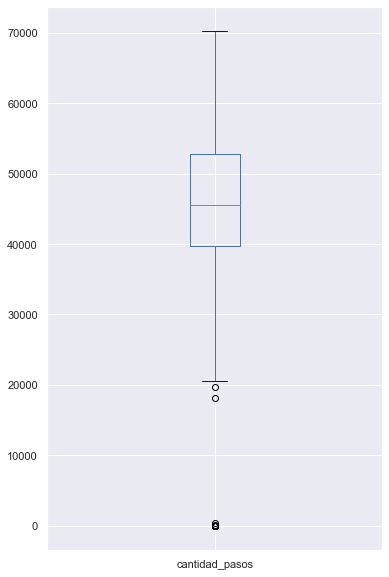

In [121]:
# boxplot para ver Outliers de nuestros datos
#===========================================================================================================

fix, ax = plt.subplots(figsize= (6,10 ))
fig = more_data.plot.box(ax=ax)

In [122]:
# Revisamos que nuestro set de datos no contenga datos al infinito
#===================================================================================

infinite1 = np.isfinite(more_data, where=True)
infinite1.cantidad_pasos.value_counts()

# Dataset sin Datos que tiendan al infinito
#===================================================================================================================

sinoutliers_2016 = more_data.replace([np.inf, -np.inf], np.nan)

# Dataset sin Datos que tiendan al infinito
#==================================================================================================================

sinoutliers_2016.cantidad_pasos[sinoutliers_2016.cantidad_pasos > 70000] = np.nan
sinoutliers_2016.cantidad_pasos[sinoutliers_2016.cantidad_pasos < 20000] = np.nan

# Contamos nuestros datos nan
#==================================================================================================================

sinoutliers_2016.isna().sum()

cantidad_pasos    9
dtype: int64

In [123]:
# Completamos nuestros valores NA con metodo "Time" para trabajar con series de tiempo
#==================================================================================================================

sinoutliers_2016['cantidad_pasos'].interpolate(method='time', inplace=True)

#Contamos nuevamente nuestros datos NAN
#==================================================================================================================

#Contamos nuevamente nuestros datos NAN
#==================================================================================================================

sinoutliers_2016.isna().sum().isna().sum()

0

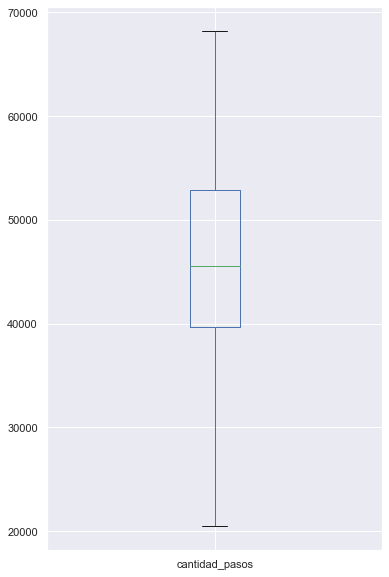

In [124]:
# boxplot para ver como queda nuestro set de datos sin Outliers o datos infinitos ∞ de nuestros datos
#===========================================================================================================

fix, ax = plt.subplots(figsize= (6,10 ))
fig = sinoutliers_2016.plot.box(ax=ax)

In [125]:
entrene_2016=sinoutliers_2016['2016/01/01': '2019/09/30']
testeo_2016=sinoutliers_2016['2019/10/01': '2019/12/31']

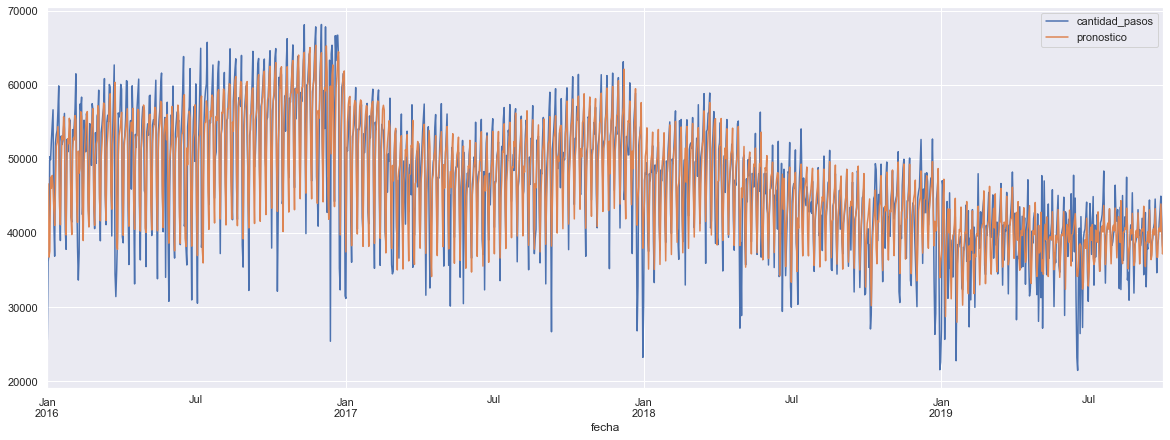

In [126]:
# Modelo ARIMA sobre el valor pases.
#===================================================================================================================

modelo_Arima = sm.tsa.ARIMA(entrene_2016['cantidad_pasos'].iloc[1:], order=(8, 0, 7))  

resultados1 = modelo_Arima.fit(disp=-1)  
entrene_2016['pronostico'] = resultados1.fittedvalues  
plot = entrene_2016[['cantidad_pasos', 'pronostico']].plot(figsize=(20, 7))  

In [127]:
# Para transformar datos NaN con extrategia
# ===============================================================================================================

Xtranform3 = imputer.fit_transform(entrene_2016)


print('Missing: %d' % isnan(Xtranform3).sum())

Missing: 0


In [128]:
# transformacion de datos missing en el mismo  dataFrame
# ================================================================================================== 

Xtranform3 = imputer.fit_transform(entrene_2016)


print('Missing: %d' % isnan(Xtranform2).sum())

index_values = entrene_2016.index


column_values = ['cantidad_pasos', 'pronostico'
                 ]



entrene_2016 = pd.DataFrame(  Xtranform3,
                            index = index_values, 
                            columns = column_values)

Missing: 0


In [129]:
# Este es para las metricas de los modelos Arima en entranamiento
#=================================================================================================================================

rmse7 = np.sqrt(mean_squared_error(entrene_2016['pronostico'], entrene_2016['cantidad_pasos'])) 

print('RMSE, AIC y BIC del modelo  =',round(rmse7,2),',', round(resultados1.aic), 'y', round(resultados1.bic))

RMSE, AIC y BIC del modelo  = 4746.86 , 27054 y 27142


<H2> <div style="color:#D0E8F5"; align="center">Algunos resultados </div></H2>

<div align="center">
<img src="https://media.istockphoto.com/photos/businessman-on-blurred-background-holding-hand-drawn-question-marks-picture-id1211202460?k=6&m=1211202460&s=612x612&w=0&h=TRgeEbyTj_2_HpqaIj2AgNKCDAXd1dPkolvIxnKOQ3U=", alt="drawing" style="width:800px;height: 400px"/></div>

#### Desde nuestro modelo Benchmark los scores no habían desmejorados, si recordamos nuestras métricas fueron así:

    •   RMSE en Benchmark es igual a                        = 7279 y un AIC de 28251.

    •   RMSE en Modelos avanzados en entrenamiento fue de    = 4398 y un AIC de 19678.
    
    •   RMSE incluyendo el 2016 y en entrenamiento fue de   = 4747 y un AIC de 27142.

#### Observamos que incluir otro año penaliza AIC más el modelo y las métricas son mas malas



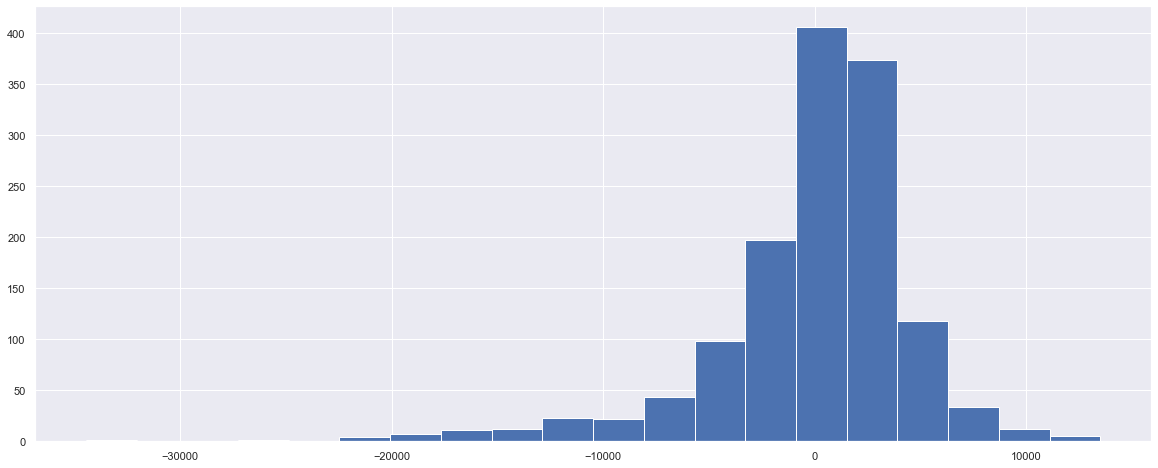

In [130]:
# Con un histogramas revisamos mejor como se comporta los errores
#===================================================================================================================
res = resultados1.resid


plt.figure(figsize = (20,8))
plt.hist(res, bins = 20)
plt.show()



In [131]:
# Este es para crear una nueva columna con el porcentaje de aproximación de los datos
#=========================================================================================================================================

porcentaje = ((entrene_2016['pronostico']/entrene_2016['cantidad_pasos'])*100)

entrene_2016['porcentaje'] = porcentaje

# este es para hacer un ejemplo con el nuevo data set en entrenamiento
#==========================================================================================================================
print(entrene_2016['porcentaje'].describe())

entrene_2016.sample(10)

count   1369.0
mean     101.4
std       13.3
min       73.0
25%       95.0
50%       98.5
75%      103.4
max      235.6
Name: porcentaje, dtype: float64


cantidad_pasos  pronostico  porcentaje
fecha                                             
2019-07-10         39193.0     39381.9       100.5
2018-06-17         34369.0     34226.1        99.6
2018-08-12         41201.0     36276.5        88.0
2019-03-18         41118.0     36862.4        89.7
2017-08-02         50552.0     51265.9       101.4
2019-08-26         38482.0     36160.9        94.0
2018-07-19         43702.0     47370.5       108.4
2019-02-07         39282.0     37702.1        96.0
2017-08-23         52553.0     49253.8        93.7
2019-08-21         41105.0     40464.9        98.4

In [132]:
# Error de porcentaje absoluto medio  (MAPE) en entrenamiento
#===================================================================================

mape1 = np.mean(np.abs(entrene_2016['cantidad_pasos'] - entrene_2016['pronostico'])/np.abs(entrene_2016['cantidad_pasos']))

print('El error absoluto de nuestro modelo es :', round(mape1*100), '%')
print('precision del modelo es: ', round((mape1-1)*-100),'%')


El error absoluto de nuestro modelo es : 8 %
precision del modelo es:  92 %


#### La precisión de los modelos en entramiento son similares


In [133]:
# Este es para verificar los datos en test
################################################################################################################################

testeo_2016.head(3)

cantidad_pasos
fecha                     
2019-10-01         39669.0
2019-10-02         34943.0
2019-10-03         35054.0

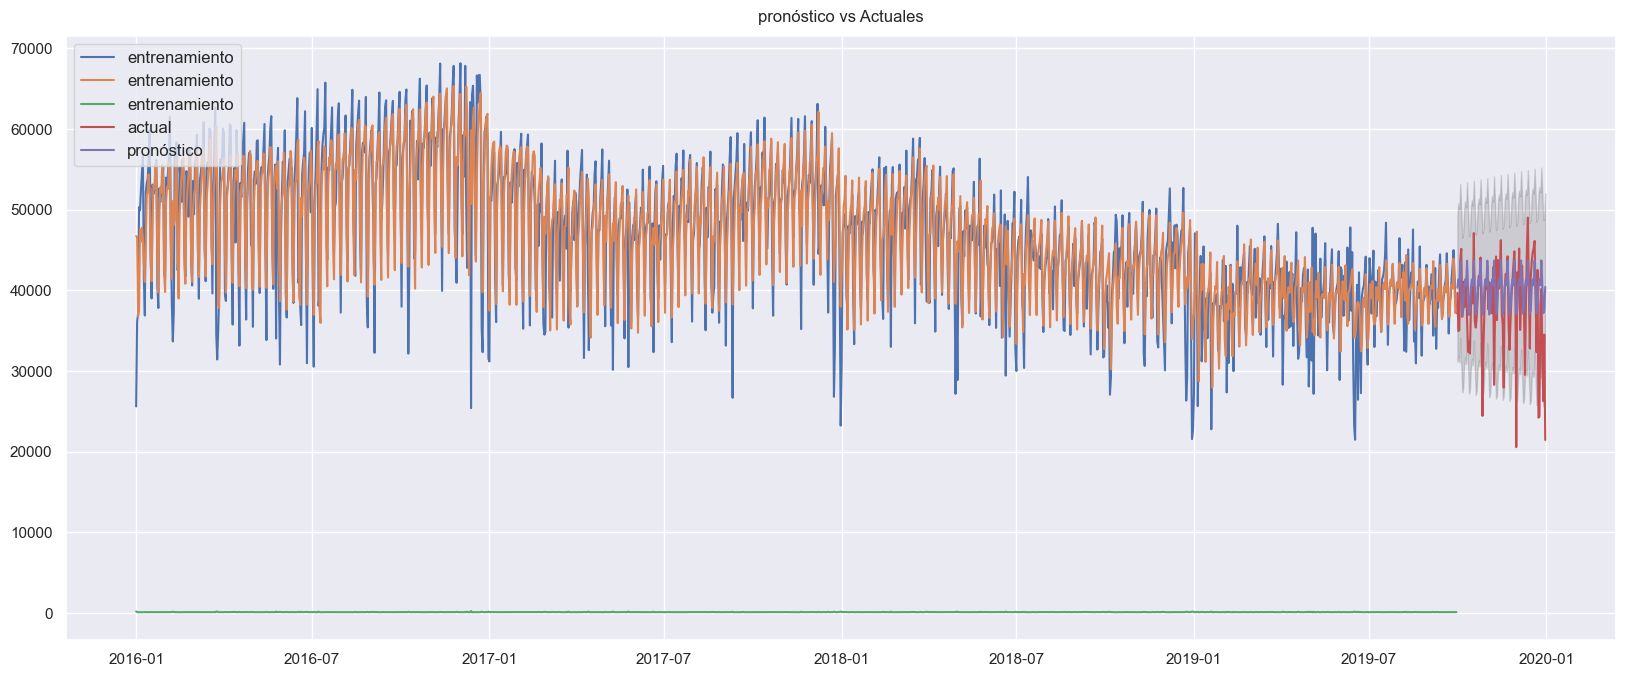

In [134]:
# Testeo y plot de 
#=============================================================================================================================================

# Pronóstico
fc, se, conf = resultados1.forecast(92, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_2016 = pd.Series(fc, index=testeo_2016.index)
lower_series = pd.Series(conf[:, 0], index=testeo_2016.index)
upper_series = pd.Series(conf[:, 1], index=testeo_2016.index)

# Plot
plt.figure(figsize=(20,8), dpi=100)
plt.plot(entrene_2016, label='entrenamiento')
plt.plot(testeo_2016, label='actual')
plt.plot(fc_series_2016, label='pronóstico')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('pronóstico vs Actuales')

plt.legend(loc='upper left', fontsize=12)
plt.show()

In [135]:
# Se incluyen  un par de columnas adicionales en nuestro dataset de test
###################################################################################################################

testeo_2016['pronostico'] = fc_series_2016
testeo_2016['porcentaje'] = (testeo_2016['cantidad_pasos']/testeo_2016['pronostico'])*1

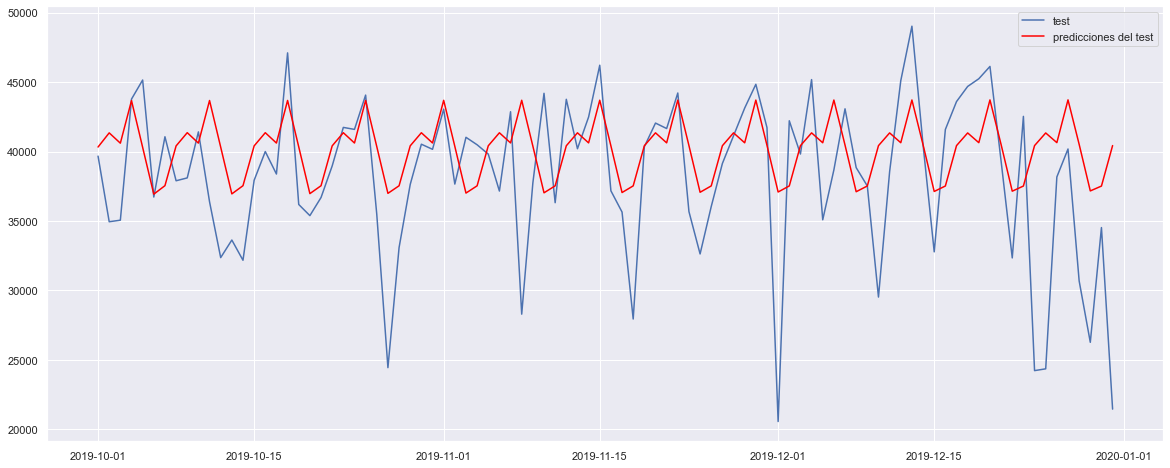

In [136]:
# Este plot solo es para graficar la muestra de test
###################################################################################################################################

plt.figure(figsize=(20,8))
pyplot.plot(testeo_2016['cantidad_pasos'], label='test')
pyplot.plot(testeo_2016['pronostico'], color='red', label='predicciones del test' )
plt.legend()
pyplot.show()

In [137]:
# Este es para las metricas de los modelos Arima en entranamiento
#=================================================================================================================================

rmse8 = np.sqrt(mean_squared_error(testeo_2016['pronostico'], testeo_2016['cantidad_pasos'])) 

print('RMSE, AIC y BIC del modelo en test =',round(rmse8,2),',', round(resultados1.aic), 'y', round(resultados1.bic))

# este es para verificar los datos del dataset testeo
###################################################################################################################################

print(testeo_2016['porcentaje'].describe())

# Este para sacar ejemplo de como fueron los datos en TEST
###################################################################################################################################

testeo_2016.sample(10)

RMSE, AIC y BIC del modelo en test = 5630.68 , 27054 y 27142
count   92.0
mean     1.0
std      0.1
min      0.5
25%      0.9
50%      1.0
75%      1.0
max      1.2
Name: porcentaje, dtype: float64


cantidad_pasos  pronostico  porcentaje
fecha                                             
2019-12-31         21447.0     40429.1         0.5
2019-11-15         46216.0     43696.2         1.1
2019-10-15         37928.0     40405.9         0.9
2019-10-17         38379.0     40610.2         0.9
2019-10-03         35054.0     40600.9         0.9
2019-11-26         39138.0     40418.6         1.0
2019-10-05         45150.0     40299.0         1.1
2019-11-17         35640.0     37046.0         1.0
2019-10-09         38100.0     41357.4         0.9
2019-11-25         36038.0     37523.3         1.0

In [138]:
# Error de porcentaje absoluto medio  (MAPE) en entrenamiento
#===================================================================================

mapetesteo1 = np.mean(np.abs(testeo_2016['cantidad_pasos'] - testeo_2016['pronostico'])/np.abs(testeo_2016['cantidad_pasos']))

print('El error absoluto de nuestro modelo es :', round(mapetesteo1*100), '%')
print('precision del modelo es: ', round((mapetesteo1-1)*-100),'%')

El error absoluto de nuestro modelo es : 12 %
precision del modelo es:  88 %


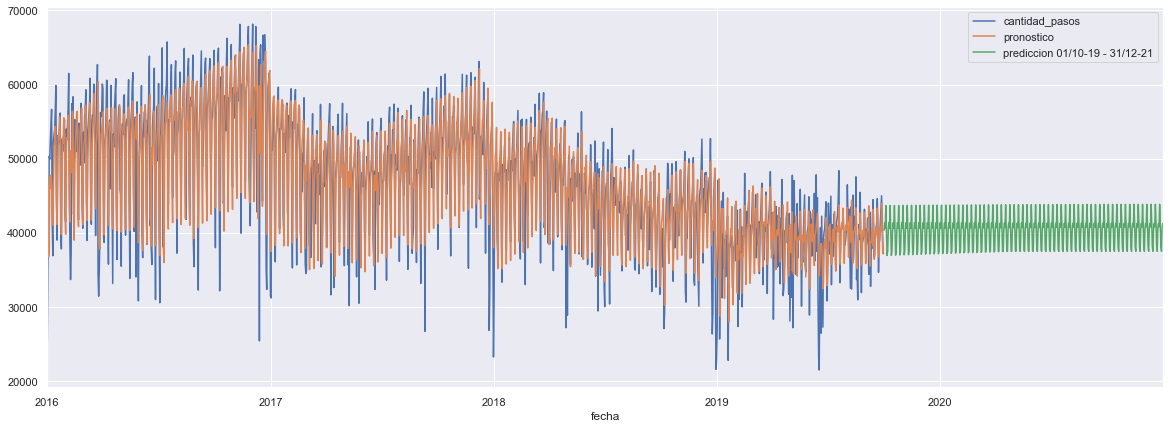

In [139]:
# un paso fuera del pronóstico de la muestra
#=================================================================================================================================

start_index = '2019-10-01'
end_index = '2020-12-31'
forecast1 = resultados1.predict(start=start_index, end=end_index)

# Este plot solo es para graficar el modelo prediciones
###################################################################################################################################

plot = entrene_2016[['cantidad_pasos', 'pronostico']].plot(figsize=(20, 7))  
forecast1.plot(label = 'prediccion 01/10-19 - 31/12-21')
plt.legend()
plt.show()

In [140]:

print(resultados1.summary())

                              ARMA Model Results                              
Dep. Variable:         cantidad_pasos   No. Observations:                 1368
Model:                     ARMA(8, 7)   Log Likelihood              -13509.866
Method:                       css-mle   S.D. of innovations           4667.603
Date:                Fri, 23 Jul 2021   AIC                          27053.731
Time:                        14:49:56   BIC                          27142.490
Sample:                    01-02-2016   HQIC                         27086.949
                         - 09-30-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.665e+04   2.07e+04      2.250      0.024    6006.885    8.73e+04
ar.L1.cantidad_pasos     0.2092      0.031      6.756      0.000       0.149       0.270
ar.L2.cantid

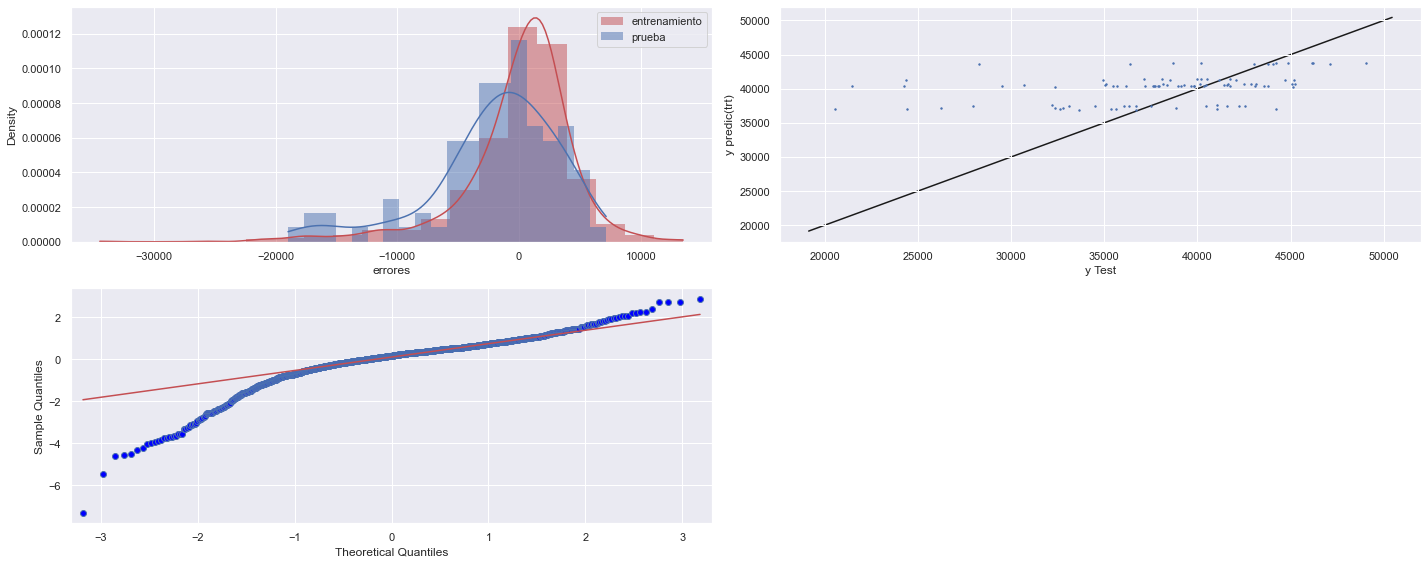

In [141]:
# hacemos un Histograma para graficar nuestro modelos en Test y train 
###################################################################################################################################

plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot( entrene_2016['cantidad_pasos'] - entrene_2016['pronostico'] ,  bins = 20, label = 'entrenamiento', kde=True, stat="density", linewidth=0, color = "r")
sns.histplot(testeo_2016['cantidad_pasos'] - fc_series_2016, bins = 20,label = 'prueba',  kde=True, stat="density", linewidth=0, color = "b" )
plt.xlabel('errores')
plt.legend()

# hacemos un .plot  para graficar nuestro modelo como es su aproximacion de prediccion 
ax = plt.subplot(2,2,2)
ax.scatter(testeo_2016['cantidad_pasos'], fc_series_2016, s = 2)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.plot(lims, lims, 'k-', alpha=1, zorder= 0)
plt.xlabel('y Test')
plt.ylabel('y predic(trt)')

ax = plt.subplot(2,2,3)
fig = qqplot(res, line='q', ax=ax, fit=True)

plt.tight_layout()
plt.show()


<H2> <div style="color:#D0E8F5"; align="center">Resultados </div></H2>

<div align="center">
<img src="https://media.istockphoto.com/photos/businessman-pointing-arrow-graph-corporate-future-growth-year-2020-to-picture-id1265159212?b=1&k=6&m=1265159212&s=170667a&w=0&h=Q5jWFZW6ne2Bs_-iTx0d1hdh-CZPWAVtVil_Q4tMKJc=", alt="drawing" style="width:800px;height: 400px"/></div>

#### Conclusiones:

    * El modelo en entrenamiento con más datos (incluyendo la data 2016) se comporta al parecer peor que el corrido con menos datos, utilizando el mismo algoritmo para los 2 casos.  

    * El error del Score absoluto fue idéntico al modelo que no incluía el año 2016.
    
    * El año 2016 tiene una variabilidad en los datos mucho más alta, lo que da como resultado que el modelo cometa más errores.
    
    * Al incluir más años, en este caso años anteriores no mejora el modelo, antes parece que se comporta peor.

    * El modelo cuando no conoce los datos, siempre predice de igual forma, en otras palabras, pareciera que tiene la misma oscilación de predicción.

                         * Se podría cambiar la ventana de Rolling Windows a un mes y a un día, para ver cómo se comporta en estos extremos.
    
    * Al no tener estacionalidad el modelo original, tiende a no predecir bien y equivocarse más en los picos o extremos de la serie original como vemos en el test vs predicción.
    
    * El RMSE en TEST paso de 5165.82 y AIC de 19678 a RMSE 5630.68 y AIC 27054, lo que demuestra que con otro año y en este tipo de datos el modelo seleccionado se tiende a equivocar mas

    * La precisión del modelo con otro año 2016, bajó un punto, ya que pasa del 89% al 88% cuando no conoce los datos.
    
    * La predicción para el año 2020, son similares incluyendo y excluyendo la data del 2016.
    
    * El análisis del error nos dice que entrenamiento el error es más positivo, mientras en prueba el error esta equidistante.

#### Recomendaciones:

                         * Recomiendo investigar cómo utilizar las series convertidas en estacionaria, que utilizando algún hiperparámetro o código, puedan mejorar el modelo y la predicción. Revisar y comparar resultados.

    * recomiendo dividir los datos y Analizarlos por año, semestre y/o incluso trimestre. Revisar resultados.
    
    * Volver los datos estacionarios, con periodos de tiempo menores, que, al convertirse en estacionarios, los resultados no sean tan diferentes a los datos reales, unir los datos estacionarios y volver a correr el modelo.
    
    * Revisar como adaptar los datos, a información posterior como por ejemplo el modelo de los datos del 2020, ya que como vimos no se pudo utilizar esta data con datos anteriores.
    
    * Recomendar revisar los datos de cada forma de pago por aparte, para ver su comportamiento.
    
    * Indagar cual modelo de pago significa menos costo operativo y cual más.

    * Indagar cual es la percepción o que modelo de pago interesa más que tenga más tendencia de aumento o disminución.
    
    * Recomendar tomar más datos como lectores de placas antes de entrar y después de entrar al peaje para observar cuanto tiempo se demora los vehículos según el medio de pago. Incluso revisar si pudiera ser 4 lectores, incluyendo otros 2 cada 100 metros, equidistantes antes y después del peaje.



<div align="center">
<img src="https://cdn.pixabay.com/photo/2014/11/03/17/45/thank-you-515514__340.jpg" alt="drawing" style="width:900px;height: 400px"/></div>


# <span style="color:blue"><div align="right">Othman Madrigal Sanchez</div></span>
### <span style="color:blue"><div align="right">Data Science</div></span>
<div align="right"><img src="https://images.prismic.io/acamica%2F087942ab-8d20-4cd1-86f5-0f150ab63587_iso.png?auto=compress,format" alt="drawing" style="width:100px;height: 100px"/></div>

